In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.7.0


In [2]:
import timeit

In [3]:
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [4]:
print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


60000


<IPython.core.display.Javascript object>


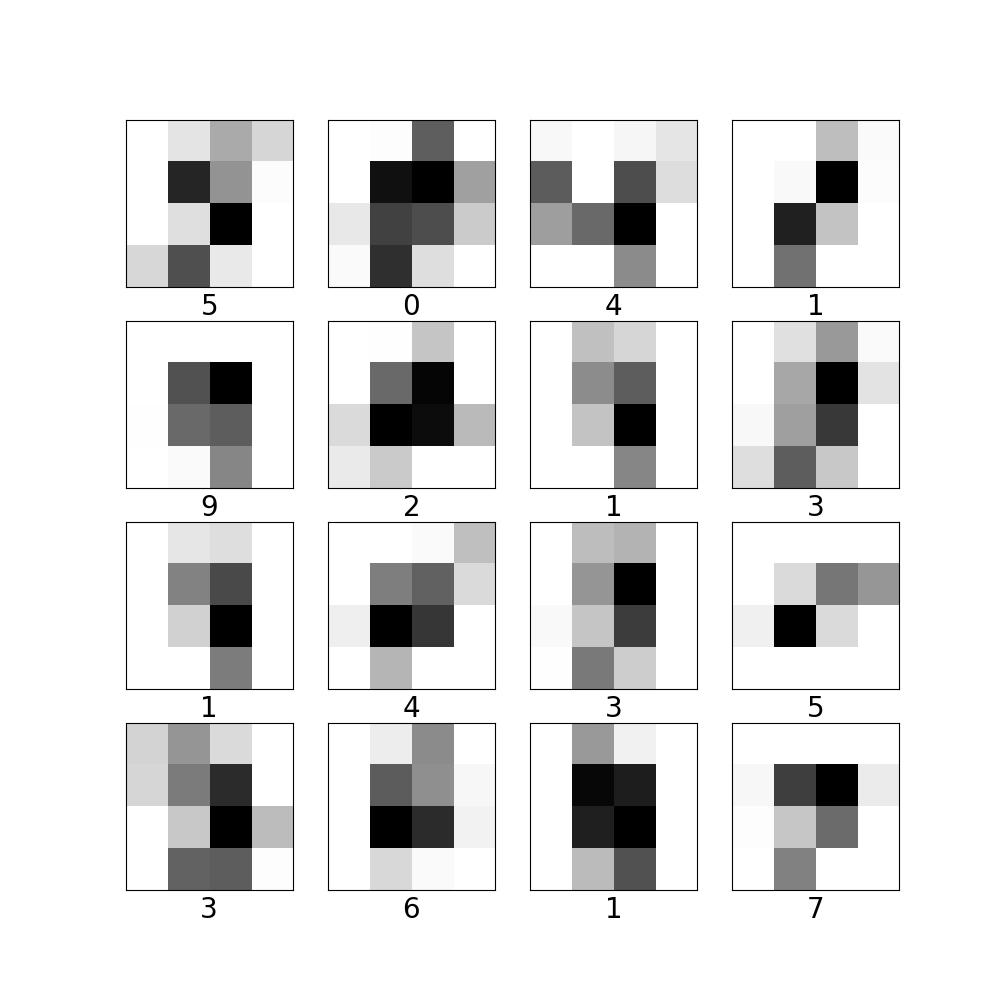

In [5]:
%matplotlib notebook
plt.ion()

import skimage.measure

#generate dimension reduced train images
train_images_reduce_dim = []
for image in train_images:
    image_reduce = skimage.measure.block_reduce(image, (7,7), np.mean)
    train_images_reduce_dim.append(image_reduce)
print(len(train_images_reduce_dim))
plt.figure(figsize=(10,10))
#plt.subplots_adjust(bottom=1.0)
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images_reduce_dim[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i], fontsize=20)

In [6]:
#training data input for DNN models
input = np.array(train_images_reduce_dim)
print(input.shape)
print(input[0])

(60000, 4, 4)
[[   0.           15.46938776   47.48979592   23.06122449]
 [   0.          121.06122449   59.36734694    1.93877551]
 [   0.           17.95918367  141.87755102    0.        ]
 [  22.71428571   98.08163265   12.71428571    0.        ]]


In [7]:
#generate dimension reduced test images
test_images_reduce_dim = []
for image in test_images:
    image_reduce_test = skimage.measure.block_reduce(image, (7,7), np.mean)
    test_images_reduce_dim.append(image_reduce_test)
print(test_images_reduce_dim[0].shape)

(4, 4)


In [8]:
#testing data input for DNN models
test_input = np.array(test_images_reduce_dim)
print(test_input.shape)
print(test_input[0])

(10000, 4, 4)
[[   0.            0.            0.            0.        ]
 [   7.6122449    71.63265306  115.93877551    6.44897959]
 [   0.            4.59183673   82.79591837    0.        ]
 [   0.           75.53061224   12.06122449    0.        ]]


In [9]:
#NN with only fully connected layers, relu activation
def NN_model(width, depth):  
    model = tf.keras.models.Sequential()
    #model.add(keras.layers.AveragePooling2D(pool_size =(7,7),strides=(7,7), input_shape=(28, 28, 1)))
    model.add(keras.layers.Flatten(input_shape=(4, 4)))
    for i in range(depth):
        model.add(keras.layers.Dense(width, activation=tf.nn.relu))
    model.add(keras.layers.Dense(10, activation=tf.nn.softmax))
 
    return model

In [10]:
#list of width and depth values to be experimented with
width_list = [1, 2, 4, 8, 16, 26, 32, 64, 128] 
depth_list = [1, 2, 4, 8, 16]

In [11]:
#function plot accuracy against epochs
def plot_accuracy(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    #loss = history.history['loss']
    #val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'b-', label='Training acc')
    plt.plot(epochs, val_acc, 'r-', label='Validation acc')
    #plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylim((0,1))
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
    

In [12]:
#lists that will store trained DNN models, model training history and time used to train for each model
model_list = [] 
history_list = []
time_list = []


Neural Net: 1 units in each hidden layer;  1 hidden layers
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 17        
_________________________________________________________________
dense_1 (Dense)              (None, 10)                20        
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________
Train on 48000 samples, validate on 12000 samples
Epoch 1/200
 - 2s - loss: 2.5393 - acc: 0.1129 - val_loss: 2.3041 - val_acc: 0.1060
Epoch 2/200
 - 2s - loss: 2.3019 - acc: 0.1139 - val_loss: 2.3025 - val_acc: 0.1060
Epoch 3/200
 - 2s - loss: 2.3013 - acc: 0.1140 - val_loss: 2.3021 - val_acc: 0.1060
Epoch 4/200
 - 2s - loss: 2.3012 - acc: 0.1140 -

Epoch 88/200
 - 2s - loss: 2.3012 - acc: 0.1140 - val_loss: 2.3022 - val_acc: 0.1060
Epoch 89/200
 - 2s - loss: 2.3012 - acc: 0.1140 - val_loss: 2.3023 - val_acc: 0.1060
Epoch 90/200
 - 2s - loss: 2.3011 - acc: 0.1140 - val_loss: 2.3023 - val_acc: 0.1060
Epoch 91/200
 - 2s - loss: 2.3012 - acc: 0.1140 - val_loss: 2.3020 - val_acc: 0.1060
Epoch 92/200
 - 2s - loss: 2.3011 - acc: 0.1140 - val_loss: 2.3020 - val_acc: 0.1060
Epoch 93/200
 - 2s - loss: 2.3011 - acc: 0.1140 - val_loss: 2.3021 - val_acc: 0.1060
Epoch 94/200
 - 2s - loss: 2.3012 - acc: 0.1140 - val_loss: 2.3022 - val_acc: 0.1060
Epoch 95/200
 - 2s - loss: 2.3012 - acc: 0.1140 - val_loss: 2.3023 - val_acc: 0.1060
Epoch 96/200
 - 2s - loss: 2.3012 - acc: 0.1140 - val_loss: 2.3023 - val_acc: 0.1060
Epoch 97/200
 - 2s - loss: 2.3012 - acc: 0.1140 - val_loss: 2.3022 - val_acc: 0.1060
Epoch 98/200
 - 2s - loss: 2.3012 - acc: 0.1140 - val_loss: 2.3022 - val_acc: 0.1060
Epoch 99/200
 - 2s - loss: 2.3012 - acc: 0.1140 - val_loss: 2.302

Epoch 184/200
 - 2s - loss: 2.3012 - acc: 0.1140 - val_loss: 2.3019 - val_acc: 0.1060
Epoch 185/200
 - 2s - loss: 2.3011 - acc: 0.1140 - val_loss: 2.3024 - val_acc: 0.1060
Epoch 186/200
 - 2s - loss: 2.3012 - acc: 0.1140 - val_loss: 2.3021 - val_acc: 0.1060
Epoch 187/200
 - 2s - loss: 2.3011 - acc: 0.1140 - val_loss: 2.3024 - val_acc: 0.1060
Epoch 188/200
 - 2s - loss: 2.3012 - acc: 0.1140 - val_loss: 2.3020 - val_acc: 0.1060
Epoch 189/200
 - 2s - loss: 2.3011 - acc: 0.1140 - val_loss: 2.3021 - val_acc: 0.1060
Epoch 190/200
 - 2s - loss: 2.3012 - acc: 0.1140 - val_loss: 2.3019 - val_acc: 0.1060
Epoch 191/200
 - 2s - loss: 2.3011 - acc: 0.1140 - val_loss: 2.3021 - val_acc: 0.1060
Epoch 192/200
 - 2s - loss: 2.3011 - acc: 0.1140 - val_loss: 2.3024 - val_acc: 0.1060
Epoch 193/200
 - 2s - loss: 2.3011 - acc: 0.1140 - val_loss: 2.3022 - val_acc: 0.1060
Epoch 194/200
 - 2s - loss: 2.3012 - acc: 0.1140 - val_loss: 2.3020 - val_acc: 0.1060
Epoch 195/200
 - 2s - loss: 2.3012 - acc: 0.1140 - val

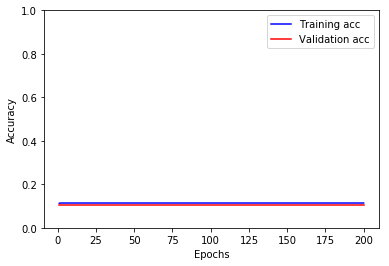


Neural Net: 1 units in each hidden layer;  2 hidden layers
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 2         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                20        
Total params: 39
Trainable params: 39
Non-trainable params: 0
_________________________________________________________________
Train on 48000 samples, validate on 12000 samples
Epoch 1/200
 - 2s - loss: 2.3014 - acc: 0.1131 - val_loss: 2.3020 - val_acc: 0.1060
Epoch 2/200
 - 2s - loss: 2.3011 - acc: 0.1140 - val_loss: 2.3024 - val_acc: 0.1060


 - 2s - loss: 2.3011 - acc: 0.1140 - val_loss: 2.3021 - val_acc: 0.1060
Epoch 87/200
 - 2s - loss: 2.3012 - acc: 0.1140 - val_loss: 2.3021 - val_acc: 0.1060
Epoch 88/200
 - 2s - loss: 2.3011 - acc: 0.1140 - val_loss: 2.3021 - val_acc: 0.1060
Epoch 89/200
 - 2s - loss: 2.3012 - acc: 0.1140 - val_loss: 2.3022 - val_acc: 0.1060
Epoch 90/200
 - 2s - loss: 2.3011 - acc: 0.1140 - val_loss: 2.3021 - val_acc: 0.1060
Epoch 91/200
 - 2s - loss: 2.3012 - acc: 0.1140 - val_loss: 2.3021 - val_acc: 0.1060
Epoch 92/200
 - 2s - loss: 2.3012 - acc: 0.1140 - val_loss: 2.3021 - val_acc: 0.1060
Epoch 93/200
 - 2s - loss: 2.3011 - acc: 0.1140 - val_loss: 2.3021 - val_acc: 0.1060
Epoch 94/200
 - 2s - loss: 2.3012 - acc: 0.1140 - val_loss: 2.3021 - val_acc: 0.1060
Epoch 95/200
 - 2s - loss: 2.3011 - acc: 0.1140 - val_loss: 2.3020 - val_acc: 0.1060
Epoch 96/200
 - 2s - loss: 2.3011 - acc: 0.1140 - val_loss: 2.3025 - val_acc: 0.1060
Epoch 97/200
 - 2s - loss: 2.3012 - acc: 0.1140 - val_loss: 2.3023 - val_acc: 

Epoch 182/200
 - 2s - loss: 2.3011 - acc: 0.1140 - val_loss: 2.3022 - val_acc: 0.1060
Epoch 183/200
 - 2s - loss: 2.3012 - acc: 0.1140 - val_loss: 2.3021 - val_acc: 0.1060
Epoch 184/200
 - 2s - loss: 2.3012 - acc: 0.1140 - val_loss: 2.3021 - val_acc: 0.1060
Epoch 185/200
 - 2s - loss: 2.3011 - acc: 0.1140 - val_loss: 2.3022 - val_acc: 0.1060
Epoch 186/200
 - 2s - loss: 2.3011 - acc: 0.1140 - val_loss: 2.3020 - val_acc: 0.1060
Epoch 187/200
 - 2s - loss: 2.3011 - acc: 0.1140 - val_loss: 2.3020 - val_acc: 0.1060
Epoch 188/200
 - 2s - loss: 2.3012 - acc: 0.1140 - val_loss: 2.3022 - val_acc: 0.1060
Epoch 189/200
 - 2s - loss: 2.3012 - acc: 0.1140 - val_loss: 2.3020 - val_acc: 0.1060
Epoch 190/200
 - 2s - loss: 2.3011 - acc: 0.1140 - val_loss: 2.3021 - val_acc: 0.1060
Epoch 191/200
 - 2s - loss: 2.3012 - acc: 0.1140 - val_loss: 2.3022 - val_acc: 0.1060
Epoch 192/200
 - 2s - loss: 2.3011 - acc: 0.1140 - val_loss: 2.3022 - val_acc: 0.1060
Epoch 193/200
 - 2s - loss: 2.3012 - acc: 0.1140 - val

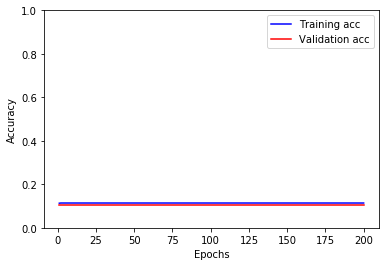


Neural Net: 1 units in each hidden layer;  4 hidden layers
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 16)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 2         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 2         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 2         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                20        
Total params: 43
Trainable params: 43
Non-trainable params: 0
____________________

 - 2s - loss: 2.3012 - acc: 0.1140 - val_loss: 2.3021 - val_acc: 0.1060
Epoch 84/200
 - 2s - loss: 2.3011 - acc: 0.1140 - val_loss: 2.3022 - val_acc: 0.1060
Epoch 85/200
 - 3s - loss: 2.3012 - acc: 0.1140 - val_loss: 2.3022 - val_acc: 0.1060
Epoch 86/200
 - 3s - loss: 2.3012 - acc: 0.1140 - val_loss: 2.3020 - val_acc: 0.1060
Epoch 87/200
 - 3s - loss: 2.3012 - acc: 0.1140 - val_loss: 2.3021 - val_acc: 0.1060
Epoch 88/200
 - 3s - loss: 2.3011 - acc: 0.1140 - val_loss: 2.3022 - val_acc: 0.1060
Epoch 89/200
 - 3s - loss: 2.3011 - acc: 0.1140 - val_loss: 2.3022 - val_acc: 0.1060
Epoch 90/200
 - 2s - loss: 2.3011 - acc: 0.1140 - val_loss: 2.3022 - val_acc: 0.1060
Epoch 91/200
 - 2s - loss: 2.3012 - acc: 0.1140 - val_loss: 2.3022 - val_acc: 0.1060
Epoch 92/200
 - 2s - loss: 2.3012 - acc: 0.1140 - val_loss: 2.3020 - val_acc: 0.1060
Epoch 93/200
 - 2s - loss: 2.3011 - acc: 0.1140 - val_loss: 2.3021 - val_acc: 0.1060
Epoch 94/200
 - 3s - loss: 2.3011 - acc: 0.1140 - val_loss: 2.3019 - val_acc: 

Epoch 179/200
 - 2s - loss: 2.3012 - acc: 0.1140 - val_loss: 2.3021 - val_acc: 0.1060
Epoch 180/200
 - 2s - loss: 2.3011 - acc: 0.1140 - val_loss: 2.3020 - val_acc: 0.1060
Epoch 181/200
 - 3s - loss: 2.3011 - acc: 0.1140 - val_loss: 2.3021 - val_acc: 0.1060
Epoch 182/200
 - 3s - loss: 2.3011 - acc: 0.1140 - val_loss: 2.3022 - val_acc: 0.1060
Epoch 183/200
 - 2s - loss: 2.3012 - acc: 0.1140 - val_loss: 2.3022 - val_acc: 0.1060
Epoch 184/200
 - 2s - loss: 2.3011 - acc: 0.1140 - val_loss: 2.3021 - val_acc: 0.1060
Epoch 185/200
 - 2s - loss: 2.3012 - acc: 0.1140 - val_loss: 2.3023 - val_acc: 0.1060
Epoch 186/200
 - 3s - loss: 2.3012 - acc: 0.1140 - val_loss: 2.3021 - val_acc: 0.1060
Epoch 187/200
 - 3s - loss: 2.3011 - acc: 0.1140 - val_loss: 2.3023 - val_acc: 0.1060
Epoch 188/200
 - 2s - loss: 2.3011 - acc: 0.1140 - val_loss: 2.3022 - val_acc: 0.1060
Epoch 189/200
 - 3s - loss: 2.3012 - acc: 0.1140 - val_loss: 2.3022 - val_acc: 0.1060
Epoch 190/200
 - 3s - loss: 2.3012 - acc: 0.1140 - val

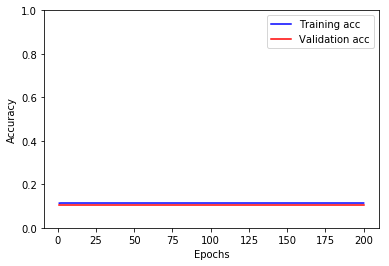


Neural Net: 1 units in each hidden layer;  8 hidden layers
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 16)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 17        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 2         
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 2         
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 2         
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 2         
_________________________________________________________________
dense_15 (Dense)

Epoch 77/200
 - 4s - loss: 2.3012 - acc: 0.1140 - val_loss: 2.3021 - val_acc: 0.1060
Epoch 78/200
 - 4s - loss: 2.3012 - acc: 0.1140 - val_loss: 2.3023 - val_acc: 0.1060
Epoch 79/200
 - 4s - loss: 2.3011 - acc: 0.1140 - val_loss: 2.3021 - val_acc: 0.1060
Epoch 80/200
 - 4s - loss: 2.3012 - acc: 0.1140 - val_loss: 2.3022 - val_acc: 0.1060
Epoch 81/200
 - 3s - loss: 2.3012 - acc: 0.1140 - val_loss: 2.3023 - val_acc: 0.1060
Epoch 82/200
 - 3s - loss: 2.3011 - acc: 0.1140 - val_loss: 2.3021 - val_acc: 0.1060
Epoch 83/200
 - 3s - loss: 2.3011 - acc: 0.1140 - val_loss: 2.3024 - val_acc: 0.1060
Epoch 84/200
 - 3s - loss: 2.3012 - acc: 0.1140 - val_loss: 2.3020 - val_acc: 0.1060
Epoch 85/200
 - 3s - loss: 2.3011 - acc: 0.1140 - val_loss: 2.3021 - val_acc: 0.1060
Epoch 86/200
 - 3s - loss: 2.3012 - acc: 0.1140 - val_loss: 2.3021 - val_acc: 0.1060
Epoch 87/200
 - 3s - loss: 2.3011 - acc: 0.1140 - val_loss: 2.3022 - val_acc: 0.1060
Epoch 88/200
 - 3s - loss: 2.3011 - acc: 0.1140 - val_loss: 2.302

Epoch 173/200
 - 3s - loss: 2.3012 - acc: 0.1140 - val_loss: 2.3021 - val_acc: 0.1060
Epoch 174/200
 - 4s - loss: 2.3012 - acc: 0.1140 - val_loss: 2.3022 - val_acc: 0.1060
Epoch 175/200
 - 3s - loss: 2.3011 - acc: 0.1140 - val_loss: 2.3020 - val_acc: 0.1060
Epoch 176/200
 - 3s - loss: 2.3011 - acc: 0.1140 - val_loss: 2.3019 - val_acc: 0.1060
Epoch 177/200
 - 3s - loss: 2.3012 - acc: 0.1140 - val_loss: 2.3021 - val_acc: 0.1060
Epoch 178/200
 - 3s - loss: 2.3011 - acc: 0.1140 - val_loss: 2.3023 - val_acc: 0.1060
Epoch 179/200
 - 3s - loss: 2.3011 - acc: 0.1140 - val_loss: 2.3020 - val_acc: 0.1060
Epoch 180/200
 - 4s - loss: 2.3012 - acc: 0.1140 - val_loss: 2.3021 - val_acc: 0.1060
Epoch 181/200
 - 4s - loss: 2.3011 - acc: 0.1140 - val_loss: 2.3019 - val_acc: 0.1060
Epoch 182/200
 - 4s - loss: 2.3011 - acc: 0.1140 - val_loss: 2.3022 - val_acc: 0.1060
Epoch 183/200
 - 4s - loss: 2.3012 - acc: 0.1140 - val_loss: 2.3022 - val_acc: 0.1060
Epoch 184/200
 - 3s - loss: 2.3012 - acc: 0.1140 - val

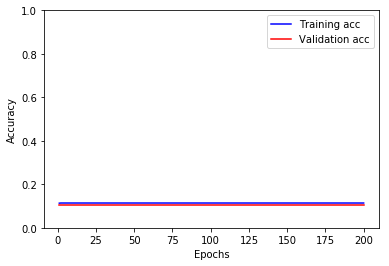


Neural Net: 1 units in each hidden layer;  16 hidden layers
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 16)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 17        
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 2         
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 2         
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 2         
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 2         
_________________________________________________________________
dense_24 (Dense

Epoch 65/200
 - 6s - loss: 2.3011 - acc: 0.1140 - val_loss: 2.3022 - val_acc: 0.1060
Epoch 66/200
 - 6s - loss: 2.3012 - acc: 0.1140 - val_loss: 2.3022 - val_acc: 0.1060
Epoch 67/200
 - 6s - loss: 2.3011 - acc: 0.1140 - val_loss: 2.3024 - val_acc: 0.1060
Epoch 68/200
 - 6s - loss: 2.3012 - acc: 0.1140 - val_loss: 2.3020 - val_acc: 0.1060
Epoch 69/200
 - 5s - loss: 2.3012 - acc: 0.1140 - val_loss: 2.3020 - val_acc: 0.1060
Epoch 70/200
 - 6s - loss: 2.3012 - acc: 0.1140 - val_loss: 2.3020 - val_acc: 0.1060
Epoch 71/200
 - 6s - loss: 2.3012 - acc: 0.1140 - val_loss: 2.3022 - val_acc: 0.1060
Epoch 72/200
 - 6s - loss: 2.3011 - acc: 0.1140 - val_loss: 2.3020 - val_acc: 0.1060
Epoch 73/200
 - 6s - loss: 2.3012 - acc: 0.1140 - val_loss: 2.3019 - val_acc: 0.1060
Epoch 74/200
 - 6s - loss: 2.3012 - acc: 0.1140 - val_loss: 2.3022 - val_acc: 0.1060
Epoch 75/200
 - 5s - loss: 2.3011 - acc: 0.1140 - val_loss: 2.3019 - val_acc: 0.1060
Epoch 76/200
 - 5s - loss: 2.3011 - acc: 0.1140 - val_loss: 2.302

Epoch 161/200
 - 6s - loss: 2.3012 - acc: 0.1140 - val_loss: 2.3022 - val_acc: 0.1060
Epoch 162/200
 - 6s - loss: 2.3011 - acc: 0.1140 - val_loss: 2.3022 - val_acc: 0.1060
Epoch 163/200
 - 6s - loss: 2.3012 - acc: 0.1140 - val_loss: 2.3022 - val_acc: 0.1060
Epoch 164/200
 - 6s - loss: 2.3012 - acc: 0.1140 - val_loss: 2.3023 - val_acc: 0.1060
Epoch 165/200
 - 6s - loss: 2.3012 - acc: 0.1140 - val_loss: 2.3021 - val_acc: 0.1060
Epoch 166/200
 - 6s - loss: 2.3012 - acc: 0.1140 - val_loss: 2.3021 - val_acc: 0.1060
Epoch 167/200
 - 6s - loss: 2.3012 - acc: 0.1140 - val_loss: 2.3021 - val_acc: 0.1060
Epoch 168/200
 - 6s - loss: 2.3012 - acc: 0.1140 - val_loss: 2.3021 - val_acc: 0.1060
Epoch 169/200
 - 6s - loss: 2.3011 - acc: 0.1140 - val_loss: 2.3021 - val_acc: 0.1060
Epoch 170/200
 - 6s - loss: 2.3012 - acc: 0.1140 - val_loss: 2.3020 - val_acc: 0.1060
Epoch 171/200
 - 6s - loss: 2.3011 - acc: 0.1140 - val_loss: 2.3025 - val_acc: 0.1060
Epoch 172/200
 - 6s - loss: 2.3012 - acc: 0.1140 - val

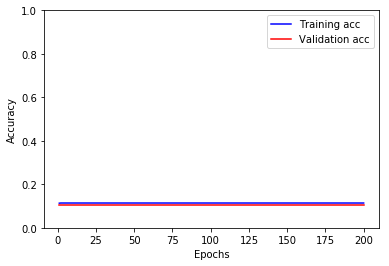


Neural Net: 2 units in each hidden layer;  1 hidden layers
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 16)                0         
_________________________________________________________________
dense_36 (Dense)             (None, 2)                 34        
_________________________________________________________________
dense_37 (Dense)             (None, 10)                30        
Total params: 64
Trainable params: 64
Non-trainable params: 0
_________________________________________________________________
Train on 48000 samples, validate on 12000 samples
Epoch 1/200
 - 3s - loss: 2.7050 - acc: 0.1873 - val_loss: 1.9836 - val_acc: 0.2213
Epoch 2/200
 - 2s - loss: 1.9443 - acc: 0.2296 - val_loss: 1.8955 - val_acc: 0.2377
Epoch 3/200
 - 2s - loss: 1.8547 - acc: 0.2604 - val_loss: 1.6956 - val_acc: 0.3434
Epoch 4/200
 - 2s - loss: 1.6352 - acc: 0.3699 -

Epoch 88/200
 - 2s - loss: 1.3616 - acc: 0.5355 - val_loss: 1.3114 - val_acc: 0.5447
Epoch 89/200
 - 2s - loss: 1.3612 - acc: 0.5361 - val_loss: 1.3055 - val_acc: 0.5563
Epoch 90/200
 - 2s - loss: 1.3640 - acc: 0.5351 - val_loss: 1.3127 - val_acc: 0.5477
Epoch 91/200
 - 2s - loss: 1.3612 - acc: 0.5355 - val_loss: 1.3055 - val_acc: 0.5599
Epoch 92/200
 - 2s - loss: 1.3624 - acc: 0.5376 - val_loss: 1.3077 - val_acc: 0.5607
Epoch 93/200
 - 2s - loss: 1.3610 - acc: 0.5376 - val_loss: 1.3149 - val_acc: 0.5524
Epoch 94/200
 - 2s - loss: 1.3608 - acc: 0.5379 - val_loss: 1.3039 - val_acc: 0.5672
Epoch 95/200
 - 2s - loss: 1.3616 - acc: 0.5371 - val_loss: 1.3305 - val_acc: 0.5509
Epoch 96/200
 - 2s - loss: 1.3619 - acc: 0.5359 - val_loss: 1.3053 - val_acc: 0.5563
Epoch 97/200
 - 2s - loss: 1.3614 - acc: 0.5349 - val_loss: 1.3118 - val_acc: 0.5526
Epoch 98/200
 - 2s - loss: 1.3616 - acc: 0.5377 - val_loss: 1.3098 - val_acc: 0.5427
Epoch 99/200
 - 2s - loss: 1.3610 - acc: 0.5355 - val_loss: 1.324

Epoch 184/200
 - 2s - loss: 1.3582 - acc: 0.5366 - val_loss: 1.3083 - val_acc: 0.5603
Epoch 185/200
 - 2s - loss: 1.3582 - acc: 0.5395 - val_loss: 1.3216 - val_acc: 0.5497
Epoch 186/200
 - 2s - loss: 1.3574 - acc: 0.5388 - val_loss: 1.2995 - val_acc: 0.5593
Epoch 187/200
 - 2s - loss: 1.3571 - acc: 0.5403 - val_loss: 1.2988 - val_acc: 0.5705
Epoch 188/200
 - 2s - loss: 1.3571 - acc: 0.5388 - val_loss: 1.3052 - val_acc: 0.5517
Epoch 189/200
 - 2s - loss: 1.3580 - acc: 0.5397 - val_loss: 1.3010 - val_acc: 0.5678
Epoch 190/200
 - 2s - loss: 1.3572 - acc: 0.5392 - val_loss: 1.3024 - val_acc: 0.5745
Epoch 191/200
 - 2s - loss: 1.3575 - acc: 0.5391 - val_loss: 1.3145 - val_acc: 0.5653
Epoch 192/200
 - 2s - loss: 1.3563 - acc: 0.5396 - val_loss: 1.3123 - val_acc: 0.5437
Epoch 193/200
 - 2s - loss: 1.3579 - acc: 0.5387 - val_loss: 1.3072 - val_acc: 0.5695
Epoch 194/200
 - 2s - loss: 1.3571 - acc: 0.5394 - val_loss: 1.3030 - val_acc: 0.5671
Epoch 195/200
 - 2s - loss: 1.3571 - acc: 0.5402 - val

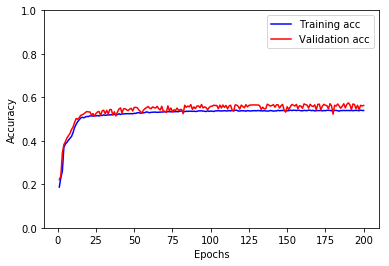


Neural Net: 2 units in each hidden layer;  2 hidden layers
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 16)                0         
_________________________________________________________________
dense_38 (Dense)             (None, 2)                 34        
_________________________________________________________________
dense_39 (Dense)             (None, 2)                 6         
_________________________________________________________________
dense_40 (Dense)             (None, 10)                30        
Total params: 70
Trainable params: 70
Non-trainable params: 0
_________________________________________________________________
Train on 48000 samples, validate on 12000 samples
Epoch 1/200
 - 3s - loss: 2.8151 - acc: 0.1690 - val_loss: 2.1932 - val_acc: 0.2176
Epoch 2/200
 - 2s - loss: 2.0090 - acc: 0.2343 - val_loss: 1.7924 - val_acc: 0.3183


 - 2s - loss: 1.3842 - acc: 0.4806 - val_loss: 1.3602 - val_acc: 0.4936
Epoch 87/200
 - 2s - loss: 1.3839 - acc: 0.4797 - val_loss: 1.3518 - val_acc: 0.4753
Epoch 88/200
 - 2s - loss: 1.3834 - acc: 0.4818 - val_loss: 1.3504 - val_acc: 0.4907
Epoch 89/200
 - 2s - loss: 1.3842 - acc: 0.4814 - val_loss: 1.3501 - val_acc: 0.4923
Epoch 90/200
 - 2s - loss: 1.3838 - acc: 0.4813 - val_loss: 1.3545 - val_acc: 0.4881
Epoch 91/200
 - 2s - loss: 1.3843 - acc: 0.4821 - val_loss: 1.3469 - val_acc: 0.4963
Epoch 92/200
 - 2s - loss: 1.3841 - acc: 0.4796 - val_loss: 1.3502 - val_acc: 0.4926
Epoch 93/200
 - 2s - loss: 1.3831 - acc: 0.4823 - val_loss: 1.3559 - val_acc: 0.4703
Epoch 94/200
 - 2s - loss: 1.3835 - acc: 0.4784 - val_loss: 1.3481 - val_acc: 0.4919
Epoch 95/200
 - 2s - loss: 1.3840 - acc: 0.4823 - val_loss: 1.3575 - val_acc: 0.4793
Epoch 96/200
 - 2s - loss: 1.3835 - acc: 0.4802 - val_loss: 1.3487 - val_acc: 0.4943
Epoch 97/200
 - 2s - loss: 1.3837 - acc: 0.4821 - val_loss: 1.3563 - val_acc: 

Epoch 182/200
 - 2s - loss: 1.3808 - acc: 0.4830 - val_loss: 1.3481 - val_acc: 0.4853
Epoch 183/200
 - 2s - loss: 1.3812 - acc: 0.4824 - val_loss: 1.3459 - val_acc: 0.4948
Epoch 184/200
 - 2s - loss: 1.3808 - acc: 0.4832 - val_loss: 1.3542 - val_acc: 0.4920
Epoch 185/200
 - 2s - loss: 1.3813 - acc: 0.4821 - val_loss: 1.3451 - val_acc: 0.5007
Epoch 186/200
 - 2s - loss: 1.3820 - acc: 0.4819 - val_loss: 1.3545 - val_acc: 0.4878
Epoch 187/200
 - 2s - loss: 1.3808 - acc: 0.4835 - val_loss: 1.3714 - val_acc: 0.4883
Epoch 188/200
 - 2s - loss: 1.3816 - acc: 0.4823 - val_loss: 1.3449 - val_acc: 0.4993
Epoch 189/200
 - 2s - loss: 1.3810 - acc: 0.4829 - val_loss: 1.3444 - val_acc: 0.4919
Epoch 190/200
 - 2s - loss: 1.3804 - acc: 0.4836 - val_loss: 1.3447 - val_acc: 0.4988
Epoch 191/200
 - 2s - loss: 1.3818 - acc: 0.4828 - val_loss: 1.3591 - val_acc: 0.4933
Epoch 192/200
 - 2s - loss: 1.3812 - acc: 0.4810 - val_loss: 1.3497 - val_acc: 0.4958
Epoch 193/200
 - 2s - loss: 1.3811 - acc: 0.4825 - val

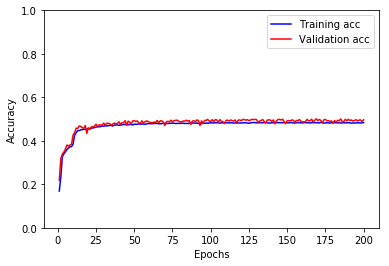


Neural Net: 2 units in each hidden layer;  4 hidden layers
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 16)                0         
_________________________________________________________________
dense_41 (Dense)             (None, 2)                 34        
_________________________________________________________________
dense_42 (Dense)             (None, 2)                 6         
_________________________________________________________________
dense_43 (Dense)             (None, 2)                 6         
_________________________________________________________________
dense_44 (Dense)             (None, 2)                 6         
_________________________________________________________________
dense_45 (Dense)             (None, 10)                30        
Total params: 82
Trainable params: 82
Non-trainable params: 0
____________________

 - 3s - loss: 2.3011 - acc: 0.1140 - val_loss: 2.3021 - val_acc: 0.1060
Epoch 84/200
 - 3s - loss: 2.3011 - acc: 0.1140 - val_loss: 2.3019 - val_acc: 0.1060
Epoch 85/200
 - 4s - loss: 2.3012 - acc: 0.1140 - val_loss: 2.3020 - val_acc: 0.1060
Epoch 86/200
 - 3s - loss: 2.3012 - acc: 0.1140 - val_loss: 2.3022 - val_acc: 0.1060
Epoch 87/200
 - 3s - loss: 2.3012 - acc: 0.1140 - val_loss: 2.3021 - val_acc: 0.1060
Epoch 88/200
 - 4s - loss: 2.3011 - acc: 0.1140 - val_loss: 2.3020 - val_acc: 0.1060
Epoch 89/200
 - 3s - loss: 2.3011 - acc: 0.1140 - val_loss: 2.3022 - val_acc: 0.1060
Epoch 90/200
 - 3s - loss: 2.3011 - acc: 0.1140 - val_loss: 2.3022 - val_acc: 0.1060
Epoch 91/200
 - 3s - loss: 2.3012 - acc: 0.1140 - val_loss: 2.3022 - val_acc: 0.1060
Epoch 92/200
 - 3s - loss: 2.3012 - acc: 0.1140 - val_loss: 2.3021 - val_acc: 0.1060
Epoch 93/200
 - 3s - loss: 2.3011 - acc: 0.1140 - val_loss: 2.3021 - val_acc: 0.1060
Epoch 94/200
 - 3s - loss: 2.3012 - acc: 0.1140 - val_loss: 2.3021 - val_acc: 

Epoch 179/200
 - 3s - loss: 2.3012 - acc: 0.1140 - val_loss: 2.3021 - val_acc: 0.1060
Epoch 180/200
 - 3s - loss: 2.3011 - acc: 0.1140 - val_loss: 2.3021 - val_acc: 0.1060
Epoch 181/200
 - 3s - loss: 2.3011 - acc: 0.1140 - val_loss: 2.3021 - val_acc: 0.1060
Epoch 182/200
 - 3s - loss: 2.3012 - acc: 0.1140 - val_loss: 2.3020 - val_acc: 0.1060
Epoch 183/200
 - 3s - loss: 2.3011 - acc: 0.1140 - val_loss: 2.3021 - val_acc: 0.1060
Epoch 184/200
 - 3s - loss: 2.3012 - acc: 0.1140 - val_loss: 2.3021 - val_acc: 0.1060
Epoch 185/200
 - 3s - loss: 2.3012 - acc: 0.1140 - val_loss: 2.3021 - val_acc: 0.1060
Epoch 186/200
 - 3s - loss: 2.3011 - acc: 0.1140 - val_loss: 2.3021 - val_acc: 0.1060
Epoch 187/200
 - 3s - loss: 2.3011 - acc: 0.1140 - val_loss: 2.3022 - val_acc: 0.1060
Epoch 188/200
 - 3s - loss: 2.3011 - acc: 0.1140 - val_loss: 2.3022 - val_acc: 0.1060
Epoch 189/200
 - 3s - loss: 2.3011 - acc: 0.1140 - val_loss: 2.3022 - val_acc: 0.1060
Epoch 190/200
 - 3s - loss: 2.3011 - acc: 0.1140 - val

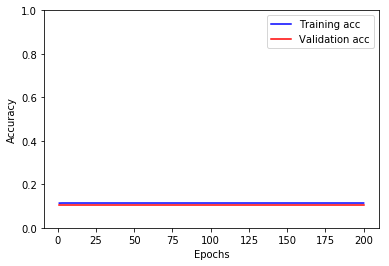


Neural Net: 2 units in each hidden layer;  8 hidden layers
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 16)                0         
_________________________________________________________________
dense_46 (Dense)             (None, 2)                 34        
_________________________________________________________________
dense_47 (Dense)             (None, 2)                 6         
_________________________________________________________________
dense_48 (Dense)             (None, 2)                 6         
_________________________________________________________________
dense_49 (Dense)             (None, 2)                 6         
_________________________________________________________________
dense_50 (Dense)             (None, 2)                 6         
_________________________________________________________________
dense_51 (Dense)

Epoch 77/200
 - 4s - loss: 2.3011 - acc: 0.1140 - val_loss: 2.3020 - val_acc: 0.1060
Epoch 78/200
 - 4s - loss: 2.3011 - acc: 0.1140 - val_loss: 2.3024 - val_acc: 0.1060
Epoch 79/200
 - 4s - loss: 2.3012 - acc: 0.1140 - val_loss: 2.3023 - val_acc: 0.1060
Epoch 80/200
 - 4s - loss: 2.3012 - acc: 0.1140 - val_loss: 2.3021 - val_acc: 0.1060
Epoch 81/200
 - 4s - loss: 2.3011 - acc: 0.1140 - val_loss: 2.3023 - val_acc: 0.1060
Epoch 82/200
 - 4s - loss: 2.3011 - acc: 0.1140 - val_loss: 2.3023 - val_acc: 0.1060
Epoch 83/200
 - 4s - loss: 2.3011 - acc: 0.1140 - val_loss: 2.3021 - val_acc: 0.1060
Epoch 84/200
 - 4s - loss: 2.3011 - acc: 0.1140 - val_loss: 2.3022 - val_acc: 0.1060
Epoch 85/200
 - 4s - loss: 2.3012 - acc: 0.1140 - val_loss: 2.3022 - val_acc: 0.1060
Epoch 86/200
 - 4s - loss: 2.3012 - acc: 0.1140 - val_loss: 2.3022 - val_acc: 0.1060
Epoch 87/200
 - 4s - loss: 2.3011 - acc: 0.1140 - val_loss: 2.3021 - val_acc: 0.1060
Epoch 88/200
 - 4s - loss: 2.3011 - acc: 0.1140 - val_loss: 2.302

Epoch 173/200
 - 4s - loss: 2.3012 - acc: 0.1140 - val_loss: 2.3021 - val_acc: 0.1060
Epoch 174/200
 - 4s - loss: 2.3011 - acc: 0.1140 - val_loss: 2.3022 - val_acc: 0.1060
Epoch 175/200
 - 4s - loss: 2.3011 - acc: 0.1140 - val_loss: 2.3020 - val_acc: 0.1060
Epoch 176/200
 - 4s - loss: 2.3011 - acc: 0.1140 - val_loss: 2.3022 - val_acc: 0.1060
Epoch 177/200
 - 4s - loss: 2.3012 - acc: 0.1140 - val_loss: 2.3021 - val_acc: 0.1060
Epoch 178/200
 - 4s - loss: 2.3012 - acc: 0.1140 - val_loss: 2.3021 - val_acc: 0.1060
Epoch 179/200
 - 4s - loss: 2.3012 - acc: 0.1140 - val_loss: 2.3022 - val_acc: 0.1060
Epoch 180/200
 - 4s - loss: 2.3011 - acc: 0.1140 - val_loss: 2.3022 - val_acc: 0.1060
Epoch 181/200
 - 4s - loss: 2.3011 - acc: 0.1140 - val_loss: 2.3020 - val_acc: 0.1060
Epoch 182/200
 - 4s - loss: 2.3012 - acc: 0.1140 - val_loss: 2.3022 - val_acc: 0.1060
Epoch 183/200
 - 4s - loss: 2.3012 - acc: 0.1140 - val_loss: 2.3020 - val_acc: 0.1060
Epoch 184/200
 - 4s - loss: 2.3012 - acc: 0.1140 - val

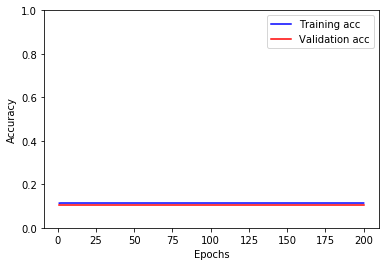


Neural Net: 2 units in each hidden layer;  16 hidden layers
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_9 (Flatten)          (None, 16)                0         
_________________________________________________________________
dense_55 (Dense)             (None, 2)                 34        
_________________________________________________________________
dense_56 (Dense)             (None, 2)                 6         
_________________________________________________________________
dense_57 (Dense)             (None, 2)                 6         
_________________________________________________________________
dense_58 (Dense)             (None, 2)                 6         
_________________________________________________________________
dense_59 (Dense)             (None, 2)                 6         
_________________________________________________________________
dense_60 (Dense

Epoch 65/200
 - 6s - loss: 2.3011 - acc: 0.1140 - val_loss: 2.3022 - val_acc: 0.1060
Epoch 66/200
 - 6s - loss: 2.3011 - acc: 0.1140 - val_loss: 2.3021 - val_acc: 0.1060
Epoch 67/200
 - 6s - loss: 2.3011 - acc: 0.1140 - val_loss: 2.3022 - val_acc: 0.1060
Epoch 68/200
 - 6s - loss: 2.3012 - acc: 0.1140 - val_loss: 2.3020 - val_acc: 0.1060
Epoch 69/200
 - 6s - loss: 2.3011 - acc: 0.1140 - val_loss: 2.3022 - val_acc: 0.1060
Epoch 70/200
 - 6s - loss: 2.3011 - acc: 0.1140 - val_loss: 2.3022 - val_acc: 0.1060
Epoch 71/200
 - 6s - loss: 2.3011 - acc: 0.1140 - val_loss: 2.3023 - val_acc: 0.1060
Epoch 72/200
 - 6s - loss: 2.3011 - acc: 0.1140 - val_loss: 2.3022 - val_acc: 0.1060
Epoch 73/200
 - 6s - loss: 2.3012 - acc: 0.1140 - val_loss: 2.3023 - val_acc: 0.1060
Epoch 74/200
 - 6s - loss: 2.3011 - acc: 0.1140 - val_loss: 2.3023 - val_acc: 0.1060
Epoch 75/200
 - 6s - loss: 2.3012 - acc: 0.1140 - val_loss: 2.3020 - val_acc: 0.1060
Epoch 76/200
 - 6s - loss: 2.3011 - acc: 0.1140 - val_loss: 2.302

Epoch 161/200
 - 6s - loss: 2.3012 - acc: 0.1140 - val_loss: 2.3022 - val_acc: 0.1060
Epoch 162/200
 - 6s - loss: 2.3012 - acc: 0.1140 - val_loss: 2.3021 - val_acc: 0.1060
Epoch 163/200
 - 6s - loss: 2.3012 - acc: 0.1140 - val_loss: 2.3021 - val_acc: 0.1060
Epoch 164/200
 - 6s - loss: 2.3012 - acc: 0.1140 - val_loss: 2.3022 - val_acc: 0.1060
Epoch 165/200
 - 6s - loss: 2.3011 - acc: 0.1140 - val_loss: 2.3021 - val_acc: 0.1060
Epoch 166/200
 - 6s - loss: 2.3012 - acc: 0.1140 - val_loss: 2.3023 - val_acc: 0.1060
Epoch 167/200
 - 7s - loss: 2.3011 - acc: 0.1140 - val_loss: 2.3023 - val_acc: 0.1060
Epoch 168/200
 - 6s - loss: 2.3012 - acc: 0.1140 - val_loss: 2.3021 - val_acc: 0.1060
Epoch 169/200
 - 6s - loss: 2.3011 - acc: 0.1140 - val_loss: 2.3025 - val_acc: 0.1060
Epoch 170/200
 - 6s - loss: 2.3012 - acc: 0.1140 - val_loss: 2.3021 - val_acc: 0.1060
Epoch 171/200
 - 7s - loss: 2.3012 - acc: 0.1140 - val_loss: 2.3021 - val_acc: 0.1060
Epoch 172/200
 - 7s - loss: 2.3012 - acc: 0.1140 - val

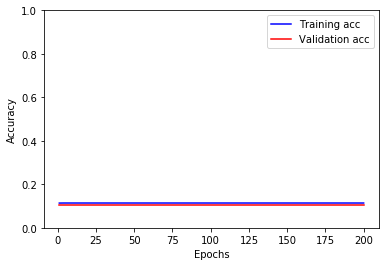


Neural Net: 4 units in each hidden layer;  1 hidden layers
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_10 (Flatten)         (None, 16)                0         
_________________________________________________________________
dense_72 (Dense)             (None, 4)                 68        
_________________________________________________________________
dense_73 (Dense)             (None, 10)                50        
Total params: 118
Trainable params: 118
Non-trainable params: 0
_________________________________________________________________
Train on 48000 samples, validate on 12000 samples
Epoch 1/200
 - 4s - loss: 2.6560 - acc: 0.1101 - val_loss: 2.3046 - val_acc: 0.1060
Epoch 2/200
 - 2s - loss: 2.3030 - acc: 0.1140 - val_loss: 2.3021 - val_acc: 0.1060
Epoch 3/200
 - 2s - loss: 2.3007 - acc: 0.1142 - val_loss: 2.3010 - val_acc: 0.1070
Epoch 4/200
 - 2s - loss: 2.2969 - acc: 0.1174

Epoch 88/200
 - 2s - loss: 1.3657 - acc: 0.5280 - val_loss: 1.3094 - val_acc: 0.5468
Epoch 89/200
 - 2s - loss: 1.3649 - acc: 0.5315 - val_loss: 1.3326 - val_acc: 0.5482
Epoch 90/200
 - 3s - loss: 1.3647 - acc: 0.5330 - val_loss: 1.3102 - val_acc: 0.5599
Epoch 91/200
 - 3s - loss: 1.3639 - acc: 0.5316 - val_loss: 1.3324 - val_acc: 0.5523
Epoch 92/200
 - 3s - loss: 1.3652 - acc: 0.5309 - val_loss: 1.3171 - val_acc: 0.5340
Epoch 93/200
 - 2s - loss: 1.3643 - acc: 0.5316 - val_loss: 1.3187 - val_acc: 0.5405
Epoch 94/200
 - 2s - loss: 1.3632 - acc: 0.5318 - val_loss: 1.3073 - val_acc: 0.5367
Epoch 95/200
 - 3s - loss: 1.3627 - acc: 0.5320 - val_loss: 1.3093 - val_acc: 0.5544
Epoch 96/200
 - 3s - loss: 1.3638 - acc: 0.5319 - val_loss: 1.3138 - val_acc: 0.5509
Epoch 97/200
 - 3s - loss: 1.3631 - acc: 0.5320 - val_loss: 1.3078 - val_acc: 0.5619
Epoch 98/200
 - 2s - loss: 1.3632 - acc: 0.5325 - val_loss: 1.3133 - val_acc: 0.5474
Epoch 99/200
 - 2s - loss: 1.3634 - acc: 0.5340 - val_loss: 1.313

Epoch 184/200
 - 2s - loss: 1.3584 - acc: 0.5376 - val_loss: 1.3212 - val_acc: 0.5573
Epoch 185/200
 - 2s - loss: 1.3601 - acc: 0.5382 - val_loss: 1.3000 - val_acc: 0.5517
Epoch 186/200
 - 2s - loss: 1.3589 - acc: 0.5389 - val_loss: 1.2995 - val_acc: 0.5656
Epoch 187/200
 - 2s - loss: 1.3580 - acc: 0.5395 - val_loss: 1.3023 - val_acc: 0.5697
Epoch 188/200
 - 3s - loss: 1.3576 - acc: 0.5377 - val_loss: 1.3010 - val_acc: 0.5562
Epoch 189/200
 - 2s - loss: 1.3576 - acc: 0.5388 - val_loss: 1.3244 - val_acc: 0.5329
Epoch 190/200
 - 2s - loss: 1.3587 - acc: 0.5369 - val_loss: 1.3037 - val_acc: 0.5696
Epoch 191/200
 - 2s - loss: 1.3575 - acc: 0.5393 - val_loss: 1.3099 - val_acc: 0.5447
Epoch 192/200
 - 2s - loss: 1.3581 - acc: 0.5375 - val_loss: 1.3018 - val_acc: 0.5559
Epoch 193/200
 - 2s - loss: 1.3581 - acc: 0.5375 - val_loss: 1.3028 - val_acc: 0.5660
Epoch 194/200
 - 2s - loss: 1.3588 - acc: 0.5383 - val_loss: 1.3010 - val_acc: 0.5508
Epoch 195/200
 - 3s - loss: 1.3575 - acc: 0.5394 - val

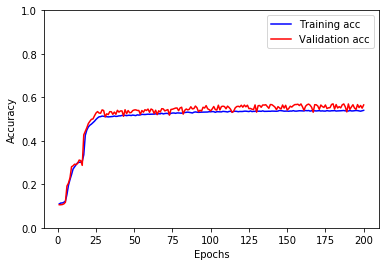


Neural Net: 4 units in each hidden layer;  2 hidden layers
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_11 (Flatten)         (None, 16)                0         
_________________________________________________________________
dense_74 (Dense)             (None, 4)                 68        
_________________________________________________________________
dense_75 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_76 (Dense)             (None, 10)                50        
Total params: 138
Trainable params: 138
Non-trainable params: 0
_________________________________________________________________
Train on 48000 samples, validate on 12000 samples
Epoch 1/200
 - 4s - loss: 2.3213 - acc: 0.1130 - val_loss: 2.3020 - val_acc: 0.1060
Epoch 2/200
 - 3s - loss: 2.3011 - acc: 0.1140 - val_loss: 2.3019 - val_acc: 0.106

 - 3s - loss: 2.3012 - acc: 0.1140 - val_loss: 2.3022 - val_acc: 0.1060
Epoch 87/200
 - 3s - loss: 2.3011 - acc: 0.1140 - val_loss: 2.3023 - val_acc: 0.1060
Epoch 88/200
 - 2s - loss: 2.3012 - acc: 0.1140 - val_loss: 2.3021 - val_acc: 0.1060
Epoch 89/200
 - 3s - loss: 2.3011 - acc: 0.1140 - val_loss: 2.3021 - val_acc: 0.1060
Epoch 90/200
 - 3s - loss: 2.3011 - acc: 0.1140 - val_loss: 2.3023 - val_acc: 0.1060
Epoch 91/200
 - 3s - loss: 2.3011 - acc: 0.1140 - val_loss: 2.3021 - val_acc: 0.1060
Epoch 92/200
 - 2s - loss: 2.3012 - acc: 0.1140 - val_loss: 2.3021 - val_acc: 0.1060
Epoch 93/200
 - 2s - loss: 2.3011 - acc: 0.1140 - val_loss: 2.3019 - val_acc: 0.1060
Epoch 94/200
 - 3s - loss: 2.3011 - acc: 0.1140 - val_loss: 2.3021 - val_acc: 0.1060
Epoch 95/200
 - 2s - loss: 2.3012 - acc: 0.1140 - val_loss: 2.3021 - val_acc: 0.1060
Epoch 96/200
 - 3s - loss: 2.3011 - acc: 0.1140 - val_loss: 2.3021 - val_acc: 0.1060
Epoch 97/200
 - 3s - loss: 2.3011 - acc: 0.1140 - val_loss: 2.3022 - val_acc: 

Epoch 182/200
 - 3s - loss: 2.3011 - acc: 0.1140 - val_loss: 2.3025 - val_acc: 0.1060
Epoch 183/200
 - 3s - loss: 2.3012 - acc: 0.1140 - val_loss: 2.3021 - val_acc: 0.1060
Epoch 184/200
 - 3s - loss: 2.3011 - acc: 0.1140 - val_loss: 2.3021 - val_acc: 0.1060
Epoch 185/200
 - 3s - loss: 2.3012 - acc: 0.1140 - val_loss: 2.3022 - val_acc: 0.1060
Epoch 186/200
 - 2s - loss: 2.3011 - acc: 0.1140 - val_loss: 2.3021 - val_acc: 0.1060
Epoch 187/200
 - 3s - loss: 2.3012 - acc: 0.1140 - val_loss: 2.3021 - val_acc: 0.1060
Epoch 188/200
 - 3s - loss: 2.3012 - acc: 0.1140 - val_loss: 2.3021 - val_acc: 0.1060
Epoch 189/200
 - 3s - loss: 2.3012 - acc: 0.1140 - val_loss: 2.3020 - val_acc: 0.1060
Epoch 190/200
 - 3s - loss: 2.3011 - acc: 0.1140 - val_loss: 2.3020 - val_acc: 0.1060
Epoch 191/200
 - 3s - loss: 2.3011 - acc: 0.1140 - val_loss: 2.3021 - val_acc: 0.1060
Epoch 192/200
 - 3s - loss: 2.3012 - acc: 0.1140 - val_loss: 2.3020 - val_acc: 0.1060
Epoch 193/200
 - 2s - loss: 2.3012 - acc: 0.1140 - val

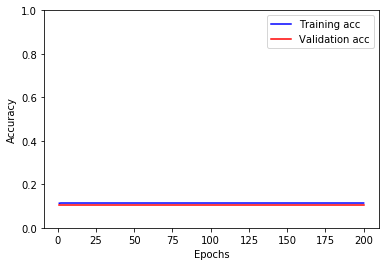


Neural Net: 4 units in each hidden layer;  4 hidden layers
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_12 (Flatten)         (None, 16)                0         
_________________________________________________________________
dense_77 (Dense)             (None, 4)                 68        
_________________________________________________________________
dense_78 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_79 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_80 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_81 (Dense)             (None, 10)                50        
Total params: 178
Trainable params: 178
Non-trainable params: 0
__________________

 - 3s - loss: 0.9019 - acc: 0.6889 - val_loss: 0.8799 - val_acc: 0.7072
Epoch 84/200
 - 3s - loss: 0.8990 - acc: 0.6910 - val_loss: 0.8678 - val_acc: 0.7089
Epoch 85/200
 - 3s - loss: 0.8991 - acc: 0.6906 - val_loss: 0.8755 - val_acc: 0.7069
Epoch 86/200
 - 3s - loss: 0.8994 - acc: 0.6908 - val_loss: 0.8631 - val_acc: 0.7095
Epoch 87/200
 - 3s - loss: 0.8985 - acc: 0.6909 - val_loss: 0.8693 - val_acc: 0.7015
Epoch 88/200
 - 3s - loss: 0.8986 - acc: 0.6899 - val_loss: 0.8684 - val_acc: 0.7112
Epoch 89/200
 - 3s - loss: 0.8989 - acc: 0.6899 - val_loss: 0.8596 - val_acc: 0.7128
Epoch 90/200
 - 3s - loss: 0.8984 - acc: 0.6915 - val_loss: 0.8703 - val_acc: 0.7067
Epoch 91/200
 - 3s - loss: 0.8975 - acc: 0.6912 - val_loss: 0.8631 - val_acc: 0.7085
Epoch 92/200
 - 3s - loss: 0.8981 - acc: 0.6905 - val_loss: 0.8806 - val_acc: 0.7020
Epoch 93/200
 - 3s - loss: 0.8974 - acc: 0.6908 - val_loss: 0.8625 - val_acc: 0.7092
Epoch 94/200
 - 3s - loss: 0.8964 - acc: 0.6918 - val_loss: 0.8759 - val_acc: 

Epoch 179/200
 - 3s - loss: 0.8787 - acc: 0.6962 - val_loss: 0.8385 - val_acc: 0.7188
Epoch 180/200
 - 3s - loss: 0.8798 - acc: 0.6959 - val_loss: 0.8510 - val_acc: 0.7097
Epoch 181/200
 - 3s - loss: 0.8793 - acc: 0.6953 - val_loss: 0.8452 - val_acc: 0.7094
Epoch 182/200
 - 3s - loss: 0.8800 - acc: 0.6963 - val_loss: 0.8827 - val_acc: 0.7010
Epoch 183/200
 - 3s - loss: 0.8799 - acc: 0.6958 - val_loss: 0.8473 - val_acc: 0.7113
Epoch 184/200
 - 3s - loss: 0.8794 - acc: 0.6968 - val_loss: 0.8456 - val_acc: 0.7130
Epoch 185/200
 - 3s - loss: 0.8781 - acc: 0.6963 - val_loss: 0.8405 - val_acc: 0.7176
Epoch 186/200
 - 3s - loss: 0.8791 - acc: 0.6970 - val_loss: 0.8377 - val_acc: 0.7192
Epoch 187/200
 - 3s - loss: 0.8791 - acc: 0.6948 - val_loss: 0.8379 - val_acc: 0.7186
Epoch 188/200
 - 3s - loss: 0.8798 - acc: 0.6960 - val_loss: 0.8465 - val_acc: 0.7127
Epoch 189/200
 - 3s - loss: 0.8792 - acc: 0.6963 - val_loss: 0.8551 - val_acc: 0.7088
Epoch 190/200
 - 3s - loss: 0.8789 - acc: 0.6963 - val


Neural Net: 4 units in each hidden layer;  8 hidden layers
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_13 (Flatten)         (None, 16)                0         
_________________________________________________________________
dense_82 (Dense)             (None, 4)                 68        
_________________________________________________________________
dense_83 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_84 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_85 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_86 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_87 (Dense)

Epoch 77/200
 - 4s - loss: 0.9741 - acc: 0.6771 - val_loss: 0.9322 - val_acc: 0.7029
Epoch 78/200
 - 4s - loss: 0.9737 - acc: 0.6774 - val_loss: 0.9195 - val_acc: 0.7025
Epoch 79/200
 - 4s - loss: 0.9720 - acc: 0.6783 - val_loss: 0.9212 - val_acc: 0.7027
Epoch 80/200
 - 4s - loss: 0.9716 - acc: 0.6785 - val_loss: 0.9220 - val_acc: 0.7075
Epoch 81/200
 - 4s - loss: 0.9705 - acc: 0.6799 - val_loss: 0.9300 - val_acc: 0.6972
Epoch 82/200
 - 4s - loss: 0.9704 - acc: 0.6778 - val_loss: 0.9221 - val_acc: 0.7053
Epoch 83/200
 - 4s - loss: 0.9698 - acc: 0.6802 - val_loss: 0.9205 - val_acc: 0.7024
Epoch 84/200
 - 4s - loss: 0.9701 - acc: 0.6789 - val_loss: 0.9349 - val_acc: 0.6933
Epoch 85/200
 - 4s - loss: 0.9701 - acc: 0.6775 - val_loss: 0.9221 - val_acc: 0.7011
Epoch 86/200
 - 4s - loss: 0.9701 - acc: 0.6778 - val_loss: 0.9155 - val_acc: 0.7017
Epoch 87/200
 - 4s - loss: 0.9684 - acc: 0.6775 - val_loss: 0.9254 - val_acc: 0.7027
Epoch 88/200
 - 4s - loss: 0.9683 - acc: 0.6797 - val_loss: 0.919

Epoch 173/200
 - 4s - loss: 0.9357 - acc: 0.6868 - val_loss: 0.8959 - val_acc: 0.7067
Epoch 174/200
 - 4s - loss: 0.9361 - acc: 0.6880 - val_loss: 0.8854 - val_acc: 0.7077
Epoch 175/200
 - 4s - loss: 0.9355 - acc: 0.6870 - val_loss: 0.8882 - val_acc: 0.7138
Epoch 176/200
 - 4s - loss: 0.9351 - acc: 0.6861 - val_loss: 0.8979 - val_acc: 0.7015
Epoch 177/200
 - 4s - loss: 0.9356 - acc: 0.6865 - val_loss: 0.9011 - val_acc: 0.7050
Epoch 178/200
 - 4s - loss: 0.9366 - acc: 0.6873 - val_loss: 0.8923 - val_acc: 0.7045
Epoch 179/200
 - 4s - loss: 0.9342 - acc: 0.6877 - val_loss: 0.8878 - val_acc: 0.7082
Epoch 180/200
 - 4s - loss: 0.9359 - acc: 0.6875 - val_loss: 0.8965 - val_acc: 0.7067
Epoch 181/200
 - 4s - loss: 0.9345 - acc: 0.6865 - val_loss: 0.8907 - val_acc: 0.7101
Epoch 182/200
 - 4s - loss: 0.9351 - acc: 0.6869 - val_loss: 0.9068 - val_acc: 0.7063
Epoch 183/200
 - 4s - loss: 0.9348 - acc: 0.6885 - val_loss: 0.9054 - val_acc: 0.7038
Epoch 184/200
 - 4s - loss: 0.9357 - acc: 0.6882 - val

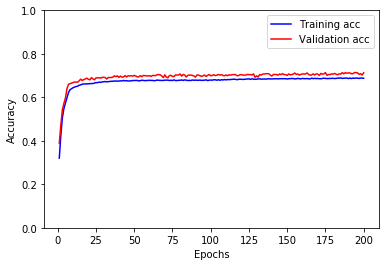


Neural Net: 4 units in each hidden layer;  16 hidden layers
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_14 (Flatten)         (None, 16)                0         
_________________________________________________________________
dense_91 (Dense)             (None, 4)                 68        
_________________________________________________________________
dense_92 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_93 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_94 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_95 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_96 (Dense

Epoch 65/200
 - 6s - loss: 2.3011 - acc: 0.1140 - val_loss: 2.3021 - val_acc: 0.1060
Epoch 66/200
 - 6s - loss: 2.3011 - acc: 0.1140 - val_loss: 2.3021 - val_acc: 0.1060
Epoch 67/200
 - 6s - loss: 2.3011 - acc: 0.1140 - val_loss: 2.3021 - val_acc: 0.1060
Epoch 68/200
 - 6s - loss: 2.3011 - acc: 0.1140 - val_loss: 2.3023 - val_acc: 0.1060
Epoch 69/200
 - 6s - loss: 2.3011 - acc: 0.1140 - val_loss: 2.3020 - val_acc: 0.1060
Epoch 70/200
 - 6s - loss: 2.3012 - acc: 0.1140 - val_loss: 2.3019 - val_acc: 0.1060
Epoch 71/200
 - 6s - loss: 2.3011 - acc: 0.1140 - val_loss: 2.3026 - val_acc: 0.1060
Epoch 72/200
 - 6s - loss: 2.3011 - acc: 0.1140 - val_loss: 2.3020 - val_acc: 0.1060
Epoch 73/200
 - 6s - loss: 2.3011 - acc: 0.1140 - val_loss: 2.3021 - val_acc: 0.1060
Epoch 74/200
 - 6s - loss: 2.3012 - acc: 0.1140 - val_loss: 2.3023 - val_acc: 0.1060
Epoch 75/200
 - 6s - loss: 2.3012 - acc: 0.1140 - val_loss: 2.3022 - val_acc: 0.1060
Epoch 76/200
 - 6s - loss: 2.3012 - acc: 0.1140 - val_loss: 2.302

Epoch 161/200
 - 6s - loss: 2.3011 - acc: 0.1140 - val_loss: 2.3021 - val_acc: 0.1060
Epoch 162/200
 - 6s - loss: 2.3012 - acc: 0.1140 - val_loss: 2.3021 - val_acc: 0.1060
Epoch 163/200
 - 6s - loss: 2.3012 - acc: 0.1140 - val_loss: 2.3020 - val_acc: 0.1060
Epoch 164/200
 - 6s - loss: 2.3011 - acc: 0.1140 - val_loss: 2.3020 - val_acc: 0.1060
Epoch 165/200
 - 6s - loss: 2.3011 - acc: 0.1140 - val_loss: 2.3021 - val_acc: 0.1060
Epoch 166/200
 - 6s - loss: 2.3011 - acc: 0.1140 - val_loss: 2.3025 - val_acc: 0.1060
Epoch 167/200
 - 6s - loss: 2.3011 - acc: 0.1140 - val_loss: 2.3022 - val_acc: 0.1060
Epoch 168/200
 - 6s - loss: 2.3011 - acc: 0.1140 - val_loss: 2.3019 - val_acc: 0.1060
Epoch 169/200
 - 7s - loss: 2.3012 - acc: 0.1140 - val_loss: 2.3021 - val_acc: 0.1060
Epoch 170/200
 - 7s - loss: 2.3011 - acc: 0.1140 - val_loss: 2.3022 - val_acc: 0.1060
Epoch 171/200
 - 7s - loss: 2.3012 - acc: 0.1140 - val_loss: 2.3020 - val_acc: 0.1060
Epoch 172/200
 - 7s - loss: 2.3011 - acc: 0.1140 - val

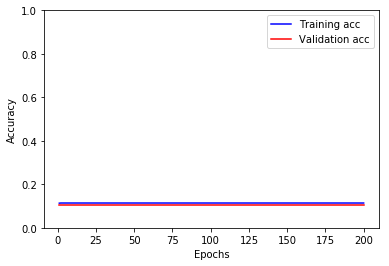


Neural Net: 8 units in each hidden layer;  1 hidden layers
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_15 (Flatten)         (None, 16)                0         
_________________________________________________________________
dense_108 (Dense)            (None, 8)                 136       
_________________________________________________________________
dense_109 (Dense)            (None, 10)                90        
Total params: 226
Trainable params: 226
Non-trainable params: 0
_________________________________________________________________
Train on 48000 samples, validate on 12000 samples
Epoch 1/200
 - 5s - loss: 3.6772 - acc: 0.2159 - val_loss: 1.9838 - val_acc: 0.2759
Epoch 2/200
 - 3s - loss: 1.7875 - acc: 0.3450 - val_loss: 1.4859 - val_acc: 0.4410
Epoch 3/200
 - 3s - loss: 1.4192 - acc: 0.4749 - val_loss: 1.3078 - val_acc: 0.5287
Epoch 4/200
 - 4s - loss: 1.3014 - acc: 0.5411

Epoch 88/200
 - 3s - loss: 0.7562 - acc: 0.7484 - val_loss: 0.7058 - val_acc: 0.7680
Epoch 89/200
 - 3s - loss: 0.7552 - acc: 0.7480 - val_loss: 0.7056 - val_acc: 0.7696
Epoch 90/200
 - 3s - loss: 0.7553 - acc: 0.7482 - val_loss: 0.7056 - val_acc: 0.7687
Epoch 91/200
 - 3s - loss: 0.7555 - acc: 0.7468 - val_loss: 0.7103 - val_acc: 0.7686
Epoch 92/200
 - 3s - loss: 0.7553 - acc: 0.7481 - val_loss: 0.7248 - val_acc: 0.7575
Epoch 93/200
 - 3s - loss: 0.7557 - acc: 0.7493 - val_loss: 0.7189 - val_acc: 0.7655
Epoch 94/200
 - 3s - loss: 0.7549 - acc: 0.7478 - val_loss: 0.7230 - val_acc: 0.7634
Epoch 95/200
 - 3s - loss: 0.7547 - acc: 0.7474 - val_loss: 0.7179 - val_acc: 0.7630
Epoch 96/200
 - 3s - loss: 0.7546 - acc: 0.7470 - val_loss: 0.7210 - val_acc: 0.7645
Epoch 97/200
 - 3s - loss: 0.7556 - acc: 0.7478 - val_loss: 0.7103 - val_acc: 0.7695
Epoch 98/200
 - 3s - loss: 0.7558 - acc: 0.7471 - val_loss: 0.7191 - val_acc: 0.7692
Epoch 99/200
 - 3s - loss: 0.7547 - acc: 0.7476 - val_loss: 0.713

Epoch 184/200
 - 3s - loss: 0.7540 - acc: 0.7490 - val_loss: 0.7222 - val_acc: 0.7629
Epoch 185/200
 - 3s - loss: 0.7540 - acc: 0.7494 - val_loss: 0.7150 - val_acc: 0.7649
Epoch 186/200
 - 3s - loss: 0.7524 - acc: 0.7483 - val_loss: 0.7095 - val_acc: 0.7700
Epoch 187/200
 - 3s - loss: 0.7533 - acc: 0.7498 - val_loss: 0.7151 - val_acc: 0.7614
Epoch 188/200
 - 3s - loss: 0.7524 - acc: 0.7499 - val_loss: 0.7075 - val_acc: 0.7695
Epoch 189/200
 - 3s - loss: 0.7538 - acc: 0.7493 - val_loss: 0.7130 - val_acc: 0.7650
Epoch 190/200
 - 2s - loss: 0.7538 - acc: 0.7488 - val_loss: 0.7033 - val_acc: 0.7698
Epoch 191/200
 - 2s - loss: 0.7525 - acc: 0.7493 - val_loss: 0.7073 - val_acc: 0.7682
Epoch 192/200
 - 2s - loss: 0.7522 - acc: 0.7508 - val_loss: 0.7122 - val_acc: 0.7669
Epoch 193/200
 - 3s - loss: 0.7538 - acc: 0.7494 - val_loss: 0.7294 - val_acc: 0.7614
Epoch 194/200
 - 3s - loss: 0.7532 - acc: 0.7491 - val_loss: 0.7101 - val_acc: 0.7713
Epoch 195/200
 - 3s - loss: 0.7538 - acc: 0.7487 - val


Neural Net: 8 units in each hidden layer;  2 hidden layers
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_16 (Flatten)         (None, 16)                0         
_________________________________________________________________
dense_110 (Dense)            (None, 8)                 136       
_________________________________________________________________
dense_111 (Dense)            (None, 8)                 72        
_________________________________________________________________
dense_112 (Dense)            (None, 10)                90        
Total params: 298
Trainable params: 298
Non-trainable params: 0
_________________________________________________________________
Train on 48000 samples, validate on 12000 samples
Epoch 1/200
 - 5s - loss: 11.6259 - acc: 0.2242 - val_loss: 9.9933 - val_acc: 0.3143
Epoch 2/200
 - 3s - loss: 9.9389 - acc: 0.3245 - val_loss: 9.8874 - val_acc: 0.33

 - 3s - loss: 0.6223 - acc: 0.7970 - val_loss: 0.6190 - val_acc: 0.8023
Epoch 87/200
 - 3s - loss: 0.6230 - acc: 0.7970 - val_loss: 0.6049 - val_acc: 0.8016
Epoch 88/200
 - 3s - loss: 0.6227 - acc: 0.7963 - val_loss: 0.6023 - val_acc: 0.8063
Epoch 89/200
 - 3s - loss: 0.6214 - acc: 0.7984 - val_loss: 0.6056 - val_acc: 0.8030
Epoch 90/200
 - 3s - loss: 0.6203 - acc: 0.7982 - val_loss: 0.6070 - val_acc: 0.8034
Epoch 91/200
 - 3s - loss: 0.6221 - acc: 0.7974 - val_loss: 0.5996 - val_acc: 0.8073
Epoch 92/200
 - 3s - loss: 0.6194 - acc: 0.7976 - val_loss: 0.6138 - val_acc: 0.7964
Epoch 93/200
 - 3s - loss: 0.6217 - acc: 0.7985 - val_loss: 0.6124 - val_acc: 0.7998
Epoch 94/200
 - 3s - loss: 0.6212 - acc: 0.7964 - val_loss: 0.6013 - val_acc: 0.8048
Epoch 95/200
 - 3s - loss: 0.6215 - acc: 0.7980 - val_loss: 0.6312 - val_acc: 0.7917
Epoch 96/200
 - 3s - loss: 0.6212 - acc: 0.7969 - val_loss: 0.6044 - val_acc: 0.8087
Epoch 97/200
 - 3s - loss: 0.6206 - acc: 0.7982 - val_loss: 0.6233 - val_acc: 

Epoch 182/200
 - 3s - loss: 0.6128 - acc: 0.7991 - val_loss: 0.5917 - val_acc: 0.8083
Epoch 183/200
 - 3s - loss: 0.6111 - acc: 0.8011 - val_loss: 0.5921 - val_acc: 0.8073
Epoch 184/200
 - 3s - loss: 0.6110 - acc: 0.7996 - val_loss: 0.5967 - val_acc: 0.8090
Epoch 185/200
 - 3s - loss: 0.6124 - acc: 0.7994 - val_loss: 0.5878 - val_acc: 0.8067
Epoch 186/200
 - 3s - loss: 0.6133 - acc: 0.7992 - val_loss: 0.6002 - val_acc: 0.8057
Epoch 187/200
 - 3s - loss: 0.6126 - acc: 0.7997 - val_loss: 0.5905 - val_acc: 0.8062
Epoch 188/200
 - 4s - loss: 0.6125 - acc: 0.8004 - val_loss: 0.5897 - val_acc: 0.8082
Epoch 189/200
 - 3s - loss: 0.6128 - acc: 0.7991 - val_loss: 0.5925 - val_acc: 0.8091
Epoch 190/200
 - 3s - loss: 0.6124 - acc: 0.8001 - val_loss: 0.6033 - val_acc: 0.7998
Epoch 191/200
 - 3s - loss: 0.6101 - acc: 0.8010 - val_loss: 0.5958 - val_acc: 0.8003
Epoch 192/200
 - 3s - loss: 0.6124 - acc: 0.7997 - val_loss: 0.6058 - val_acc: 0.8028
Epoch 193/200
 - 3s - loss: 0.6116 - acc: 0.8001 - val

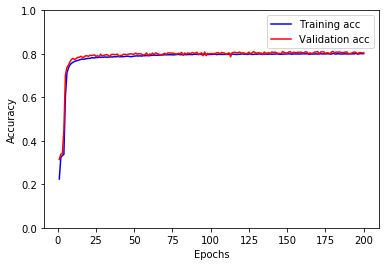


Neural Net: 8 units in each hidden layer;  4 hidden layers
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_17 (Flatten)         (None, 16)                0         
_________________________________________________________________
dense_113 (Dense)            (None, 8)                 136       
_________________________________________________________________
dense_114 (Dense)            (None, 8)                 72        
_________________________________________________________________
dense_115 (Dense)            (None, 8)                 72        
_________________________________________________________________
dense_116 (Dense)            (None, 8)                 72        
_________________________________________________________________
dense_117 (Dense)            (None, 10)                90        
Total params: 442
Trainable params: 442
Non-trainable params: 0
__________________

 - 3s - loss: 0.6162 - acc: 0.7944 - val_loss: 0.5956 - val_acc: 0.8006
Epoch 84/200
 - 3s - loss: 0.6161 - acc: 0.7944 - val_loss: 0.5913 - val_acc: 0.8043
Epoch 85/200
 - 3s - loss: 0.6167 - acc: 0.7947 - val_loss: 0.5948 - val_acc: 0.8027
Epoch 86/200
 - 3s - loss: 0.6166 - acc: 0.7939 - val_loss: 0.5979 - val_acc: 0.8003
Epoch 87/200
 - 3s - loss: 0.6163 - acc: 0.7944 - val_loss: 0.5970 - val_acc: 0.8003
Epoch 88/200
 - 3s - loss: 0.6159 - acc: 0.7958 - val_loss: 0.5926 - val_acc: 0.8033
Epoch 89/200
 - 3s - loss: 0.6153 - acc: 0.7945 - val_loss: 0.5950 - val_acc: 0.8052
Epoch 90/200
 - 3s - loss: 0.6165 - acc: 0.7944 - val_loss: 0.5963 - val_acc: 0.8005
Epoch 91/200
 - 4s - loss: 0.6134 - acc: 0.7951 - val_loss: 0.6393 - val_acc: 0.7861
Epoch 92/200
 - 4s - loss: 0.6143 - acc: 0.7950 - val_loss: 0.5937 - val_acc: 0.8030
Epoch 93/200
 - 4s - loss: 0.6140 - acc: 0.7950 - val_loss: 0.6014 - val_acc: 0.7983
Epoch 94/200
 - 3s - loss: 0.6140 - acc: 0.7953 - val_loss: 0.5948 - val_acc: 

Epoch 179/200
 - 4s - loss: 0.6039 - acc: 0.8005 - val_loss: 0.5984 - val_acc: 0.7999
Epoch 180/200
 - 5s - loss: 0.6044 - acc: 0.7991 - val_loss: 0.5899 - val_acc: 0.8011
Epoch 181/200
 - 4s - loss: 0.6036 - acc: 0.7985 - val_loss: 0.5862 - val_acc: 0.8055
Epoch 182/200
 - 5s - loss: 0.6042 - acc: 0.7983 - val_loss: 0.5892 - val_acc: 0.8062
Epoch 183/200
 - 4s - loss: 0.6056 - acc: 0.7992 - val_loss: 0.5870 - val_acc: 0.8027
Epoch 184/200
 - 5s - loss: 0.6050 - acc: 0.7980 - val_loss: 0.6151 - val_acc: 0.7983
Epoch 185/200
 - 5s - loss: 0.6058 - acc: 0.7986 - val_loss: 0.5860 - val_acc: 0.8052
Epoch 186/200
 - 5s - loss: 0.6026 - acc: 0.7987 - val_loss: 0.6093 - val_acc: 0.7963
Epoch 187/200
 - 5s - loss: 0.6049 - acc: 0.7986 - val_loss: 0.5856 - val_acc: 0.8037
Epoch 188/200
 - 5s - loss: 0.6029 - acc: 0.7986 - val_loss: 0.5953 - val_acc: 0.8003
Epoch 189/200
 - 5s - loss: 0.6037 - acc: 0.7970 - val_loss: 0.5967 - val_acc: 0.8033
Epoch 190/200
 - 5s - loss: 0.6051 - acc: 0.7990 - val

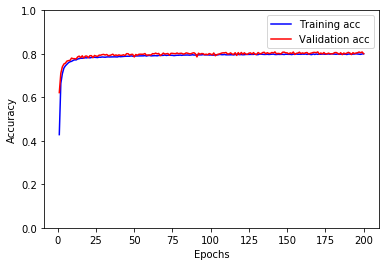


Neural Net: 8 units in each hidden layer;  8 hidden layers
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_18 (Flatten)         (None, 16)                0         
_________________________________________________________________
dense_118 (Dense)            (None, 8)                 136       
_________________________________________________________________
dense_119 (Dense)            (None, 8)                 72        
_________________________________________________________________
dense_120 (Dense)            (None, 8)                 72        
_________________________________________________________________
dense_121 (Dense)            (None, 8)                 72        
_________________________________________________________________
dense_122 (Dense)            (None, 8)                 72        
_________________________________________________________________
dense_123 (Dense

Epoch 77/200
 - 5s - loss: 0.6295 - acc: 0.7884 - val_loss: 0.6111 - val_acc: 0.7909
Epoch 78/200
 - 5s - loss: 0.6253 - acc: 0.7884 - val_loss: 0.6034 - val_acc: 0.7976
Epoch 79/200
 - 5s - loss: 0.6275 - acc: 0.7879 - val_loss: 0.6220 - val_acc: 0.7909
Epoch 80/200
 - 6s - loss: 0.6266 - acc: 0.7892 - val_loss: 0.6114 - val_acc: 0.7911
Epoch 81/200
 - 6s - loss: 0.6256 - acc: 0.7884 - val_loss: 0.6166 - val_acc: 0.7893
Epoch 82/200
 - 6s - loss: 0.6253 - acc: 0.7894 - val_loss: 0.6074 - val_acc: 0.7968
Epoch 83/200
 - 6s - loss: 0.6256 - acc: 0.7885 - val_loss: 0.6246 - val_acc: 0.7837
Epoch 84/200
 - 5s - loss: 0.6250 - acc: 0.7884 - val_loss: 0.6061 - val_acc: 0.7947
Epoch 85/200
 - 5s - loss: 0.6261 - acc: 0.7895 - val_loss: 0.5974 - val_acc: 0.7965
Epoch 86/200
 - 4s - loss: 0.6242 - acc: 0.7896 - val_loss: 0.6035 - val_acc: 0.7957
Epoch 87/200
 - 5s - loss: 0.6252 - acc: 0.7903 - val_loss: 0.6222 - val_acc: 0.7881
Epoch 88/200
 - 5s - loss: 0.6238 - acc: 0.7890 - val_loss: 0.610

Epoch 173/200
 - 5s - loss: 0.6058 - acc: 0.7963 - val_loss: 0.5824 - val_acc: 0.8035
Epoch 174/200
 - 4s - loss: 0.6069 - acc: 0.7968 - val_loss: 0.6338 - val_acc: 0.7926
Epoch 175/200
 - 5s - loss: 0.6073 - acc: 0.7968 - val_loss: 0.5927 - val_acc: 0.8011
Epoch 176/200
 - 5s - loss: 0.6057 - acc: 0.7968 - val_loss: 0.5929 - val_acc: 0.8017
Epoch 177/200
 - 5s - loss: 0.6078 - acc: 0.7957 - val_loss: 0.5819 - val_acc: 0.8048
Epoch 178/200
 - 4s - loss: 0.6066 - acc: 0.7967 - val_loss: 0.6157 - val_acc: 0.7959
Epoch 179/200
 - 5s - loss: 0.6051 - acc: 0.7966 - val_loss: 0.5852 - val_acc: 0.8002
Epoch 180/200
 - 4s - loss: 0.6071 - acc: 0.7963 - val_loss: 0.6427 - val_acc: 0.7837
Epoch 181/200
 - 4s - loss: 0.6079 - acc: 0.7953 - val_loss: 0.5901 - val_acc: 0.7991
Epoch 182/200
 - 5s - loss: 0.6061 - acc: 0.7963 - val_loss: 0.5828 - val_acc: 0.8026
Epoch 183/200
 - 5s - loss: 0.6054 - acc: 0.7957 - val_loss: 0.5775 - val_acc: 0.8076
Epoch 184/200
 - 5s - loss: 0.6067 - acc: 0.7979 - val

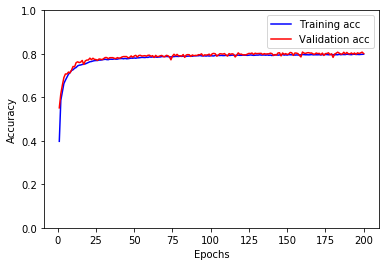


Neural Net: 8 units in each hidden layer;  16 hidden layers
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_19 (Flatten)         (None, 16)                0         
_________________________________________________________________
dense_127 (Dense)            (None, 8)                 136       
_________________________________________________________________
dense_128 (Dense)            (None, 8)                 72        
_________________________________________________________________
dense_129 (Dense)            (None, 8)                 72        
_________________________________________________________________
dense_130 (Dense)            (None, 8)                 72        
_________________________________________________________________
dense_131 (Dense)            (None, 8)                 72        
_________________________________________________________________
dense_132 (Dens

Epoch 65/200
 - 7s - loss: 0.8216 - acc: 0.7326 - val_loss: 0.8414 - val_acc: 0.7313
Epoch 66/200
 - 6s - loss: 0.8163 - acc: 0.7357 - val_loss: 0.7856 - val_acc: 0.7448
Epoch 67/200
 - 6s - loss: 0.8358 - acc: 0.7267 - val_loss: 0.7732 - val_acc: 0.7488
Epoch 68/200
 - 6s - loss: 0.8427 - acc: 0.7262 - val_loss: 0.8190 - val_acc: 0.7292
Epoch 69/200
 - 7s - loss: 0.8293 - acc: 0.7277 - val_loss: 0.8181 - val_acc: 0.7332
Epoch 70/200
 - 7s - loss: 0.8255 - acc: 0.7286 - val_loss: 0.7899 - val_acc: 0.7441
Epoch 71/200
 - 7s - loss: 0.8354 - acc: 0.7257 - val_loss: 0.8040 - val_acc: 0.7325
Epoch 72/200
 - 7s - loss: 0.8120 - acc: 0.7339 - val_loss: 0.7845 - val_acc: 0.7458
Epoch 73/200
 - 7s - loss: 0.8204 - acc: 0.7309 - val_loss: 0.7928 - val_acc: 0.7431
Epoch 74/200
 - 7s - loss: 0.8164 - acc: 0.7309 - val_loss: 0.8984 - val_acc: 0.7002
Epoch 75/200
 - 7s - loss: 0.8405 - acc: 0.7183 - val_loss: 0.7896 - val_acc: 0.7412
Epoch 76/200
 - 6s - loss: 0.8117 - acc: 0.7330 - val_loss: 0.787

Epoch 161/200
 - 7s - loss: 0.7146 - acc: 0.7660 - val_loss: 0.6937 - val_acc: 0.7762
Epoch 162/200
 - 7s - loss: 0.7190 - acc: 0.7664 - val_loss: 0.7020 - val_acc: 0.7783
Epoch 163/200
 - 7s - loss: 0.7106 - acc: 0.7685 - val_loss: 0.7004 - val_acc: 0.7747
Epoch 164/200
 - 7s - loss: 0.7144 - acc: 0.7661 - val_loss: 0.7744 - val_acc: 0.7450
Epoch 165/200
 - 7s - loss: 0.7209 - acc: 0.7636 - val_loss: 0.7135 - val_acc: 0.7720
Epoch 166/200
 - 6s - loss: 0.7096 - acc: 0.7680 - val_loss: 0.7026 - val_acc: 0.7742
Epoch 167/200
 - 6s - loss: 0.7109 - acc: 0.7676 - val_loss: 0.6916 - val_acc: 0.7753
Epoch 168/200
 - 6s - loss: 0.7121 - acc: 0.7665 - val_loss: 0.7008 - val_acc: 0.7752
Epoch 169/200
 - 7s - loss: 0.7328 - acc: 0.7587 - val_loss: 0.6937 - val_acc: 0.7756
Epoch 170/200
 - 7s - loss: 0.7070 - acc: 0.7689 - val_loss: 0.7138 - val_acc: 0.7659
Epoch 171/200
 - 6s - loss: 0.7215 - acc: 0.7636 - val_loss: 0.6976 - val_acc: 0.7766
Epoch 172/200
 - 6s - loss: 0.7063 - acc: 0.7704 - val

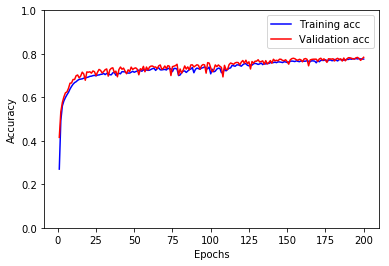


Neural Net: 16 units in each hidden layer;  1 hidden layers
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_20 (Flatten)         (None, 16)                0         
_________________________________________________________________
dense_144 (Dense)            (None, 16)                272       
_________________________________________________________________
dense_145 (Dense)            (None, 10)                170       
Total params: 442
Trainable params: 442
Non-trainable params: 0
_________________________________________________________________
Train on 48000 samples, validate on 12000 samples
Epoch 1/200
 - 6s - loss: 5.1091 - acc: 0.5280 - val_loss: 2.4127 - val_acc: 0.6800
Epoch 2/200
 - 4s - loss: 1.4591 - acc: 0.6976 - val_loss: 0.8192 - val_acc: 0.7342
Epoch 3/200
 - 3s - loss: 0.8265 - acc: 0.7318 - val_loss: 0.7573 - val_acc: 0.7548
Epoch 4/200
 - 3s - loss: 0.7749 - acc: 0.746

Epoch 88/200
 - 3s - loss: 0.5320 - acc: 0.8260 - val_loss: 0.5300 - val_acc: 0.8253
Epoch 89/200
 - 3s - loss: 0.5320 - acc: 0.8256 - val_loss: 0.5274 - val_acc: 0.8248
Epoch 90/200
 - 3s - loss: 0.5337 - acc: 0.8243 - val_loss: 0.5223 - val_acc: 0.8320
Epoch 91/200
 - 3s - loss: 0.5333 - acc: 0.8250 - val_loss: 0.5250 - val_acc: 0.8311
Epoch 92/200
 - 3s - loss: 0.5319 - acc: 0.8250 - val_loss: 0.5346 - val_acc: 0.8243
Epoch 93/200
 - 3s - loss: 0.5333 - acc: 0.8233 - val_loss: 0.5213 - val_acc: 0.8287
Epoch 94/200
 - 3s - loss: 0.5336 - acc: 0.8270 - val_loss: 0.5350 - val_acc: 0.8287
Epoch 95/200
 - 3s - loss: 0.5319 - acc: 0.8235 - val_loss: 0.5268 - val_acc: 0.8290
Epoch 96/200
 - 3s - loss: 0.5317 - acc: 0.8244 - val_loss: 0.5192 - val_acc: 0.8345
Epoch 97/200
 - 3s - loss: 0.5317 - acc: 0.8245 - val_loss: 0.5266 - val_acc: 0.8280
Epoch 98/200
 - 3s - loss: 0.5321 - acc: 0.8249 - val_loss: 0.5355 - val_acc: 0.8231
Epoch 99/200
 - 3s - loss: 0.5305 - acc: 0.8269 - val_loss: 0.521

Epoch 184/200
 - 3s - loss: 0.5275 - acc: 0.8255 - val_loss: 0.5117 - val_acc: 0.8374
Epoch 185/200
 - 3s - loss: 0.5261 - acc: 0.8270 - val_loss: 0.5373 - val_acc: 0.8223
Epoch 186/200
 - 3s - loss: 0.5272 - acc: 0.8264 - val_loss: 0.5420 - val_acc: 0.8285
Epoch 187/200
 - 3s - loss: 0.5281 - acc: 0.8250 - val_loss: 0.5313 - val_acc: 0.8324
Epoch 188/200
 - 3s - loss: 0.5270 - acc: 0.8271 - val_loss: 0.5154 - val_acc: 0.8313
Epoch 189/200
 - 3s - loss: 0.5290 - acc: 0.8264 - val_loss: 0.5143 - val_acc: 0.8352
Epoch 190/200
 - 3s - loss: 0.5274 - acc: 0.8273 - val_loss: 0.5116 - val_acc: 0.8347
Epoch 191/200
 - 3s - loss: 0.5288 - acc: 0.8267 - val_loss: 0.5190 - val_acc: 0.8316
Epoch 192/200
 - 3s - loss: 0.5284 - acc: 0.8248 - val_loss: 0.5339 - val_acc: 0.8328
Epoch 193/200
 - 3s - loss: 0.5271 - acc: 0.8275 - val_loss: 0.5303 - val_acc: 0.8317
Epoch 194/200
 - 3s - loss: 0.5259 - acc: 0.8260 - val_loss: 0.5368 - val_acc: 0.8227
Epoch 195/200
 - 3s - loss: 0.5270 - acc: 0.8267 - val

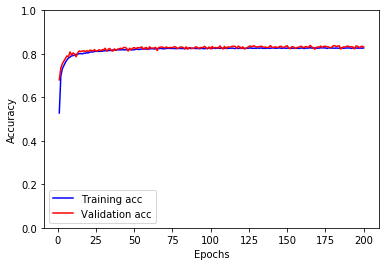


Neural Net: 16 units in each hidden layer;  2 hidden layers
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_21 (Flatten)         (None, 16)                0         
_________________________________________________________________
dense_146 (Dense)            (None, 16)                272       
_________________________________________________________________
dense_147 (Dense)            (None, 16)                272       
_________________________________________________________________
dense_148 (Dense)            (None, 10)                170       
Total params: 714
Trainable params: 714
Non-trainable params: 0
_________________________________________________________________
Train on 48000 samples, validate on 12000 samples
Epoch 1/200
 - 6s - loss: 2.1489 - acc: 0.5838 - val_loss: 0.8690 - val_acc: 0.7215
Epoch 2/200
 - 3s - loss: 0.8477 - acc: 0.7241 - val_loss: 0.7700 - val_acc: 0.74

 - 3s - loss: 0.5076 - acc: 0.8302 - val_loss: 0.4966 - val_acc: 0.8388
Epoch 87/200
 - 3s - loss: 0.5061 - acc: 0.8314 - val_loss: 0.5061 - val_acc: 0.8330
Epoch 88/200
 - 3s - loss: 0.5072 - acc: 0.8323 - val_loss: 0.5044 - val_acc: 0.8323
Epoch 89/200
 - 3s - loss: 0.5071 - acc: 0.8315 - val_loss: 0.5012 - val_acc: 0.8344
Epoch 90/200
 - 3s - loss: 0.5050 - acc: 0.8324 - val_loss: 0.5010 - val_acc: 0.8337
Epoch 91/200
 - 3s - loss: 0.5076 - acc: 0.8292 - val_loss: 0.5055 - val_acc: 0.8303
Epoch 92/200
 - 3s - loss: 0.5051 - acc: 0.8314 - val_loss: 0.4986 - val_acc: 0.8344
Epoch 93/200
 - 3s - loss: 0.5060 - acc: 0.8298 - val_loss: 0.4946 - val_acc: 0.8347
Epoch 94/200
 - 3s - loss: 0.5061 - acc: 0.8312 - val_loss: 0.5050 - val_acc: 0.8325
Epoch 95/200
 - 3s - loss: 0.5062 - acc: 0.8316 - val_loss: 0.4994 - val_acc: 0.8354
Epoch 96/200
 - 3s - loss: 0.5055 - acc: 0.8302 - val_loss: 0.5007 - val_acc: 0.8311
Epoch 97/200
 - 3s - loss: 0.5030 - acc: 0.8321 - val_loss: 0.4989 - val_acc: 

Epoch 182/200
 - 3s - loss: 0.4855 - acc: 0.8369 - val_loss: 0.4792 - val_acc: 0.8390
Epoch 183/200
 - 3s - loss: 0.4863 - acc: 0.8367 - val_loss: 0.4816 - val_acc: 0.8393
Epoch 184/200
 - 3s - loss: 0.4858 - acc: 0.8378 - val_loss: 0.4811 - val_acc: 0.8393
Epoch 185/200
 - 3s - loss: 0.4857 - acc: 0.8378 - val_loss: 0.4675 - val_acc: 0.8419
Epoch 186/200
 - 3s - loss: 0.4849 - acc: 0.8365 - val_loss: 0.4720 - val_acc: 0.8449
Epoch 187/200
 - 3s - loss: 0.4847 - acc: 0.8376 - val_loss: 0.4694 - val_acc: 0.8430
Epoch 188/200
 - 3s - loss: 0.4845 - acc: 0.8372 - val_loss: 0.4670 - val_acc: 0.8426
Epoch 189/200
 - 3s - loss: 0.4861 - acc: 0.8365 - val_loss: 0.4644 - val_acc: 0.8424
Epoch 190/200
 - 3s - loss: 0.4840 - acc: 0.8361 - val_loss: 0.4791 - val_acc: 0.8394
Epoch 191/200
 - 3s - loss: 0.4838 - acc: 0.8374 - val_loss: 0.4835 - val_acc: 0.8379
Epoch 192/200
 - 3s - loss: 0.4843 - acc: 0.8371 - val_loss: 0.4693 - val_acc: 0.8450
Epoch 193/200
 - 3s - loss: 0.4839 - acc: 0.8373 - val

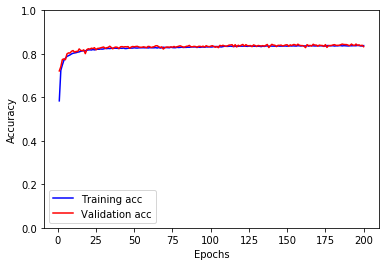


Neural Net: 16 units in each hidden layer;  4 hidden layers
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_22 (Flatten)         (None, 16)                0         
_________________________________________________________________
dense_149 (Dense)            (None, 16)                272       
_________________________________________________________________
dense_150 (Dense)            (None, 16)                272       
_________________________________________________________________
dense_151 (Dense)            (None, 16)                272       
_________________________________________________________________
dense_152 (Dense)            (None, 16)                272       
_________________________________________________________________
dense_153 (Dense)            (None, 10)                170       
Total params: 1,258
Trainable params: 1,258
Non-trainable params: 0
_____________

Epoch 83/200
 - 4s - loss: 0.4730 - acc: 0.8400 - val_loss: 0.4800 - val_acc: 0.8407
Epoch 84/200
 - 4s - loss: 0.4734 - acc: 0.8406 - val_loss: 0.4827 - val_acc: 0.8404
Epoch 85/200
 - 4s - loss: 0.4705 - acc: 0.8404 - val_loss: 0.4802 - val_acc: 0.8373
Epoch 86/200
 - 4s - loss: 0.4709 - acc: 0.8409 - val_loss: 0.4725 - val_acc: 0.8424
Epoch 87/200
 - 4s - loss: 0.4713 - acc: 0.8412 - val_loss: 0.4756 - val_acc: 0.8402
Epoch 88/200
 - 4s - loss: 0.4703 - acc: 0.8400 - val_loss: 0.5004 - val_acc: 0.8301
Epoch 89/200
 - 4s - loss: 0.4712 - acc: 0.8405 - val_loss: 0.4854 - val_acc: 0.8377
Epoch 90/200
 - 4s - loss: 0.4696 - acc: 0.8407 - val_loss: 0.4763 - val_acc: 0.8410
Epoch 91/200
 - 4s - loss: 0.4716 - acc: 0.8402 - val_loss: 0.4863 - val_acc: 0.8382
Epoch 92/200
 - 4s - loss: 0.4685 - acc: 0.8418 - val_loss: 0.4685 - val_acc: 0.8456
Epoch 93/200
 - 4s - loss: 0.4690 - acc: 0.8406 - val_loss: 0.4885 - val_acc: 0.8375
Epoch 94/200
 - 4s - loss: 0.4670 - acc: 0.8415 - val_loss: 0.499

Epoch 179/200
 - 4s - loss: 0.4542 - acc: 0.8474 - val_loss: 0.4619 - val_acc: 0.8505
Epoch 180/200
 - 4s - loss: 0.4526 - acc: 0.8476 - val_loss: 0.4594 - val_acc: 0.8466
Epoch 181/200
 - 4s - loss: 0.4527 - acc: 0.8457 - val_loss: 0.5004 - val_acc: 0.8329
Epoch 182/200
 - 4s - loss: 0.4538 - acc: 0.8441 - val_loss: 0.4709 - val_acc: 0.8462
Epoch 183/200
 - 4s - loss: 0.4543 - acc: 0.8459 - val_loss: 0.4734 - val_acc: 0.8448
Epoch 184/200
 - 4s - loss: 0.4519 - acc: 0.8456 - val_loss: 0.4725 - val_acc: 0.8437
Epoch 185/200
 - 4s - loss: 0.4518 - acc: 0.8464 - val_loss: 0.4650 - val_acc: 0.8444
Epoch 186/200
 - 4s - loss: 0.4534 - acc: 0.8466 - val_loss: 0.4659 - val_acc: 0.8475
Epoch 187/200
 - 4s - loss: 0.4543 - acc: 0.8455 - val_loss: 0.4626 - val_acc: 0.8466
Epoch 188/200
 - 4s - loss: 0.4539 - acc: 0.8449 - val_loss: 0.4655 - val_acc: 0.8467
Epoch 189/200
 - 4s - loss: 0.4525 - acc: 0.8458 - val_loss: 0.4781 - val_acc: 0.8412
Epoch 190/200
 - 4s - loss: 0.4513 - acc: 0.8453 - val

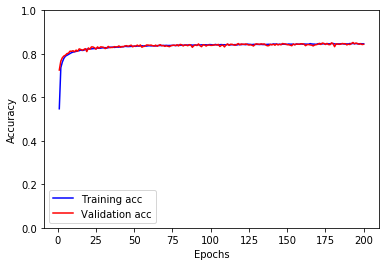


Neural Net: 16 units in each hidden layer;  8 hidden layers
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_23 (Flatten)         (None, 16)                0         
_________________________________________________________________
dense_154 (Dense)            (None, 16)                272       
_________________________________________________________________
dense_155 (Dense)            (None, 16)                272       
_________________________________________________________________
dense_156 (Dense)            (None, 16)                272       
_________________________________________________________________
dense_157 (Dense)            (None, 16)                272       
_________________________________________________________________
dense_158 (Dense)            (None, 16)                272       
_________________________________________________________________
dense_159 (Dens

Epoch 77/200
 - 5s - loss: 0.4505 - acc: 0.8453 - val_loss: 0.4602 - val_acc: 0.8482
Epoch 78/200
 - 5s - loss: 0.4479 - acc: 0.8450 - val_loss: 0.4485 - val_acc: 0.8506
Epoch 79/200
 - 5s - loss: 0.4482 - acc: 0.8465 - val_loss: 0.4794 - val_acc: 0.8415
Epoch 80/200
 - 5s - loss: 0.4479 - acc: 0.8466 - val_loss: 0.4541 - val_acc: 0.8498
Epoch 81/200
 - 5s - loss: 0.4459 - acc: 0.8481 - val_loss: 0.4576 - val_acc: 0.8442
Epoch 82/200
 - 5s - loss: 0.4499 - acc: 0.8465 - val_loss: 0.4637 - val_acc: 0.8453
Epoch 83/200
 - 5s - loss: 0.4465 - acc: 0.8471 - val_loss: 0.4582 - val_acc: 0.8477
Epoch 84/200
 - 5s - loss: 0.4429 - acc: 0.8486 - val_loss: 0.4734 - val_acc: 0.8424
Epoch 85/200
 - 5s - loss: 0.4464 - acc: 0.8482 - val_loss: 0.4784 - val_acc: 0.8396
Epoch 86/200
 - 5s - loss: 0.4479 - acc: 0.8466 - val_loss: 0.4506 - val_acc: 0.8508
Epoch 87/200
 - 5s - loss: 0.4449 - acc: 0.8483 - val_loss: 0.4653 - val_acc: 0.8457
Epoch 88/200
 - 5s - loss: 0.4446 - acc: 0.8477 - val_loss: 0.451

Epoch 173/200
 - 5s - loss: 0.4259 - acc: 0.8529 - val_loss: 0.4602 - val_acc: 0.8444
Epoch 174/200
 - 5s - loss: 0.4241 - acc: 0.8555 - val_loss: 0.4662 - val_acc: 0.8448
Epoch 175/200
 - 5s - loss: 0.4258 - acc: 0.8547 - val_loss: 0.4734 - val_acc: 0.8460
Epoch 176/200
 - 5s - loss: 0.4266 - acc: 0.8530 - val_loss: 0.4697 - val_acc: 0.8441
Epoch 177/200
 - 5s - loss: 0.4261 - acc: 0.8549 - val_loss: 0.4516 - val_acc: 0.8491
Epoch 178/200
 - 5s - loss: 0.4218 - acc: 0.8548 - val_loss: 0.4676 - val_acc: 0.8429
Epoch 179/200
 - 5s - loss: 0.4248 - acc: 0.8543 - val_loss: 0.4710 - val_acc: 0.8379
Epoch 180/200
 - 5s - loss: 0.4244 - acc: 0.8549 - val_loss: 0.4715 - val_acc: 0.8424
Epoch 181/200
 - 5s - loss: 0.4243 - acc: 0.8538 - val_loss: 0.4607 - val_acc: 0.8471
Epoch 182/200
 - 5s - loss: 0.4251 - acc: 0.8542 - val_loss: 0.4619 - val_acc: 0.8452
Epoch 183/200
 - 5s - loss: 0.4253 - acc: 0.8552 - val_loss: 0.4562 - val_acc: 0.8465
Epoch 184/200
 - 5s - loss: 0.4226 - acc: 0.8559 - val

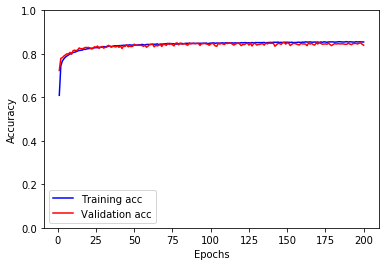


Neural Net: 16 units in each hidden layer;  16 hidden layers
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_24 (Flatten)         (None, 16)                0         
_________________________________________________________________
dense_163 (Dense)            (None, 16)                272       
_________________________________________________________________
dense_164 (Dense)            (None, 16)                272       
_________________________________________________________________
dense_165 (Dense)            (None, 16)                272       
_________________________________________________________________
dense_166 (Dense)            (None, 16)                272       
_________________________________________________________________
dense_167 (Dense)            (None, 16)                272       
_________________________________________________________________
dense_168 (Den

Epoch 65/200
 - 7s - loss: 0.4903 - acc: 0.8379 - val_loss: 0.5188 - val_acc: 0.8303
Epoch 66/200
 - 7s - loss: 0.4908 - acc: 0.8373 - val_loss: 0.5127 - val_acc: 0.8345
Epoch 67/200
 - 8s - loss: 0.4912 - acc: 0.8385 - val_loss: 0.4994 - val_acc: 0.8385
Epoch 68/200
 - 8s - loss: 0.4864 - acc: 0.8399 - val_loss: 0.4859 - val_acc: 0.8397
Epoch 69/200
 - 8s - loss: 0.4888 - acc: 0.8396 - val_loss: 0.5049 - val_acc: 0.8382
Epoch 70/200
 - 7s - loss: 0.4896 - acc: 0.8389 - val_loss: 0.5160 - val_acc: 0.8337
Epoch 71/200
 - 8s - loss: 0.4867 - acc: 0.8392 - val_loss: 0.4912 - val_acc: 0.8407
Epoch 72/200
 - 7s - loss: 0.4878 - acc: 0.8374 - val_loss: 0.5144 - val_acc: 0.8327
Epoch 73/200
 - 10s - loss: 0.4867 - acc: 0.8394 - val_loss: 0.5052 - val_acc: 0.8368
Epoch 74/200
 - 7s - loss: 0.4849 - acc: 0.8378 - val_loss: 0.5066 - val_acc: 0.8377
Epoch 75/200
 - 8s - loss: 0.4852 - acc: 0.8392 - val_loss: 0.5009 - val_acc: 0.8374
Epoch 76/200
 - 7s - loss: 0.4885 - acc: 0.8370 - val_loss: 0.49

Epoch 161/200
 - 7s - loss: 0.4590 - acc: 0.8455 - val_loss: 0.4743 - val_acc: 0.8466
Epoch 162/200
 - 7s - loss: 0.4651 - acc: 0.8432 - val_loss: 0.4940 - val_acc: 0.8399
Epoch 163/200
 - 7s - loss: 0.4593 - acc: 0.8437 - val_loss: 0.4698 - val_acc: 0.8468
Epoch 164/200
 - 7s - loss: 0.4557 - acc: 0.8452 - val_loss: 0.4737 - val_acc: 0.8460
Epoch 165/200
 - 8s - loss: 0.4613 - acc: 0.8453 - val_loss: 0.4772 - val_acc: 0.8442
Epoch 166/200
 - 8s - loss: 0.4580 - acc: 0.8457 - val_loss: 0.4880 - val_acc: 0.8380
Epoch 167/200
 - 7s - loss: 0.4598 - acc: 0.8450 - val_loss: 0.4753 - val_acc: 0.8442
Epoch 168/200
 - 8s - loss: 0.4619 - acc: 0.8452 - val_loss: 0.4773 - val_acc: 0.8458
Epoch 169/200
 - 7s - loss: 0.4582 - acc: 0.8463 - val_loss: 0.5014 - val_acc: 0.8377
Epoch 170/200
 - 7s - loss: 0.4592 - acc: 0.8467 - val_loss: 0.4982 - val_acc: 0.8372
Epoch 171/200
 - 7s - loss: 0.4598 - acc: 0.8454 - val_loss: 0.4856 - val_acc: 0.8427
Epoch 172/200
 - 7s - loss: 0.4562 - acc: 0.8473 - val

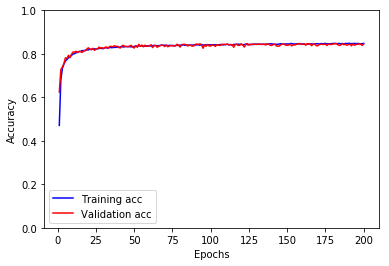


Neural Net: 26 units in each hidden layer;  1 hidden layers
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_25 (Flatten)         (None, 16)                0         
_________________________________________________________________
dense_180 (Dense)            (None, 26)                442       
_________________________________________________________________
dense_181 (Dense)            (None, 10)                270       
Total params: 712
Trainable params: 712
Non-trainable params: 0
_________________________________________________________________
Train on 48000 samples, validate on 12000 samples
Epoch 1/200
 - 6s - loss: 5.2867 - acc: 0.5054 - val_loss: 0.9756 - val_acc: 0.7299
Epoch 2/200
 - 4s - loss: 0.8732 - acc: 0.7332 - val_loss: 0.7525 - val_acc: 0.7618
Epoch 3/200
 - 4s - loss: 0.7441 - acc: 0.7616 - val_loss: 0.6917 - val_acc: 0.7816
Epoch 4/200
 - 4s - loss: 0.6895 - acc: 0.776

Epoch 88/200
 - 3s - loss: 0.4702 - acc: 0.8427 - val_loss: 0.4928 - val_acc: 0.8404
Epoch 89/200
 - 3s - loss: 0.4722 - acc: 0.8428 - val_loss: 0.4722 - val_acc: 0.8504
Epoch 90/200
 - 3s - loss: 0.4709 - acc: 0.8421 - val_loss: 0.4787 - val_acc: 0.8466
Epoch 91/200
 - 5s - loss: 0.4714 - acc: 0.8439 - val_loss: 0.4822 - val_acc: 0.8447
Epoch 92/200
 - 4s - loss: 0.4738 - acc: 0.8421 - val_loss: 0.4643 - val_acc: 0.8497
Epoch 93/200
 - 4s - loss: 0.4701 - acc: 0.8424 - val_loss: 0.4624 - val_acc: 0.8539
Epoch 94/200
 - 4s - loss: 0.4715 - acc: 0.8429 - val_loss: 0.4791 - val_acc: 0.8469
Epoch 95/200
 - 4s - loss: 0.4697 - acc: 0.8434 - val_loss: 0.4733 - val_acc: 0.8466
Epoch 96/200
 - 4s - loss: 0.4723 - acc: 0.8428 - val_loss: 0.4880 - val_acc: 0.8444
Epoch 97/200
 - 4s - loss: 0.4712 - acc: 0.8425 - val_loss: 0.4656 - val_acc: 0.8502
Epoch 98/200
 - 3s - loss: 0.4721 - acc: 0.8404 - val_loss: 0.4701 - val_acc: 0.8471
Epoch 99/200
 - 3s - loss: 0.4710 - acc: 0.8420 - val_loss: 0.462

Epoch 184/200
 - 3s - loss: 0.4552 - acc: 0.8480 - val_loss: 0.4625 - val_acc: 0.8505
Epoch 185/200
 - 3s - loss: 0.4561 - acc: 0.8480 - val_loss: 0.4698 - val_acc: 0.8462
Epoch 186/200
 - 3s - loss: 0.4568 - acc: 0.8476 - val_loss: 0.4700 - val_acc: 0.8455
Epoch 187/200
 - 3s - loss: 0.4568 - acc: 0.8479 - val_loss: 0.4586 - val_acc: 0.8483
Epoch 188/200
 - 3s - loss: 0.4542 - acc: 0.8484 - val_loss: 0.4460 - val_acc: 0.8558
Epoch 189/200
 - 3s - loss: 0.4558 - acc: 0.8473 - val_loss: 0.4373 - val_acc: 0.8570
Epoch 190/200
 - 3s - loss: 0.4555 - acc: 0.8486 - val_loss: 0.4519 - val_acc: 0.8536
Epoch 191/200
 - 3s - loss: 0.4527 - acc: 0.8500 - val_loss: 0.4574 - val_acc: 0.8488
Epoch 192/200
 - 4s - loss: 0.4558 - acc: 0.8471 - val_loss: 0.4554 - val_acc: 0.8511
Epoch 193/200
 - 4s - loss: 0.4557 - acc: 0.8475 - val_loss: 0.4445 - val_acc: 0.8579
Epoch 194/200
 - 4s - loss: 0.4547 - acc: 0.8489 - val_loss: 0.4394 - val_acc: 0.8568
Epoch 195/200
 - 3s - loss: 0.4543 - acc: 0.8490 - val

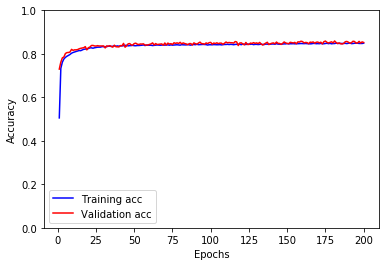


Neural Net: 26 units in each hidden layer;  2 hidden layers
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_26 (Flatten)         (None, 16)                0         
_________________________________________________________________
dense_182 (Dense)            (None, 26)                442       
_________________________________________________________________
dense_183 (Dense)            (None, 26)                702       
_________________________________________________________________
dense_184 (Dense)            (None, 10)                270       
Total params: 1,414
Trainable params: 1,414
Non-trainable params: 0
_________________________________________________________________
Train on 48000 samples, validate on 12000 samples
Epoch 1/200
 - 6s - loss: 1.2282 - acc: 0.6675 - val_loss: 0.7254 - val_acc: 0.7619
Epoch 2/200
 - 4s - loss: 0.6782 - acc: 0.7793 - val_loss: 0.6012 - val_acc: 

 - 4s - loss: 0.4117 - acc: 0.8601 - val_loss: 0.4344 - val_acc: 0.8548
Epoch 87/200
 - 4s - loss: 0.4125 - acc: 0.8606 - val_loss: 0.4304 - val_acc: 0.8556
Epoch 88/200
 - 4s - loss: 0.4120 - acc: 0.8603 - val_loss: 0.4548 - val_acc: 0.8472
Epoch 89/200
 - 4s - loss: 0.4129 - acc: 0.8606 - val_loss: 0.4207 - val_acc: 0.8615
Epoch 90/200
 - 4s - loss: 0.4100 - acc: 0.8609 - val_loss: 0.4360 - val_acc: 0.8568
Epoch 91/200
 - 4s - loss: 0.4111 - acc: 0.8595 - val_loss: 0.4268 - val_acc: 0.8571
Epoch 92/200
 - 4s - loss: 0.4105 - acc: 0.8605 - val_loss: 0.4289 - val_acc: 0.8556
Epoch 93/200
 - 4s - loss: 0.4109 - acc: 0.8609 - val_loss: 0.4219 - val_acc: 0.8558
Epoch 94/200
 - 5s - loss: 0.4101 - acc: 0.8605 - val_loss: 0.4322 - val_acc: 0.8542
Epoch 95/200
 - 4s - loss: 0.4096 - acc: 0.8601 - val_loss: 0.4262 - val_acc: 0.8554
Epoch 96/200
 - 4s - loss: 0.4086 - acc: 0.8618 - val_loss: 0.4358 - val_acc: 0.8518
Epoch 97/200
 - 4s - loss: 0.4089 - acc: 0.8615 - val_loss: 0.4244 - val_acc: 

Epoch 182/200
 - 3s - loss: 0.3963 - acc: 0.8641 - val_loss: 0.4287 - val_acc: 0.8574
Epoch 183/200
 - 4s - loss: 0.3983 - acc: 0.8640 - val_loss: 0.4292 - val_acc: 0.8552
Epoch 184/200
 - 4s - loss: 0.3967 - acc: 0.8652 - val_loss: 0.4239 - val_acc: 0.8603
Epoch 185/200
 - 4s - loss: 0.3957 - acc: 0.8638 - val_loss: 0.4200 - val_acc: 0.8605
Epoch 186/200
 - 4s - loss: 0.3972 - acc: 0.8639 - val_loss: 0.4262 - val_acc: 0.8581
Epoch 187/200
 - 4s - loss: 0.3968 - acc: 0.8637 - val_loss: 0.4211 - val_acc: 0.8591
Epoch 188/200
 - 4s - loss: 0.3956 - acc: 0.8661 - val_loss: 0.4170 - val_acc: 0.8589
Epoch 189/200
 - 4s - loss: 0.3979 - acc: 0.8639 - val_loss: 0.4235 - val_acc: 0.8590
Epoch 190/200
 - 4s - loss: 0.3968 - acc: 0.8641 - val_loss: 0.4344 - val_acc: 0.8557
Epoch 191/200
 - 4s - loss: 0.3958 - acc: 0.8640 - val_loss: 0.4172 - val_acc: 0.8613
Epoch 192/200
 - 4s - loss: 0.3968 - acc: 0.8633 - val_loss: 0.4384 - val_acc: 0.8503
Epoch 193/200
 - 4s - loss: 0.3967 - acc: 0.8634 - val

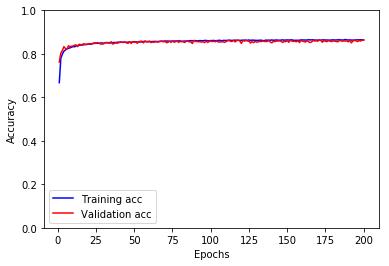


Neural Net: 26 units in each hidden layer;  4 hidden layers
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_27 (Flatten)         (None, 16)                0         
_________________________________________________________________
dense_185 (Dense)            (None, 26)                442       
_________________________________________________________________
dense_186 (Dense)            (None, 26)                702       
_________________________________________________________________
dense_187 (Dense)            (None, 26)                702       
_________________________________________________________________
dense_188 (Dense)            (None, 26)                702       
_________________________________________________________________
dense_189 (Dense)            (None, 10)                270       
Total params: 2,818
Trainable params: 2,818
Non-trainable params: 0
_____________

Epoch 83/200
 - 4s - loss: 0.3841 - acc: 0.8666 - val_loss: 0.4225 - val_acc: 0.8582
Epoch 84/200
 - 4s - loss: 0.3798 - acc: 0.8672 - val_loss: 0.4309 - val_acc: 0.8592
Epoch 85/200
 - 4s - loss: 0.3818 - acc: 0.8676 - val_loss: 0.4318 - val_acc: 0.8602
Epoch 86/200
 - 4s - loss: 0.3815 - acc: 0.8673 - val_loss: 0.4235 - val_acc: 0.8608
Epoch 87/200
 - 4s - loss: 0.3843 - acc: 0.8667 - val_loss: 0.4277 - val_acc: 0.8588
Epoch 88/200
 - 4s - loss: 0.3820 - acc: 0.8673 - val_loss: 0.4190 - val_acc: 0.8599
Epoch 89/200
 - 4s - loss: 0.3797 - acc: 0.8687 - val_loss: 0.4337 - val_acc: 0.8572
Epoch 90/200
 - 4s - loss: 0.3793 - acc: 0.8687 - val_loss: 0.4261 - val_acc: 0.8609
Epoch 91/200
 - 4s - loss: 0.3804 - acc: 0.8701 - val_loss: 0.4403 - val_acc: 0.8569
Epoch 92/200
 - 4s - loss: 0.3805 - acc: 0.8677 - val_loss: 0.4399 - val_acc: 0.8563
Epoch 93/200
 - 4s - loss: 0.3806 - acc: 0.8676 - val_loss: 0.4424 - val_acc: 0.8544
Epoch 94/200
 - 4s - loss: 0.3803 - acc: 0.8681 - val_loss: 0.436

Epoch 179/200
 - 4s - loss: 0.3654 - acc: 0.8744 - val_loss: 0.4286 - val_acc: 0.8596
Epoch 180/200
 - 4s - loss: 0.3710 - acc: 0.8718 - val_loss: 0.4256 - val_acc: 0.8622
Epoch 181/200
 - 4s - loss: 0.3637 - acc: 0.8744 - val_loss: 0.4422 - val_acc: 0.8575
Epoch 182/200
 - 4s - loss: 0.3649 - acc: 0.8743 - val_loss: 0.4242 - val_acc: 0.8637
Epoch 183/200
 - 4s - loss: 0.3683 - acc: 0.8722 - val_loss: 0.4387 - val_acc: 0.8554
Epoch 184/200
 - 4s - loss: 0.3656 - acc: 0.8740 - val_loss: 0.4281 - val_acc: 0.8619
Epoch 185/200
 - 4s - loss: 0.3645 - acc: 0.8739 - val_loss: 0.4275 - val_acc: 0.8644
Epoch 186/200
 - 4s - loss: 0.3682 - acc: 0.8715 - val_loss: 0.4456 - val_acc: 0.8577
Epoch 187/200
 - 4s - loss: 0.3657 - acc: 0.8743 - val_loss: 0.4287 - val_acc: 0.8602
Epoch 188/200
 - 4s - loss: 0.3617 - acc: 0.8750 - val_loss: 0.4255 - val_acc: 0.8619
Epoch 189/200
 - 4s - loss: 0.3657 - acc: 0.8746 - val_loss: 0.4188 - val_acc: 0.8637
Epoch 190/200
 - 4s - loss: 0.3629 - acc: 0.8749 - val

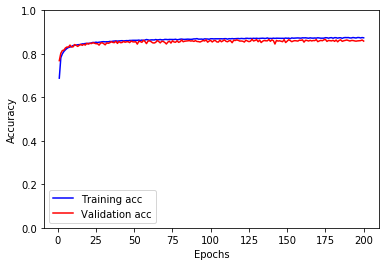


Neural Net: 26 units in each hidden layer;  8 hidden layers
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_28 (Flatten)         (None, 16)                0         
_________________________________________________________________
dense_190 (Dense)            (None, 26)                442       
_________________________________________________________________
dense_191 (Dense)            (None, 26)                702       
_________________________________________________________________
dense_192 (Dense)            (None, 26)                702       
_________________________________________________________________
dense_193 (Dense)            (None, 26)                702       
_________________________________________________________________
dense_194 (Dense)            (None, 26)                702       
_________________________________________________________________
dense_195 (Dens

Epoch 77/200
 - 5s - loss: 0.3849 - acc: 0.8666 - val_loss: 0.4551 - val_acc: 0.8534
Epoch 78/200
 - 5s - loss: 0.3864 - acc: 0.8665 - val_loss: 0.4378 - val_acc: 0.8588
Epoch 79/200
 - 5s - loss: 0.3866 - acc: 0.8653 - val_loss: 0.4360 - val_acc: 0.8607
Epoch 80/200
 - 5s - loss: 0.3841 - acc: 0.8674 - val_loss: 0.4301 - val_acc: 0.8607
Epoch 81/200
 - 5s - loss: 0.3835 - acc: 0.8650 - val_loss: 0.4325 - val_acc: 0.8569
Epoch 82/200
 - 5s - loss: 0.3821 - acc: 0.8691 - val_loss: 0.4387 - val_acc: 0.8560
Epoch 83/200
 - 5s - loss: 0.3832 - acc: 0.8673 - val_loss: 0.4419 - val_acc: 0.8562
Epoch 84/200
 - 5s - loss: 0.3829 - acc: 0.8675 - val_loss: 0.4514 - val_acc: 0.8522
Epoch 85/200
 - 5s - loss: 0.3824 - acc: 0.8684 - val_loss: 0.4256 - val_acc: 0.8600
Epoch 86/200
 - 5s - loss: 0.3826 - acc: 0.8670 - val_loss: 0.4334 - val_acc: 0.8601
Epoch 87/200
 - 5s - loss: 0.3864 - acc: 0.8658 - val_loss: 0.4323 - val_acc: 0.8596
Epoch 88/200
 - 5s - loss: 0.3819 - acc: 0.8673 - val_loss: 0.432

Epoch 173/200
 - 6s - loss: 0.3660 - acc: 0.8727 - val_loss: 0.4413 - val_acc: 0.8571
Epoch 174/200
 - 5s - loss: 0.3601 - acc: 0.8749 - val_loss: 0.4633 - val_acc: 0.8499
Epoch 175/200
 - 5s - loss: 0.3604 - acc: 0.8746 - val_loss: 0.4723 - val_acc: 0.8524
Epoch 176/200
 - 5s - loss: 0.3614 - acc: 0.8744 - val_loss: 0.4509 - val_acc: 0.8574
Epoch 177/200
 - 6s - loss: 0.3664 - acc: 0.8741 - val_loss: 0.4559 - val_acc: 0.8570
Epoch 178/200
 - 5s - loss: 0.3629 - acc: 0.8727 - val_loss: 0.4795 - val_acc: 0.8449
Epoch 179/200
 - 5s - loss: 0.3602 - acc: 0.8754 - val_loss: 0.4411 - val_acc: 0.8564
Epoch 180/200
 - 6s - loss: 0.3592 - acc: 0.8739 - val_loss: 0.4438 - val_acc: 0.8579
Epoch 181/200
 - 6s - loss: 0.3617 - acc: 0.8749 - val_loss: 0.4505 - val_acc: 0.8568
Epoch 182/200
 - 6s - loss: 0.3592 - acc: 0.8762 - val_loss: 0.4481 - val_acc: 0.8582
Epoch 183/200
 - 5s - loss: 0.3633 - acc: 0.8734 - val_loss: 0.4495 - val_acc: 0.8586
Epoch 184/200
 - 5s - loss: 0.3574 - acc: 0.8765 - val

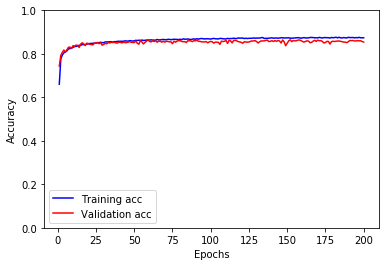


Neural Net: 26 units in each hidden layer;  16 hidden layers
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_29 (Flatten)         (None, 16)                0         
_________________________________________________________________
dense_199 (Dense)            (None, 26)                442       
_________________________________________________________________
dense_200 (Dense)            (None, 26)                702       
_________________________________________________________________
dense_201 (Dense)            (None, 26)                702       
_________________________________________________________________
dense_202 (Dense)            (None, 26)                702       
_________________________________________________________________
dense_203 (Dense)            (None, 26)                702       
_________________________________________________________________
dense_204 (Den

Epoch 65/200
 - 7s - loss: 0.4306 - acc: 0.8574 - val_loss: 0.4870 - val_acc: 0.8508
Epoch 66/200
 - 8s - loss: 0.4331 - acc: 0.8571 - val_loss: 0.4702 - val_acc: 0.8515
Epoch 67/200
 - 7s - loss: 0.4275 - acc: 0.8598 - val_loss: 0.4637 - val_acc: 0.8545
Epoch 68/200
 - 7s - loss: 0.4272 - acc: 0.8598 - val_loss: 0.5030 - val_acc: 0.8400
Epoch 69/200
 - 7s - loss: 0.4268 - acc: 0.8600 - val_loss: 0.4634 - val_acc: 0.8548
Epoch 70/200
 - 7s - loss: 0.4275 - acc: 0.8604 - val_loss: 0.4749 - val_acc: 0.8488
Epoch 71/200
 - 7s - loss: 0.4216 - acc: 0.8597 - val_loss: 0.4632 - val_acc: 0.8510
Epoch 72/200
 - 7s - loss: 0.4282 - acc: 0.8577 - val_loss: 0.4644 - val_acc: 0.8561
Epoch 73/200
 - 7s - loss: 0.4271 - acc: 0.8593 - val_loss: 0.5018 - val_acc: 0.8436
Epoch 74/200
 - 7s - loss: 0.4227 - acc: 0.8610 - val_loss: 0.4642 - val_acc: 0.8554
Epoch 75/200
 - 7s - loss: 0.4218 - acc: 0.8598 - val_loss: 0.4754 - val_acc: 0.8502
Epoch 76/200
 - 7s - loss: 0.4253 - acc: 0.8597 - val_loss: 0.462

Epoch 161/200
 - 8s - loss: 0.3906 - acc: 0.8697 - val_loss: 0.4510 - val_acc: 0.8632
Epoch 162/200
 - 8s - loss: 0.3942 - acc: 0.8691 - val_loss: 0.4599 - val_acc: 0.8571
Epoch 163/200
 - 7s - loss: 0.3848 - acc: 0.8698 - val_loss: 0.4582 - val_acc: 0.8578
Epoch 164/200
 - 8s - loss: 0.3850 - acc: 0.8721 - val_loss: 0.4599 - val_acc: 0.8584
Epoch 165/200
 - 7s - loss: 0.3929 - acc: 0.8705 - val_loss: 0.4632 - val_acc: 0.8586
Epoch 166/200
 - 8s - loss: 0.3922 - acc: 0.8710 - val_loss: 0.4695 - val_acc: 0.8543
Epoch 167/200
 - 7s - loss: 0.3883 - acc: 0.8708 - val_loss: 0.4446 - val_acc: 0.8619
Epoch 168/200
 - 8s - loss: 0.3865 - acc: 0.8720 - val_loss: 0.4546 - val_acc: 0.8571
Epoch 169/200
 - 8s - loss: 0.3855 - acc: 0.8713 - val_loss: 0.4551 - val_acc: 0.8577
Epoch 170/200
 - 8s - loss: 0.3869 - acc: 0.8701 - val_loss: 0.4598 - val_acc: 0.8557
Epoch 171/200
 - 8s - loss: 0.3851 - acc: 0.8716 - val_loss: 0.4721 - val_acc: 0.8554
Epoch 172/200
 - 8s - loss: 0.3898 - acc: 0.8692 - val

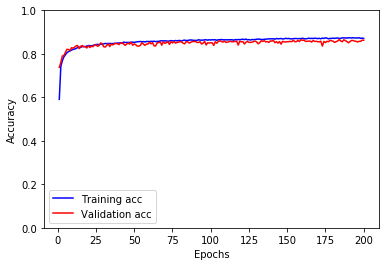


Neural Net: 32 units in each hidden layer;  1 hidden layers
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_30 (Flatten)         (None, 16)                0         
_________________________________________________________________
dense_216 (Dense)            (None, 32)                544       
_________________________________________________________________
dense_217 (Dense)            (None, 10)                330       
Total params: 874
Trainable params: 874
Non-trainable params: 0
_________________________________________________________________
Train on 48000 samples, validate on 12000 samples
Epoch 1/200
 - 8s - loss: 5.8656 - acc: 0.5246 - val_loss: 5.1857 - val_acc: 0.5854
Epoch 2/200
 - 5s - loss: 5.1660 - acc: 0.5861 - val_loss: 5.0791 - val_acc: 0.6058
Epoch 3/200
 - 5s - loss: 5.1199 - acc: 0.5959 - val_loss: 5.1097 - val_acc: 0.5876
Epoch 4/200
 - 5s - loss: 5.0807 - acc: 0.605

Epoch 88/200
 - 4s - loss: 0.4385 - acc: 0.8521 - val_loss: 0.4473 - val_acc: 0.8538
Epoch 89/200
 - 4s - loss: 0.4406 - acc: 0.8519 - val_loss: 0.4441 - val_acc: 0.8581
Epoch 90/200
 - 4s - loss: 0.4402 - acc: 0.8529 - val_loss: 0.4620 - val_acc: 0.8505
Epoch 91/200
 - 4s - loss: 0.4389 - acc: 0.8521 - val_loss: 0.4860 - val_acc: 0.8413
Epoch 92/200
 - 4s - loss: 0.4396 - acc: 0.8512 - val_loss: 0.4589 - val_acc: 0.8489
Epoch 93/200
 - 4s - loss: 0.4393 - acc: 0.8518 - val_loss: 0.4563 - val_acc: 0.8540
Epoch 94/200
 - 4s - loss: 0.4369 - acc: 0.8534 - val_loss: 0.4461 - val_acc: 0.8563
Epoch 95/200
 - 4s - loss: 0.4387 - acc: 0.8525 - val_loss: 0.4474 - val_acc: 0.8533
Epoch 96/200
 - 4s - loss: 0.4390 - acc: 0.8523 - val_loss: 0.4547 - val_acc: 0.8558
Epoch 97/200
 - 4s - loss: 0.4371 - acc: 0.8534 - val_loss: 0.4438 - val_acc: 0.8580
Epoch 98/200
 - 4s - loss: 0.4371 - acc: 0.8529 - val_loss: 0.4675 - val_acc: 0.8487
Epoch 99/200
 - 4s - loss: 0.4348 - acc: 0.8534 - val_loss: 0.451

Epoch 184/200
 - 4s - loss: 0.4263 - acc: 0.8586 - val_loss: 0.4466 - val_acc: 0.8534
Epoch 185/200
 - 4s - loss: 0.4269 - acc: 0.8566 - val_loss: 0.4353 - val_acc: 0.8533
Epoch 186/200
 - 4s - loss: 0.4272 - acc: 0.8565 - val_loss: 0.4373 - val_acc: 0.8578
Epoch 187/200
 - 4s - loss: 0.4256 - acc: 0.8557 - val_loss: 0.4524 - val_acc: 0.8526
Epoch 188/200
 - 4s - loss: 0.4259 - acc: 0.8569 - val_loss: 0.4347 - val_acc: 0.8590
Epoch 189/200
 - 4s - loss: 0.4280 - acc: 0.8563 - val_loss: 0.4361 - val_acc: 0.8568
Epoch 190/200
 - 4s - loss: 0.4261 - acc: 0.8570 - val_loss: 0.4672 - val_acc: 0.8488
Epoch 191/200
 - 4s - loss: 0.4271 - acc: 0.8563 - val_loss: 0.4664 - val_acc: 0.8463
Epoch 192/200
 - 4s - loss: 0.4250 - acc: 0.8565 - val_loss: 0.4479 - val_acc: 0.8552
Epoch 193/200
 - 4s - loss: 0.4275 - acc: 0.8565 - val_loss: 0.4574 - val_acc: 0.8456
Epoch 194/200
 - 4s - loss: 0.4248 - acc: 0.8569 - val_loss: 0.4271 - val_acc: 0.8594
Epoch 195/200
 - 4s - loss: 0.4269 - acc: 0.8571 - val


Neural Net: 32 units in each hidden layer;  2 hidden layers
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_31 (Flatten)         (None, 16)                0         
_________________________________________________________________
dense_218 (Dense)            (None, 32)                544       
_________________________________________________________________
dense_219 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_220 (Dense)            (None, 10)                330       
Total params: 1,930
Trainable params: 1,930
Non-trainable params: 0
_________________________________________________________________
Train on 48000 samples, validate on 12000 samples
Epoch 1/200
 - 8s - loss: 1.4503 - acc: 0.6813 - val_loss: 0.7486 - val_acc: 0.7625
Epoch 2/200
 - 5s - loss: 0.6846 - acc: 0.7803 - val_loss: 0.6225 - val_acc: 

 - 4s - loss: 0.3877 - acc: 0.8670 - val_loss: 0.4516 - val_acc: 0.8532
Epoch 87/200
 - 4s - loss: 0.3870 - acc: 0.8673 - val_loss: 0.4268 - val_acc: 0.8618
Epoch 88/200
 - 4s - loss: 0.3874 - acc: 0.8664 - val_loss: 0.4497 - val_acc: 0.8526
Epoch 89/200
 - 4s - loss: 0.3866 - acc: 0.8662 - val_loss: 0.4210 - val_acc: 0.8617
Epoch 90/200
 - 4s - loss: 0.3872 - acc: 0.8668 - val_loss: 0.4343 - val_acc: 0.8572
Epoch 91/200
 - 4s - loss: 0.3869 - acc: 0.8678 - val_loss: 0.4385 - val_acc: 0.8566
Epoch 92/200
 - 4s - loss: 0.3851 - acc: 0.8678 - val_loss: 0.4307 - val_acc: 0.8592
Epoch 93/200
 - 4s - loss: 0.3837 - acc: 0.8670 - val_loss: 0.4409 - val_acc: 0.8554
Epoch 94/200
 - 4s - loss: 0.3868 - acc: 0.8678 - val_loss: 0.4359 - val_acc: 0.8562
Epoch 95/200
 - 4s - loss: 0.3847 - acc: 0.8675 - val_loss: 0.4380 - val_acc: 0.8589
Epoch 96/200
 - 4s - loss: 0.3837 - acc: 0.8682 - val_loss: 0.4298 - val_acc: 0.8611
Epoch 97/200
 - 4s - loss: 0.3863 - acc: 0.8672 - val_loss: 0.4204 - val_acc: 

Epoch 182/200
 - 4s - loss: 0.3683 - acc: 0.8730 - val_loss: 0.4370 - val_acc: 0.8589
Epoch 183/200
 - 4s - loss: 0.3696 - acc: 0.8726 - val_loss: 0.4287 - val_acc: 0.8631
Epoch 184/200
 - 4s - loss: 0.3694 - acc: 0.8732 - val_loss: 0.4459 - val_acc: 0.8577
Epoch 185/200
 - 4s - loss: 0.3694 - acc: 0.8732 - val_loss: 0.4338 - val_acc: 0.8598
Epoch 186/200
 - 5s - loss: 0.3709 - acc: 0.8730 - val_loss: 0.4280 - val_acc: 0.8643
Epoch 187/200
 - 5s - loss: 0.3677 - acc: 0.8733 - val_loss: 0.4251 - val_acc: 0.8609
Epoch 188/200
 - 4s - loss: 0.3693 - acc: 0.8740 - val_loss: 0.4320 - val_acc: 0.8634
Epoch 189/200
 - 5s - loss: 0.3700 - acc: 0.8732 - val_loss: 0.4489 - val_acc: 0.8558
Epoch 190/200
 - 5s - loss: 0.3704 - acc: 0.8730 - val_loss: 0.4211 - val_acc: 0.8650
Epoch 191/200
 - 4s - loss: 0.3676 - acc: 0.8735 - val_loss: 0.4330 - val_acc: 0.8608
Epoch 192/200
 - 4s - loss: 0.3679 - acc: 0.8735 - val_loss: 0.4316 - val_acc: 0.8605
Epoch 193/200
 - 4s - loss: 0.3689 - acc: 0.8730 - val


Neural Net: 32 units in each hidden layer;  4 hidden layers
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_32 (Flatten)         (None, 16)                0         
_________________________________________________________________
dense_221 (Dense)            (None, 32)                544       
_________________________________________________________________
dense_222 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_223 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_224 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_225 (Dense)            (None, 10)                330       
Total params: 4,042
Trainable params: 4,042
Non-trainable params: 0
_____________

Epoch 83/200
 - 5s - loss: 0.3516 - acc: 0.8781 - val_loss: 0.4248 - val_acc: 0.8612
Epoch 84/200
 - 5s - loss: 0.3499 - acc: 0.8782 - val_loss: 0.4363 - val_acc: 0.8608
Epoch 85/200
 - 5s - loss: 0.3512 - acc: 0.8785 - val_loss: 0.4179 - val_acc: 0.8638
Epoch 86/200
 - 5s - loss: 0.3504 - acc: 0.8778 - val_loss: 0.4207 - val_acc: 0.8622
Epoch 87/200
 - 5s - loss: 0.3503 - acc: 0.8787 - val_loss: 0.4099 - val_acc: 0.8655
Epoch 88/200
 - 5s - loss: 0.3518 - acc: 0.8774 - val_loss: 0.4074 - val_acc: 0.8702
Epoch 89/200
 - 5s - loss: 0.3522 - acc: 0.8761 - val_loss: 0.4151 - val_acc: 0.8637
Epoch 90/200
 - 5s - loss: 0.3504 - acc: 0.8770 - val_loss: 0.4077 - val_acc: 0.8660
Epoch 91/200
 - 5s - loss: 0.3479 - acc: 0.8771 - val_loss: 0.4293 - val_acc: 0.8614
Epoch 92/200
 - 5s - loss: 0.3493 - acc: 0.8781 - val_loss: 0.4317 - val_acc: 0.8588
Epoch 93/200
 - 5s - loss: 0.3482 - acc: 0.8784 - val_loss: 0.4193 - val_acc: 0.8626
Epoch 94/200
 - 5s - loss: 0.3491 - acc: 0.8783 - val_loss: 0.426

Epoch 179/200
 - 5s - loss: 0.3283 - acc: 0.8847 - val_loss: 0.4623 - val_acc: 0.8555
Epoch 180/200
 - 5s - loss: 0.3282 - acc: 0.8849 - val_loss: 0.4192 - val_acc: 0.8703
Epoch 181/200
 - 5s - loss: 0.3293 - acc: 0.8857 - val_loss: 0.4307 - val_acc: 0.8659
Epoch 182/200
 - 5s - loss: 0.3256 - acc: 0.8859 - val_loss: 0.4213 - val_acc: 0.8696
Epoch 183/200
 - 5s - loss: 0.3282 - acc: 0.8846 - val_loss: 0.4360 - val_acc: 0.8636
Epoch 184/200
 - 5s - loss: 0.3283 - acc: 0.8851 - val_loss: 0.4445 - val_acc: 0.8605
Epoch 185/200
 - 5s - loss: 0.3278 - acc: 0.8853 - val_loss: 0.4128 - val_acc: 0.8702
Epoch 186/200
 - 5s - loss: 0.3259 - acc: 0.8862 - val_loss: 0.4315 - val_acc: 0.8643
Epoch 187/200
 - 5s - loss: 0.3256 - acc: 0.8860 - val_loss: 0.4236 - val_acc: 0.8673
Epoch 188/200
 - 5s - loss: 0.3264 - acc: 0.8856 - val_loss: 0.4409 - val_acc: 0.8670
Epoch 189/200
 - 5s - loss: 0.3293 - acc: 0.8840 - val_loss: 0.4164 - val_acc: 0.8704
Epoch 190/200
 - 5s - loss: 0.3253 - acc: 0.8856 - val


Neural Net: 32 units in each hidden layer;  8 hidden layers
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_33 (Flatten)         (None, 16)                0         
_________________________________________________________________
dense_226 (Dense)            (None, 32)                544       
_________________________________________________________________
dense_227 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_228 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_229 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_230 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_231 (Dens

Epoch 77/200
 - 6s - loss: 0.3563 - acc: 0.8756 - val_loss: 0.4335 - val_acc: 0.8587
Epoch 78/200
 - 6s - loss: 0.3522 - acc: 0.8759 - val_loss: 0.4382 - val_acc: 0.8588
Epoch 79/200
 - 6s - loss: 0.3486 - acc: 0.8774 - val_loss: 0.4368 - val_acc: 0.8598
Epoch 80/200
 - 6s - loss: 0.3530 - acc: 0.8767 - val_loss: 0.4449 - val_acc: 0.8552
Epoch 81/200
 - 6s - loss: 0.3503 - acc: 0.8762 - val_loss: 0.4501 - val_acc: 0.8576
Epoch 82/200
 - 6s - loss: 0.3485 - acc: 0.8767 - val_loss: 0.4284 - val_acc: 0.8608
Epoch 83/200
 - 6s - loss: 0.3493 - acc: 0.8762 - val_loss: 0.4335 - val_acc: 0.8599
Epoch 84/200
 - 6s - loss: 0.3511 - acc: 0.8775 - val_loss: 0.4234 - val_acc: 0.8614
Epoch 85/200
 - 6s - loss: 0.3481 - acc: 0.8782 - val_loss: 0.4450 - val_acc: 0.8583
Epoch 86/200
 - 6s - loss: 0.3483 - acc: 0.8775 - val_loss: 0.4482 - val_acc: 0.8602
Epoch 87/200
 - 6s - loss: 0.3483 - acc: 0.8776 - val_loss: 0.4397 - val_acc: 0.8582
Epoch 88/200
 - 6s - loss: 0.3475 - acc: 0.8778 - val_loss: 0.427

Epoch 173/200
 - 6s - loss: 0.3396 - acc: 0.8819 - val_loss: 0.4447 - val_acc: 0.8593
Epoch 174/200
 - 6s - loss: 0.3314 - acc: 0.8846 - val_loss: 0.4375 - val_acc: 0.8657
Epoch 175/200
 - 6s - loss: 0.3364 - acc: 0.8816 - val_loss: 0.4530 - val_acc: 0.8628
Epoch 176/200
 - 6s - loss: 0.3280 - acc: 0.8849 - val_loss: 0.4487 - val_acc: 0.8628
Epoch 177/200
 - 6s - loss: 0.3315 - acc: 0.8833 - val_loss: 0.4666 - val_acc: 0.8529
Epoch 178/200
 - 6s - loss: 0.3346 - acc: 0.8830 - val_loss: 0.4298 - val_acc: 0.8668
Epoch 179/200
 - 6s - loss: 0.3264 - acc: 0.8854 - val_loss: 0.4548 - val_acc: 0.8560
Epoch 180/200
 - 6s - loss: 0.3256 - acc: 0.8849 - val_loss: 0.4693 - val_acc: 0.8586
Epoch 181/200
 - 6s - loss: 0.3251 - acc: 0.8865 - val_loss: 0.4620 - val_acc: 0.8592
Epoch 182/200
 - 6s - loss: 0.3254 - acc: 0.8857 - val_loss: 0.4568 - val_acc: 0.8610
Epoch 183/200
 - 6s - loss: 0.3309 - acc: 0.8843 - val_loss: 0.4446 - val_acc: 0.8642
Epoch 184/200
 - 6s - loss: 0.3247 - acc: 0.8864 - val

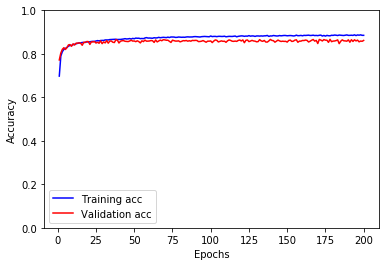


Neural Net: 32 units in each hidden layer;  16 hidden layers
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_34 (Flatten)         (None, 16)                0         
_________________________________________________________________
dense_235 (Dense)            (None, 32)                544       
_________________________________________________________________
dense_236 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_237 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_238 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_239 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_240 (Den

Epoch 65/200
 - 8s - loss: 0.3944 - acc: 0.8692 - val_loss: 0.4977 - val_acc: 0.8488
Epoch 66/200
 - 8s - loss: 0.3997 - acc: 0.8680 - val_loss: 0.4620 - val_acc: 0.8542
Epoch 67/200
 - 8s - loss: 0.4315 - acc: 0.8619 - val_loss: 0.4539 - val_acc: 0.8588
Epoch 68/200
 - 8s - loss: 0.3921 - acc: 0.8698 - val_loss: 0.4349 - val_acc: 0.8637
Epoch 69/200
 - 8s - loss: 0.4186 - acc: 0.8629 - val_loss: 0.4650 - val_acc: 0.8544
Epoch 70/200
 - 8s - loss: 0.3907 - acc: 0.8711 - val_loss: 0.4672 - val_acc: 0.8566
Epoch 71/200
 - 8s - loss: 0.4029 - acc: 0.8661 - val_loss: 0.4705 - val_acc: 0.8537
Epoch 72/200
 - 9s - loss: 0.3896 - acc: 0.8709 - val_loss: 0.4577 - val_acc: 0.8565
Epoch 73/200
 - 9s - loss: 0.3875 - acc: 0.8706 - val_loss: 0.4622 - val_acc: 0.8553
Epoch 74/200
 - 8s - loss: 0.3900 - acc: 0.8701 - val_loss: 0.4580 - val_acc: 0.8572
Epoch 75/200
 - 8s - loss: 0.3909 - acc: 0.8712 - val_loss: 0.4636 - val_acc: 0.8544
Epoch 76/200
 - 8s - loss: 0.3861 - acc: 0.8713 - val_loss: 0.458

Epoch 161/200
 - 8s - loss: 0.3458 - acc: 0.8840 - val_loss: 0.4662 - val_acc: 0.8611
Epoch 162/200
 - 8s - loss: 0.3536 - acc: 0.8839 - val_loss: 0.4640 - val_acc: 0.8583
Epoch 163/200
 - 8s - loss: 0.3694 - acc: 0.8798 - val_loss: 0.4601 - val_acc: 0.8568
Epoch 164/200
 - 8s - loss: 0.3466 - acc: 0.8828 - val_loss: 0.4574 - val_acc: 0.8621
Epoch 165/200
 - 8s - loss: 0.3411 - acc: 0.8856 - val_loss: 0.4620 - val_acc: 0.8602
Epoch 166/200
 - 8s - loss: 0.3457 - acc: 0.8839 - val_loss: 0.4590 - val_acc: 0.8590
Epoch 167/200
 - 8s - loss: 0.3457 - acc: 0.8830 - val_loss: 0.4635 - val_acc: 0.8557
Epoch 168/200
 - 8s - loss: 0.3493 - acc: 0.8839 - val_loss: 0.4560 - val_acc: 0.8616
Epoch 169/200
 - 8s - loss: 0.3431 - acc: 0.8849 - val_loss: 0.4613 - val_acc: 0.8622
Epoch 170/200
 - 8s - loss: 0.3491 - acc: 0.8829 - val_loss: 0.4814 - val_acc: 0.8565
Epoch 171/200
 - 8s - loss: 0.6836 - acc: 0.8503 - val_loss: 1.1996 - val_acc: 0.8006
Epoch 172/200
 - 8s - loss: 0.7529 - acc: 0.8441 - val


Neural Net: 64 units in each hidden layer;  1 hidden layers
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_35 (Flatten)         (None, 16)                0         
_________________________________________________________________
dense_252 (Dense)            (None, 64)                1088      
_________________________________________________________________
dense_253 (Dense)            (None, 10)                650       
Total params: 1,738
Trainable params: 1,738
Non-trainable params: 0
_________________________________________________________________
Train on 48000 samples, validate on 12000 samples
Epoch 1/200
 - 8s - loss: 7.3104 - acc: 0.4578 - val_loss: 6.7142 - val_acc: 0.5058
Epoch 2/200
 - 4s - loss: 6.3352 - acc: 0.5180 - val_loss: 5.1373 - val_acc: 0.5935
Epoch 3/200
 - 4s - loss: 5.0931 - acc: 0.5895 - val_loss: 5.0672 - val_acc: 0.6068
Epoch 4/200
 - 4s - loss: 5.0443 - acc: 0

Epoch 88/200
 - 4s - loss: 0.3789 - acc: 0.8691 - val_loss: 0.4174 - val_acc: 0.8682
Epoch 89/200
 - 4s - loss: 0.3800 - acc: 0.8691 - val_loss: 0.4128 - val_acc: 0.8656
Epoch 90/200
 - 4s - loss: 0.3782 - acc: 0.8708 - val_loss: 0.4066 - val_acc: 0.8685
Epoch 91/200
 - 4s - loss: 0.3791 - acc: 0.8698 - val_loss: 0.4100 - val_acc: 0.8691
Epoch 92/200
 - 4s - loss: 0.3781 - acc: 0.8706 - val_loss: 0.4019 - val_acc: 0.8704
Epoch 93/200
 - 4s - loss: 0.3769 - acc: 0.8710 - val_loss: 0.4028 - val_acc: 0.8699
Epoch 94/200
 - 4s - loss: 0.3777 - acc: 0.8712 - val_loss: 0.4116 - val_acc: 0.8652
Epoch 95/200
 - 4s - loss: 0.3774 - acc: 0.8712 - val_loss: 0.4166 - val_acc: 0.8672
Epoch 96/200
 - 4s - loss: 0.3795 - acc: 0.8717 - val_loss: 0.4077 - val_acc: 0.8678
Epoch 97/200
 - 4s - loss: 0.3774 - acc: 0.8696 - val_loss: 0.4103 - val_acc: 0.8673
Epoch 98/200
 - 4s - loss: 0.3769 - acc: 0.8701 - val_loss: 0.4029 - val_acc: 0.8688
Epoch 99/200
 - 4s - loss: 0.3772 - acc: 0.8711 - val_loss: 0.413

Epoch 184/200
 - 4s - loss: 0.3681 - acc: 0.8729 - val_loss: 0.3993 - val_acc: 0.8721
Epoch 185/200
 - 4s - loss: 0.3690 - acc: 0.8727 - val_loss: 0.4109 - val_acc: 0.8674
Epoch 186/200
 - 4s - loss: 0.3680 - acc: 0.8747 - val_loss: 0.4152 - val_acc: 0.8651
Epoch 187/200
 - 4s - loss: 0.3683 - acc: 0.8732 - val_loss: 0.4016 - val_acc: 0.8709
Epoch 188/200
 - 4s - loss: 0.3685 - acc: 0.8726 - val_loss: 0.3984 - val_acc: 0.8692
Epoch 189/200
 - 4s - loss: 0.3692 - acc: 0.8734 - val_loss: 0.4060 - val_acc: 0.8702
Epoch 190/200
 - 4s - loss: 0.3675 - acc: 0.8737 - val_loss: 0.4070 - val_acc: 0.8726
Epoch 191/200
 - 4s - loss: 0.3695 - acc: 0.8730 - val_loss: 0.4047 - val_acc: 0.8715
Epoch 192/200
 - 4s - loss: 0.3682 - acc: 0.8730 - val_loss: 0.4076 - val_acc: 0.8706
Epoch 193/200
 - 4s - loss: 0.3678 - acc: 0.8734 - val_loss: 0.4021 - val_acc: 0.8716
Epoch 194/200
 - 4s - loss: 0.3670 - acc: 0.8742 - val_loss: 0.4050 - val_acc: 0.8712
Epoch 195/200
 - 4s - loss: 0.3673 - acc: 0.8733 - val

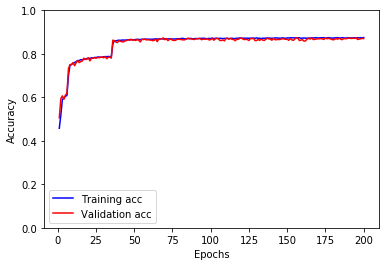


Neural Net: 64 units in each hidden layer;  2 hidden layers
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_36 (Flatten)         (None, 16)                0         
_________________________________________________________________
dense_254 (Dense)            (None, 64)                1088      
_________________________________________________________________
dense_255 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_256 (Dense)            (None, 10)                650       
Total params: 5,898
Trainable params: 5,898
Non-trainable params: 0
_________________________________________________________________
Train on 48000 samples, validate on 12000 samples
Epoch 1/200
 - 9s - loss: 2.8815 - acc: 0.6388 - val_loss: 2.1532 - val_acc: 0.7093
Epoch 2/200
 - 5s - loss: 1.6305 - acc: 0.7448 - val_loss: 0.5529 - val_acc: 

 - 5s - loss: 0.3033 - acc: 0.8934 - val_loss: 0.4577 - val_acc: 0.8653
Epoch 87/200
 - 5s - loss: 0.3032 - acc: 0.8930 - val_loss: 0.4441 - val_acc: 0.8658
Epoch 88/200
 - 5s - loss: 0.3036 - acc: 0.8925 - val_loss: 0.4334 - val_acc: 0.8641
Epoch 89/200
 - 5s - loss: 0.3033 - acc: 0.8928 - val_loss: 0.4345 - val_acc: 0.8691
Epoch 90/200
 - 5s - loss: 0.3023 - acc: 0.8920 - val_loss: 0.4472 - val_acc: 0.8711
Epoch 91/200
 - 5s - loss: 0.3029 - acc: 0.8931 - val_loss: 0.4343 - val_acc: 0.8721
Epoch 92/200
 - 5s - loss: 0.3011 - acc: 0.8940 - val_loss: 0.4418 - val_acc: 0.8654
Epoch 93/200
 - 5s - loss: 0.3001 - acc: 0.8931 - val_loss: 0.4312 - val_acc: 0.8719
Epoch 94/200
 - 6s - loss: 0.2995 - acc: 0.8937 - val_loss: 0.4538 - val_acc: 0.8672
Epoch 95/200
 - 5s - loss: 0.3011 - acc: 0.8931 - val_loss: 0.4348 - val_acc: 0.8713
Epoch 96/200
 - 5s - loss: 0.3032 - acc: 0.8927 - val_loss: 0.4538 - val_acc: 0.8666
Epoch 97/200
 - 5s - loss: 0.2997 - acc: 0.8939 - val_loss: 0.4326 - val_acc: 

Epoch 182/200
 - 4s - loss: 0.2858 - acc: 0.8980 - val_loss: 0.4867 - val_acc: 0.8651
Epoch 183/200
 - 4s - loss: 0.2853 - acc: 0.8990 - val_loss: 0.4647 - val_acc: 0.8714
Epoch 184/200
 - 4s - loss: 0.2836 - acc: 0.9004 - val_loss: 0.4686 - val_acc: 0.8681
Epoch 185/200
 - 4s - loss: 0.2851 - acc: 0.8978 - val_loss: 0.4718 - val_acc: 0.8696
Epoch 186/200
 - 4s - loss: 0.2851 - acc: 0.8995 - val_loss: 0.4790 - val_acc: 0.8647
Epoch 187/200
 - 4s - loss: 0.2817 - acc: 0.9000 - val_loss: 0.5029 - val_acc: 0.8631
Epoch 188/200
 - 4s - loss: 0.2805 - acc: 0.9009 - val_loss: 0.4932 - val_acc: 0.8658
Epoch 189/200
 - 4s - loss: 0.2833 - acc: 0.8992 - val_loss: 0.4610 - val_acc: 0.8708
Epoch 190/200
 - 4s - loss: 0.2847 - acc: 0.8984 - val_loss: 0.4819 - val_acc: 0.8659
Epoch 191/200
 - 4s - loss: 0.2822 - acc: 0.9005 - val_loss: 0.4929 - val_acc: 0.8642
Epoch 192/200
 - 4s - loss: 0.2833 - acc: 0.8995 - val_loss: 0.4623 - val_acc: 0.8688
Epoch 193/200
 - 4s - loss: 0.2823 - acc: 0.8995 - val

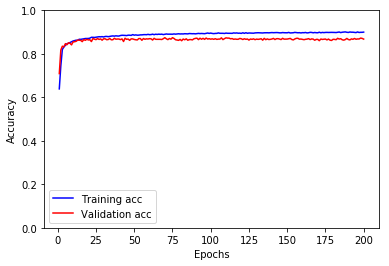


Neural Net: 64 units in each hidden layer;  4 hidden layers
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_37 (Flatten)         (None, 16)                0         
_________________________________________________________________
dense_257 (Dense)            (None, 64)                1088      
_________________________________________________________________
dense_258 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_259 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_260 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_261 (Dense)            (None, 10)                650       
Total params: 14,218
Trainable params: 14,218
Non-trainable params: 0
___________

Epoch 83/200
 - 6s - loss: 0.2610 - acc: 0.9069 - val_loss: 0.4876 - val_acc: 0.8663
Epoch 84/200
 - 6s - loss: 0.2642 - acc: 0.9067 - val_loss: 0.4828 - val_acc: 0.8649
Epoch 85/200
 - 6s - loss: 0.2584 - acc: 0.9076 - val_loss: 0.4743 - val_acc: 0.8662
Epoch 86/200
 - 6s - loss: 0.2564 - acc: 0.9095 - val_loss: 0.4954 - val_acc: 0.8649
Epoch 87/200
 - 6s - loss: 0.2651 - acc: 0.9049 - val_loss: 0.4903 - val_acc: 0.8600
Epoch 88/200
 - 6s - loss: 0.2616 - acc: 0.9063 - val_loss: 0.4749 - val_acc: 0.8688
Epoch 89/200
 - 6s - loss: 0.2584 - acc: 0.9071 - val_loss: 0.5204 - val_acc: 0.8586
Epoch 90/200
 - 6s - loss: 0.2606 - acc: 0.9066 - val_loss: 0.4941 - val_acc: 0.8693
Epoch 91/200
 - 6s - loss: 0.2519 - acc: 0.9090 - val_loss: 0.4982 - val_acc: 0.8634
Epoch 92/200
 - 6s - loss: 0.2601 - acc: 0.9073 - val_loss: 0.4992 - val_acc: 0.8657
Epoch 93/200
 - 6s - loss: 0.2520 - acc: 0.9081 - val_loss: 0.5081 - val_acc: 0.8626
Epoch 94/200
 - 6s - loss: 0.2568 - acc: 0.9068 - val_loss: 0.484

Epoch 179/200
 - 6s - loss: 0.2377 - acc: 0.9163 - val_loss: 0.5578 - val_acc: 0.8662
Epoch 180/200
 - 6s - loss: 0.2252 - acc: 0.9175 - val_loss: 0.5765 - val_acc: 0.8604
Epoch 181/200
 - 6s - loss: 0.2303 - acc: 0.9176 - val_loss: 0.5698 - val_acc: 0.8624
Epoch 182/200
 - 6s - loss: 0.2376 - acc: 0.9150 - val_loss: 0.5746 - val_acc: 0.8621
Epoch 183/200
 - 6s - loss: 0.2328 - acc: 0.9164 - val_loss: 0.5641 - val_acc: 0.8692
Epoch 184/200
 - 6s - loss: 0.2358 - acc: 0.9157 - val_loss: 0.5734 - val_acc: 0.8628
Epoch 185/200
 - 6s - loss: 0.2327 - acc: 0.9163 - val_loss: 0.5846 - val_acc: 0.8627
Epoch 186/200
 - 6s - loss: 0.2354 - acc: 0.9155 - val_loss: 0.5884 - val_acc: 0.8658
Epoch 187/200
 - 6s - loss: 0.2274 - acc: 0.9185 - val_loss: 0.5864 - val_acc: 0.8683
Epoch 188/200
 - 6s - loss: 0.2312 - acc: 0.9178 - val_loss: 0.5876 - val_acc: 0.8689
Epoch 189/200
 - 6s - loss: 0.2291 - acc: 0.9184 - val_loss: 0.5848 - val_acc: 0.8652
Epoch 190/200
 - 6s - loss: 0.2224 - acc: 0.9194 - val


Neural Net: 64 units in each hidden layer;  8 hidden layers
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_38 (Flatten)         (None, 16)                0         
_________________________________________________________________
dense_262 (Dense)            (None, 64)                1088      
_________________________________________________________________
dense_263 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_264 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_265 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_266 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_267 (Dens

Epoch 77/200
 - 7s - loss: 0.2680 - acc: 0.9057 - val_loss: 0.4460 - val_acc: 0.8721
Epoch 78/200
 - 7s - loss: 0.2686 - acc: 0.9051 - val_loss: 0.4671 - val_acc: 0.8696
Epoch 79/200
 - 7s - loss: 0.2661 - acc: 0.9058 - val_loss: 0.4469 - val_acc: 0.8703
Epoch 80/200
 - 7s - loss: 0.2618 - acc: 0.9075 - val_loss: 0.4648 - val_acc: 0.8702
Epoch 81/200
 - 7s - loss: 0.2709 - acc: 0.9059 - val_loss: 0.4659 - val_acc: 0.8715
Epoch 82/200
 - 7s - loss: 0.2699 - acc: 0.9055 - val_loss: 0.4363 - val_acc: 0.8712
Epoch 83/200
 - 7s - loss: 0.2633 - acc: 0.9066 - val_loss: 0.4775 - val_acc: 0.8704
Epoch 84/200
 - 7s - loss: 0.2640 - acc: 0.9073 - val_loss: 0.4865 - val_acc: 0.8688
Epoch 85/200
 - 7s - loss: 0.2633 - acc: 0.9068 - val_loss: 0.4840 - val_acc: 0.8686
Epoch 86/200
 - 7s - loss: 0.2690 - acc: 0.9060 - val_loss: 0.4613 - val_acc: 0.8711
Epoch 87/200
 - 7s - loss: 0.2621 - acc: 0.9072 - val_loss: 0.4633 - val_acc: 0.8704
Epoch 88/200
 - 7s - loss: 0.2663 - acc: 0.9075 - val_loss: 0.477

Epoch 173/200
 - 7s - loss: 0.2230 - acc: 0.9212 - val_loss: 0.5520 - val_acc: 0.8666
Epoch 174/200
 - 7s - loss: 0.2280 - acc: 0.9205 - val_loss: 0.5829 - val_acc: 0.8676
Epoch 175/200
 - 7s - loss: 0.2239 - acc: 0.9205 - val_loss: 0.5791 - val_acc: 0.8514
Epoch 176/200
 - 7s - loss: 0.2432 - acc: 0.9160 - val_loss: 0.5356 - val_acc: 0.8649
Epoch 177/200
 - 7s - loss: 0.2191 - acc: 0.9229 - val_loss: 0.5861 - val_acc: 0.8675
Epoch 178/200
 - 7s - loss: 0.2219 - acc: 0.9250 - val_loss: 0.5354 - val_acc: 0.8508
Epoch 179/200
 - 7s - loss: 0.2173 - acc: 0.9215 - val_loss: 0.5709 - val_acc: 0.8653
Epoch 180/200
 - 7s - loss: 0.2390 - acc: 0.9169 - val_loss: 0.5392 - val_acc: 0.8708
Epoch 181/200
 - 7s - loss: 0.2469 - acc: 0.9176 - val_loss: 0.5554 - val_acc: 0.8678
Epoch 182/200
 - 7s - loss: 0.2304 - acc: 0.9213 - val_loss: 0.5637 - val_acc: 0.8625
Epoch 183/200
 - 7s - loss: 0.2652 - acc: 0.9105 - val_loss: 0.5161 - val_acc: 0.8660
Epoch 184/200
 - 7s - loss: 0.2319 - acc: 0.9187 - val

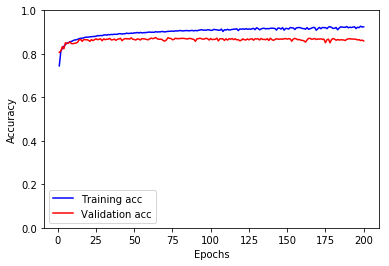


Neural Net: 64 units in each hidden layer;  16 hidden layers
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_39 (Flatten)         (None, 16)                0         
_________________________________________________________________
dense_271 (Dense)            (None, 64)                1088      
_________________________________________________________________
dense_272 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_273 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_274 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_275 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_276 (Den

Epoch 65/200
 - 9s - loss: 0.3529 - acc: 0.8844 - val_loss: 0.4419 - val_acc: 0.8668
Epoch 66/200
 - 9s - loss: 0.3444 - acc: 0.8854 - val_loss: 0.4581 - val_acc: 0.8616
Epoch 67/200
 - 9s - loss: 0.3498 - acc: 0.8850 - val_loss: 0.4455 - val_acc: 0.8636
Epoch 68/200
 - 9s - loss: 0.3474 - acc: 0.8855 - val_loss: 0.4492 - val_acc: 0.8663
Epoch 69/200
 - 9s - loss: 0.3421 - acc: 0.8868 - val_loss: 0.4392 - val_acc: 0.8655
Epoch 70/200
 - 9s - loss: 0.3646 - acc: 0.8805 - val_loss: 0.4305 - val_acc: 0.8672
Epoch 71/200
 - 9s - loss: 0.3422 - acc: 0.8864 - val_loss: 0.4305 - val_acc: 0.8724
Epoch 72/200
 - 9s - loss: 0.3482 - acc: 0.8856 - val_loss: 0.4258 - val_acc: 0.8694
Epoch 73/200
 - 9s - loss: 0.3340 - acc: 0.8903 - val_loss: 0.5010 - val_acc: 0.8708
Epoch 74/200
 - 9s - loss: 0.3547 - acc: 0.8841 - val_loss: 0.4514 - val_acc: 0.8654
Epoch 75/200
 - 9s - loss: 0.3403 - acc: 0.8875 - val_loss: 0.4498 - val_acc: 0.8632
Epoch 76/200
 - 9s - loss: 0.3359 - acc: 0.8896 - val_loss: 0.432

Epoch 161/200
 - 8s - loss: 0.3330 - acc: 0.8942 - val_loss: 0.5045 - val_acc: 0.8578
Epoch 162/200
 - 8s - loss: 0.3517 - acc: 0.8873 - val_loss: 0.4698 - val_acc: 0.8636
Epoch 163/200
 - 8s - loss: 0.3107 - acc: 0.8964 - val_loss: 0.4455 - val_acc: 0.8751
Epoch 164/200
 - 8s - loss: 0.3082 - acc: 0.9000 - val_loss: 0.4431 - val_acc: 0.8672
Epoch 165/200
 - 8s - loss: 0.3421 - acc: 0.8897 - val_loss: 0.4438 - val_acc: 0.8712
Epoch 166/200
 - 8s - loss: 0.3040 - acc: 0.9017 - val_loss: 0.4451 - val_acc: 0.8710
Epoch 167/200
 - 8s - loss: 0.2930 - acc: 0.9035 - val_loss: 0.4666 - val_acc: 0.8723
Epoch 168/200
 - 8s - loss: 0.2961 - acc: 0.9033 - val_loss: 0.4598 - val_acc: 0.8716
Epoch 169/200
 - 8s - loss: 0.3223 - acc: 0.9010 - val_loss: 1.1925 - val_acc: 0.8194
Epoch 170/200
 - 8s - loss: 0.7582 - acc: 0.8507 - val_loss: 0.4478 - val_acc: 0.8648
Epoch 171/200
 - 8s - loss: 0.3158 - acc: 0.8953 - val_loss: 0.4713 - val_acc: 0.8698
Epoch 172/200
 - 8s - loss: 0.3660 - acc: 0.8909 - val


Neural Net: 128 units in each hidden layer;  1 hidden layers
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_40 (Flatten)         (None, 16)                0         
_________________________________________________________________
dense_288 (Dense)            (None, 128)               2176      
_________________________________________________________________
dense_289 (Dense)            (None, 10)                1290      
Total params: 3,466
Trainable params: 3,466
Non-trainable params: 0
_________________________________________________________________
Train on 48000 samples, validate on 12000 samples
Epoch 1/200
 - 9s - loss: 4.1280 - acc: 0.6200 - val_loss: 3.7079 - val_acc: 0.6606
Epoch 2/200
 - 5s - loss: 3.6593 - acc: 0.6760 - val_loss: 3.5424 - val_acc: 0.6994
Epoch 3/200
 - 5s - loss: 3.6113 - acc: 0.6888 - val_loss: 3.5757 - val_acc: 0.6860
Epoch 4/200
 - 5s - loss: 3.5812 - acc: 

Epoch 88/200
 - 5s - loss: 0.3443 - acc: 0.8824 - val_loss: 0.4070 - val_acc: 0.8714
Epoch 89/200
 - 4s - loss: 0.3420 - acc: 0.8816 - val_loss: 0.4066 - val_acc: 0.8708
Epoch 90/200
 - 4s - loss: 0.3413 - acc: 0.8823 - val_loss: 0.4198 - val_acc: 0.8677
Epoch 91/200
 - 4s - loss: 0.3433 - acc: 0.8813 - val_loss: 0.4343 - val_acc: 0.8631
Epoch 92/200
 - 4s - loss: 0.3398 - acc: 0.8835 - val_loss: 0.4221 - val_acc: 0.8693
Epoch 93/200
 - 4s - loss: 0.3423 - acc: 0.8822 - val_loss: 0.4084 - val_acc: 0.8707
Epoch 94/200
 - 4s - loss: 0.3409 - acc: 0.8820 - val_loss: 0.4172 - val_acc: 0.8718
Epoch 95/200
 - 4s - loss: 0.3389 - acc: 0.8820 - val_loss: 0.4180 - val_acc: 0.8709
Epoch 96/200
 - 4s - loss: 0.3400 - acc: 0.8825 - val_loss: 0.4189 - val_acc: 0.8653
Epoch 97/200
 - 4s - loss: 0.3404 - acc: 0.8817 - val_loss: 0.4195 - val_acc: 0.8688
Epoch 98/200
 - 4s - loss: 0.3402 - acc: 0.8825 - val_loss: 0.4288 - val_acc: 0.8668
Epoch 99/200
 - 4s - loss: 0.3386 - acc: 0.8825 - val_loss: 0.439

Epoch 184/200
 - 5s - loss: 0.3305 - acc: 0.8863 - val_loss: 0.4405 - val_acc: 0.8662
Epoch 185/200
 - 5s - loss: 0.3293 - acc: 0.8857 - val_loss: 0.4331 - val_acc: 0.8739
Epoch 186/200
 - 5s - loss: 0.3306 - acc: 0.8857 - val_loss: 0.4349 - val_acc: 0.8698
Epoch 187/200
 - 5s - loss: 0.3301 - acc: 0.8861 - val_loss: 0.4523 - val_acc: 0.8671
Epoch 188/200
 - 5s - loss: 0.3297 - acc: 0.8859 - val_loss: 0.4440 - val_acc: 0.8651
Epoch 189/200
 - 5s - loss: 0.3301 - acc: 0.8857 - val_loss: 0.4258 - val_acc: 0.8723
Epoch 190/200
 - 5s - loss: 0.3295 - acc: 0.8871 - val_loss: 0.4404 - val_acc: 0.8704
Epoch 191/200
 - 5s - loss: 0.3290 - acc: 0.8867 - val_loss: 0.4302 - val_acc: 0.8719
Epoch 192/200
 - 5s - loss: 0.3293 - acc: 0.8871 - val_loss: 0.4306 - val_acc: 0.8748
Epoch 193/200
 - 5s - loss: 0.3293 - acc: 0.8864 - val_loss: 0.4372 - val_acc: 0.8692
Epoch 194/200
 - 5s - loss: 0.3303 - acc: 0.8862 - val_loss: 0.4450 - val_acc: 0.8682
Epoch 195/200
 - 5s - loss: 0.3304 - acc: 0.8858 - val

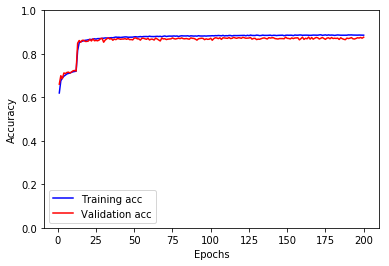


Neural Net: 128 units in each hidden layer;  2 hidden layers
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_41 (Flatten)         (None, 16)                0         
_________________________________________________________________
dense_290 (Dense)            (None, 128)               2176      
_________________________________________________________________
dense_291 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_292 (Dense)            (None, 10)                1290      
Total params: 19,978
Trainable params: 19,978
Non-trainable params: 0
_________________________________________________________________
Train on 48000 samples, validate on 12000 samples
Epoch 1/200
 - 11s - loss: 3.3847 - acc: 0.6473 - val_loss: 0.5379 - val_acc: 0.8237
Epoch 2/200
 - 6s - loss: 0.5288 - acc: 0.8231 - val_loss: 0.4893 - val_a

 - 5s - loss: 0.2299 - acc: 0.9174 - val_loss: 0.5658 - val_acc: 0.8693
Epoch 87/200
 - 5s - loss: 0.2220 - acc: 0.9208 - val_loss: 0.5638 - val_acc: 0.8672
Epoch 88/200
 - 5s - loss: 0.2224 - acc: 0.9187 - val_loss: 0.5834 - val_acc: 0.8638
Epoch 89/200
 - 5s - loss: 0.2259 - acc: 0.9187 - val_loss: 0.5678 - val_acc: 0.8643
Epoch 90/200
 - 6s - loss: 0.2186 - acc: 0.9204 - val_loss: 0.5824 - val_acc: 0.8662
Epoch 91/200
 - 6s - loss: 0.2242 - acc: 0.9197 - val_loss: 0.5872 - val_acc: 0.8646
Epoch 92/200
 - 6s - loss: 0.2237 - acc: 0.9206 - val_loss: 0.5911 - val_acc: 0.8664
Epoch 93/200
 - 6s - loss: 0.2219 - acc: 0.9213 - val_loss: 0.6055 - val_acc: 0.8606
Epoch 94/200
 - 6s - loss: 0.2225 - acc: 0.9202 - val_loss: 0.5826 - val_acc: 0.8625
Epoch 95/200
 - 5s - loss: 0.2192 - acc: 0.9216 - val_loss: 0.5898 - val_acc: 0.8644
Epoch 96/200
 - 6s - loss: 0.2243 - acc: 0.9202 - val_loss: 0.5982 - val_acc: 0.8636
Epoch 97/200
 - 6s - loss: 0.2161 - acc: 0.9229 - val_loss: 0.5815 - val_acc: 

Epoch 182/200
 - 5s - loss: 0.1885 - acc: 0.9338 - val_loss: 0.7442 - val_acc: 0.8618
Epoch 183/200
 - 5s - loss: 0.1881 - acc: 0.9335 - val_loss: 0.7682 - val_acc: 0.8562
Epoch 184/200
 - 5s - loss: 0.1965 - acc: 0.9315 - val_loss: 0.7761 - val_acc: 0.8597
Epoch 185/200
 - 5s - loss: 0.1913 - acc: 0.9329 - val_loss: 0.7359 - val_acc: 0.8626
Epoch 186/200
 - 5s - loss: 0.1897 - acc: 0.9335 - val_loss: 0.7617 - val_acc: 0.8605
Epoch 187/200
 - 5s - loss: 0.1913 - acc: 0.9337 - val_loss: 0.7375 - val_acc: 0.8619
Epoch 188/200
 - 5s - loss: 0.1968 - acc: 0.9313 - val_loss: 0.7267 - val_acc: 0.8657
Epoch 189/200
 - 5s - loss: 0.1884 - acc: 0.9330 - val_loss: 0.7477 - val_acc: 0.8603
Epoch 190/200
 - 5s - loss: 0.1954 - acc: 0.9312 - val_loss: 0.7232 - val_acc: 0.8617
Epoch 191/200
 - 5s - loss: 0.1837 - acc: 0.9338 - val_loss: 0.7712 - val_acc: 0.8584
Epoch 192/200
 - 5s - loss: 0.1897 - acc: 0.9333 - val_loss: 0.7679 - val_acc: 0.8588
Epoch 193/200
 - 5s - loss: 0.1942 - acc: 0.9323 - val

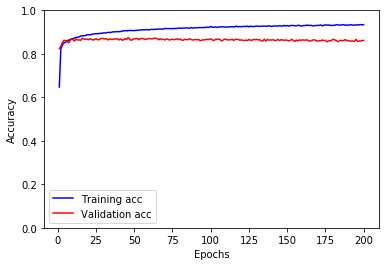


Neural Net: 128 units in each hidden layer;  4 hidden layers
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_42 (Flatten)         (None, 16)                0         
_________________________________________________________________
dense_293 (Dense)            (None, 128)               2176      
_________________________________________________________________
dense_294 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_295 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_296 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_297 (Dense)            (None, 10)                1290      
Total params: 53,002
Trainable params: 53,002
Non-trainable params: 0
__________

Epoch 83/200
 - 6s - loss: 0.1911 - acc: 0.9340 - val_loss: 0.6351 - val_acc: 0.8682
Epoch 84/200
 - 6s - loss: 0.1873 - acc: 0.9327 - val_loss: 0.6509 - val_acc: 0.8653
Epoch 85/200
 - 6s - loss: 0.1959 - acc: 0.9301 - val_loss: 0.6493 - val_acc: 0.8672
Epoch 86/200
 - 6s - loss: 0.1899 - acc: 0.9333 - val_loss: 0.6772 - val_acc: 0.8626
Epoch 87/200
 - 6s - loss: 0.1937 - acc: 0.9315 - val_loss: 0.6530 - val_acc: 0.8643
Epoch 88/200
 - 6s - loss: 0.1896 - acc: 0.9326 - val_loss: 0.6561 - val_acc: 0.8657
Epoch 89/200
 - 6s - loss: 0.1988 - acc: 0.9297 - val_loss: 0.6545 - val_acc: 0.8652
Epoch 90/200
 - 6s - loss: 0.1847 - acc: 0.9340 - val_loss: 0.6430 - val_acc: 0.8613
Epoch 91/200
 - 6s - loss: 0.1956 - acc: 0.9316 - val_loss: 0.6221 - val_acc: 0.8583
Epoch 92/200
 - 6s - loss: 0.1836 - acc: 0.9355 - val_loss: 0.6915 - val_acc: 0.8649
Epoch 93/200
 - 6s - loss: 0.1835 - acc: 0.9351 - val_loss: 0.7017 - val_acc: 0.8658
Epoch 94/200
 - 6s - loss: 0.1932 - acc: 0.9311 - val_loss: 0.657

Epoch 179/200
 - 5s - loss: 0.1764 - acc: 0.9409 - val_loss: 0.7892 - val_acc: 0.8577
Epoch 180/200
 - 6s - loss: 0.1761 - acc: 0.9399 - val_loss: 0.8402 - val_acc: 0.8632
Epoch 181/200
 - 5s - loss: 0.1859 - acc: 0.9392 - val_loss: 0.8246 - val_acc: 0.8596
Epoch 182/200
 - 5s - loss: 0.1760 - acc: 0.9403 - val_loss: 0.8369 - val_acc: 0.8612
Epoch 183/200
 - 5s - loss: 0.1701 - acc: 0.9427 - val_loss: 0.7878 - val_acc: 0.8652
Epoch 184/200
 - 6s - loss: 0.1790 - acc: 0.9390 - val_loss: 0.8189 - val_acc: 0.8655
Epoch 185/200
 - 5s - loss: 0.1828 - acc: 0.9390 - val_loss: 0.8548 - val_acc: 0.8585
Epoch 186/200
 - 5s - loss: 0.1818 - acc: 0.9400 - val_loss: 0.7822 - val_acc: 0.8618
Epoch 187/200
 - 5s - loss: 0.1929 - acc: 0.9369 - val_loss: 0.7799 - val_acc: 0.8611
Epoch 188/200
 - 5s - loss: 0.1692 - acc: 0.9441 - val_loss: 0.8496 - val_acc: 0.8568
Epoch 189/200
 - 5s - loss: 0.1785 - acc: 0.9405 - val_loss: 0.7883 - val_acc: 0.8658
Epoch 190/200
 - 5s - loss: 0.1602 - acc: 0.9451 - val

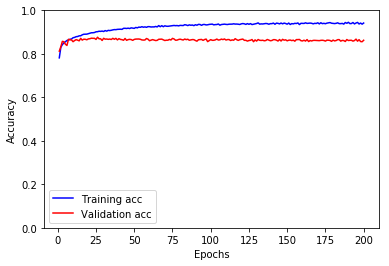


Neural Net: 128 units in each hidden layer;  8 hidden layers
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_43 (Flatten)         (None, 16)                0         
_________________________________________________________________
dense_298 (Dense)            (None, 128)               2176      
_________________________________________________________________
dense_299 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_300 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_301 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_302 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_303 (Den

Epoch 77/200
 - 8s - loss: 0.2124 - acc: 0.9266 - val_loss: 0.5423 - val_acc: 0.8758
Epoch 78/200
 - 8s - loss: 0.2200 - acc: 0.9255 - val_loss: 0.5136 - val_acc: 0.8790
Epoch 79/200
 - 8s - loss: 0.2033 - acc: 0.9294 - val_loss: 0.5387 - val_acc: 0.8741
Epoch 80/200
 - 8s - loss: 0.2178 - acc: 0.9270 - val_loss: 0.5370 - val_acc: 0.8723
Epoch 81/200
 - 8s - loss: 0.2087 - acc: 0.9281 - val_loss: 0.5428 - val_acc: 0.8731
Epoch 82/200
 - 8s - loss: 0.1976 - acc: 0.9307 - val_loss: 0.5800 - val_acc: 0.8724
Epoch 83/200
 - 8s - loss: 0.2066 - acc: 0.9285 - val_loss: 0.5464 - val_acc: 0.8727
Epoch 84/200
 - 8s - loss: 0.2275 - acc: 0.9240 - val_loss: 0.5669 - val_acc: 0.8608
Epoch 85/200
 - 8s - loss: 0.2032 - acc: 0.9295 - val_loss: 0.5428 - val_acc: 0.8726
Epoch 86/200
 - 8s - loss: 0.2061 - acc: 0.9290 - val_loss: 0.5589 - val_acc: 0.8699
Epoch 87/200
 - 8s - loss: 0.2059 - acc: 0.9290 - val_loss: 0.5723 - val_acc: 0.8738
Epoch 88/200
 - 8s - loss: 0.1954 - acc: 0.9317 - val_loss: 0.562

Epoch 173/200
 - 7s - loss: 0.2000 - acc: 0.9374 - val_loss: 0.7266 - val_acc: 0.8667
Epoch 174/200
 - 7s - loss: 0.1500 - acc: 0.9503 - val_loss: 0.7951 - val_acc: 0.8664
Epoch 175/200
 - 7s - loss: 0.1673 - acc: 0.9485 - val_loss: 0.7152 - val_acc: 0.8620
Epoch 176/200
 - 7s - loss: 0.1630 - acc: 0.9469 - val_loss: 0.7333 - val_acc: 0.8661
Epoch 177/200
 - 7s - loss: 0.1540 - acc: 0.9497 - val_loss: 0.8038 - val_acc: 0.8675
Epoch 178/200
 - 7s - loss: 0.1467 - acc: 0.9515 - val_loss: 0.7885 - val_acc: 0.8622
Epoch 179/200
 - 7s - loss: 0.2015 - acc: 0.9400 - val_loss: 0.6915 - val_acc: 0.8613
Epoch 180/200
 - 7s - loss: 0.1523 - acc: 0.9514 - val_loss: 0.7587 - val_acc: 0.8608
Epoch 181/200
 - 7s - loss: 0.1696 - acc: 0.9451 - val_loss: 0.6827 - val_acc: 0.8655
Epoch 182/200
 - 7s - loss: 0.1436 - acc: 0.9524 - val_loss: 0.7383 - val_acc: 0.8631
Epoch 183/200
 - 7s - loss: 0.1472 - acc: 0.9512 - val_loss: 0.7466 - val_acc: 0.8669
Epoch 184/200
 - 7s - loss: 0.1546 - acc: 0.9496 - val

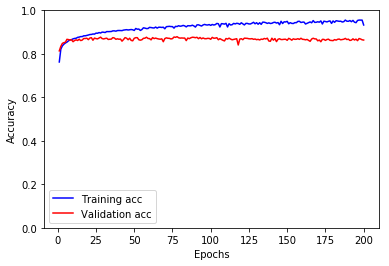


Neural Net: 128 units in each hidden layer;  16 hidden layers
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_44 (Flatten)         (None, 16)                0         
_________________________________________________________________
dense_307 (Dense)            (None, 128)               2176      
_________________________________________________________________
dense_308 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_309 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_310 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_311 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_312 (De

Epoch 64/200
 - 11s - loss: 0.3558 - acc: 0.8847 - val_loss: 0.4168 - val_acc: 0.8712
Epoch 65/200
 - 11s - loss: 0.3529 - acc: 0.8900 - val_loss: 0.4495 - val_acc: 0.8657
Epoch 66/200
 - 11s - loss: 0.3499 - acc: 0.8910 - val_loss: 0.4545 - val_acc: 0.8731
Epoch 67/200
 - 11s - loss: 0.3572 - acc: 0.8864 - val_loss: 0.4195 - val_acc: 0.8691
Epoch 68/200
 - 11s - loss: 0.3265 - acc: 0.8948 - val_loss: 0.4438 - val_acc: 0.8632
Epoch 69/200
 - 11s - loss: 0.3368 - acc: 0.8930 - val_loss: 0.4634 - val_acc: 0.8728
Epoch 70/200
 - 11s - loss: 0.3246 - acc: 0.8953 - val_loss: 0.4441 - val_acc: 0.8724
Epoch 71/200
 - 11s - loss: 0.3199 - acc: 0.8978 - val_loss: 0.4276 - val_acc: 0.8714
Epoch 72/200
 - 11s - loss: 0.3316 - acc: 0.8914 - val_loss: 0.4449 - val_acc: 0.8685
Epoch 73/200
 - 11s - loss: 0.3142 - acc: 0.8967 - val_loss: 0.4160 - val_acc: 0.8760
Epoch 74/200
 - 11s - loss: 0.3050 - acc: 0.9005 - val_loss: 0.4425 - val_acc: 0.8769
Epoch 75/200
 - 11s - loss: 0.3114 - acc: 0.8995 - val

Epoch 159/200
 - 11s - loss: 0.3133 - acc: 0.9064 - val_loss: 0.5003 - val_acc: 0.8703
Epoch 160/200
 - 11s - loss: 0.2292 - acc: 0.9258 - val_loss: 0.5263 - val_acc: 0.8763
Epoch 161/200
 - 11s - loss: 0.2424 - acc: 0.9276 - val_loss: 0.5931 - val_acc: 0.8688
Epoch 162/200
 - 11s - loss: 0.2543 - acc: 0.9242 - val_loss: 0.5327 - val_acc: 0.8673
Epoch 163/200
 - 11s - loss: 0.3892 - acc: 0.9156 - val_loss: 0.5643 - val_acc: 0.8650
Epoch 164/200
 - 11s - loss: 0.2718 - acc: 0.9226 - val_loss: 0.6539 - val_acc: 0.8594
Epoch 165/200
 - 11s - loss: 0.3419 - acc: 0.9227 - val_loss: 0.5653 - val_acc: 0.8714
Epoch 166/200
 - 11s - loss: 0.2435 - acc: 0.9306 - val_loss: 0.5686 - val_acc: 0.8682
Epoch 167/200
 - 11s - loss: 0.2438 - acc: 0.9295 - val_loss: 0.6095 - val_acc: 0.8681
Epoch 168/200
 - 11s - loss: 0.2676 - acc: 0.9274 - val_loss: 0.7373 - val_acc: 0.8578
Epoch 169/200
 - 11s - loss: 0.2909 - acc: 0.9267 - val_loss: 0.6140 - val_acc: 0.8703
Epoch 170/200
 - 11s - loss: 0.3050 - acc: 

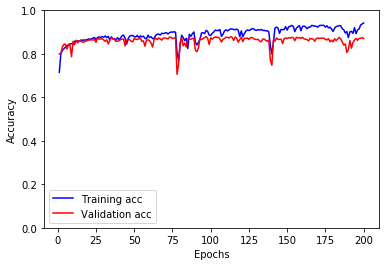

Done
Total experiment time:  11.774857072763973 hours


In [13]:
start_total = timeit.time.time()  #record the starting time
for w in width_list:
    for d in depth_list:
        print("\nNeural Net:", w, "units in each hidden layer; ", d, "hidden layers", )
        model = NN_model(w, d)
        model.summary()
        model.compile(optimizer= tf.keras.optimizers.Adam(), 
                      loss='sparse_categorical_crossentropy', 
                      metrics=['accuracy'])
        
        start = timeit.time.time() #record training start time for individual model
        history = model.fit(input, train_labels, epochs=200, verbose=2, validation_split=0.2)
        stop = timeit.time.time()  #record training end time for individual model
        runtime = stop - start     #training time for each model
        print('The training time is:', runtime)
        
        plot_accuracy(history)
        
        #save history, trainning time and model to lists
        history_list.append(history)
        time_list.append(runtime)
        model_list.append(model)
        
        #save trained model to harddrive
        filename = "model"+str(w)+"*"+str(d)
        tf.keras.models.save_model(model=model,filepath = "/Users/wenqin/Documents/CS545/CS545project/"+filename,
                                   overwrite=True,
                                   include_optimizer=True)
print("Done")

stop_total = timeit.time.time()   #record the stop time

total_experiment_time = ((stop_total-start_total)/60)/60  #total run time (in hours) to training all 45 DNN models

print("Total experiment time: ", total_experiment_time, "hours")

In [24]:
import json

#save history list and time list in one txt file onto harddrive
with open('history_list_MNIST_1*1to128*16.txt', 'w') as file:
    for history in history_list:
        file.write(json.dumps(history.history))
    for time in time_list:
        file.write(json.dumps(time))
file.close()
print('done')

done


In [13]:
from IPython.display import clear_output
with open('history_list_MNIST_11to12816.txt') as file:
    data=file.read()
data = data.split('}')
history_list = []
for line in data:
    l = line.split(']')
    dictThing = {}
    for thing in l:
        start = thing.find('"')
        end = thing.find('"', start+1)
        valsStart = thing.find('[')
        if valsStart >= 0:
            dictThing[thing[start+1:end]] = [float(x) for x in thing[valsStart+1:].split(',')]
    if dictThing:
        history_list.append(dictThing)

In [14]:
print(len(history_list))

45


In [98]:
#plot all 45 accuracy plots in one plot
fig = plt.figure(figsize=(10,18))
fig.subplots_adjust(hspace=0.0, wspace=0.0)
ax2 = fig.add_subplot(111)

ax2.set_xlabel('Depth\nEpochs from 0 to 200')
ax2.set_ylabel('Width\nAccuracy from 0.0 to 1.0')
ax2.set_title('Accuracy for each combination\nBlue - training\nRed - validation')
ax2.spines['top'].set_color('none')
ax2.spines['bottom'].set_color('none')
ax2.spines['left'].set_color('none')
ax2.spines['right'].set_color('none')
ax2.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

for i in range(45):
    width_index = int(i/5)   #number of untis in each layer of DNN
    depth_index = i%5        #number of layers of DNN

    history = history_list[i]
    acc = history['acc']
    val_acc = history['val_acc']
    #loss = history.history['loss']
    #val_loss = history.history['val_loss']
    #epochs = range(1, len(acc) + 1)
    epochs = range(1, 201)  #run 200 epochs

    #plt.subplot(9,5,i+1)
    ax = fig.add_subplot(9, 5, i+1)
    ax.plot(epochs, acc, 'b-', label='Training acc')
    ax.plot(epochs, val_acc, 'r-', label='Validation acc')
    
    if width_index == 8:
        ax.set_xlabel(depth_list[depth_index])
    if depth_index == 0:
        ax.set_ylabel(width_list[width_index])
    
    ax.set_xticks([])
    #ax.set_yticks([], minor=False)
    #ax.set_yticks([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], minor=True)
    #ax.yaxis.grid(True, which='minor')
    ax.set_yticks([])
    ax.set_ylim([0, 1])
    #plt.title('width:'+str(width_list[width_index])+"    "+"depth:"+str(depth_list[depth_index]), fontsize=10)
    #plt.xlabel('Epochs')
    #plt.ylabel('Accuracy')

<IPython.core.display.Javascript object>

In [15]:
datTrain = np.zeros((9, 5))
datTest = np.zeros((9, 5))
for width in range(0, 9):
    for depth in range(0, 5):
        datTrain[width, depth] = history_list[width*5 + depth]['acc'][-1]
        datTest[width, depth] = history_list[width*5 + depth]['val_acc'][-1]

In [16]:
import seaborn as sns
fig, ax = plt.subplots()
fig.show()
sns.heatmap(datTest, ax=ax, cmap='coolwarm', vmin=0, vmax=1)
ax.set_xlabel('Depth', fontsize=25);
ax.set_ylabel('Width', fontsize=25);
ax.set_title('Validation Accuracy', fontsize=30);
ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_yticklabels([1, 2, 4, 8, 16, 26, 32, 64, 128][::-1], rotation=0);
ax.set_xticklabels([1, 2, 4, 8, 16], rotation=0);

<IPython.core.display.Javascript object>

In [17]:
import seaborn as sns
fig, ax = plt.subplots()
fig.show()
sns.heatmap(datTrain, ax=ax, cmap='coolwarm', vmin=0, vmax=1)
ax.set_xlabel('Depth', fontsize=25);
ax.set_ylabel('Width', fontsize=25);
ax.set_title('Training Accuracy', fontsize=30);
ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_yticklabels([1, 2, 4, 8, 16, 26, 32, 64, 128][::-1], rotation=0);
ax.set_xticklabels([1, 2, 4, 8, 16], rotation=0);

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


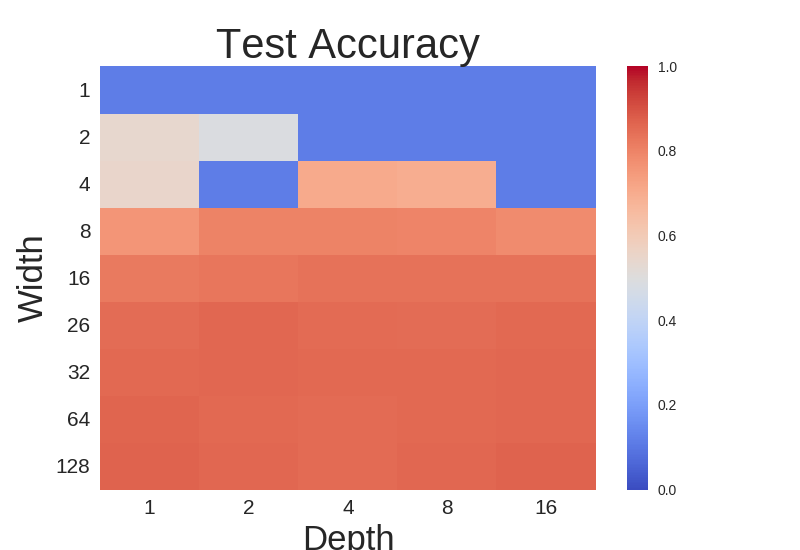

In [19]:
datTest = np.array([0.1135, 0.1135, 0.1135, 0.1135, 0.1135, 0.5395, 0.4921, 0.1135, 0.1135, 0.1135, 0.5499, 0.1135, 0.707, 0.6985, 0.1135, 0.7584, 0.8039, 0.802, 0.799, 0.7823, 0.8225, 0.8283, 0.8372, 0.8365, 0.8395, 0.8486, 0.8626, 0.8546, 0.8477, 0.8577, 0.8566, 0.8625, 0.8584, 0.8569, 0.8622, 0.8654, 0.856, 0.8545, 0.8557, 0.8603, 0.8697, 0.8621, 0.855, 0.8616, 0.8674])
datTest = datTest.reshape((9, 5))
fig, ax = plt.subplots()
fig.show()
sns.heatmap(datTest, ax=ax, cmap='coolwarm', vmin=0, vmax=1)
ax.set_xlabel('Depth', fontsize=25);
ax.set_ylabel('Width', fontsize=25);
ax.set_title('Test Accuracy', fontsize=30);
ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_yticklabels([1, 2, 4, 8, 16, 26, 32, 64, 128][::-1], rotation=0);
ax.set_xticklabels([1, 2, 4, 8, 16], rotation=0);

In [105]:
print(datTrain)

[[ 0.11395833  0.11395833  0.11395833  0.11395833  0.11395833]
 [ 0.5395625   0.48345833  0.11395833  0.11395833  0.11395833]
 [ 0.54016667  0.11395833  0.695       0.68789583  0.11395833]
 [ 0.75077083  0.80114583  0.8001875   0.79835417  0.775875  ]
 [ 0.82677083  0.83785417  0.84620833  0.85454167  0.848     ]
 [ 0.84908333  0.86454167  0.87370833  0.87410417  0.87108333]
 [ 0.85714583  0.8738125   0.88560417  0.8851875   0.883125  ]
 [ 0.87495833  0.89995833  0.91875     0.92397917  0.8911875 ]
 [ 0.88585417  0.93452083  0.94177083  0.93272917  0.94185417]]


In [54]:
#compute test accuracy and loss for all 45 DNN models
test_acc_list = []
test_lost_list = []
for i in range(45):
    model = model_list[i]
    loss, acc = model.evaluate(test_input, test_labels)
    print("loss:", loss, "accuracy:", acc)
    test_acc_list.append(acc)
    test_lost_list.append(loss)
print(test_acc_list)

10000/10000 [==============================] - 1s 81us/step
loss: 2.3010972454071044 accuracy: 0.1135
10000/10000 [==============================] - 1s 74us/step
loss: 2.301065026473999 accuracy: 0.1135
10000/10000 [==============================] - 1s 76us/step
loss: 2.300974024963379 accuracy: 0.1135
10000/10000 [==============================] - 1s 76us/step
loss: 2.301142658996582 accuracy: 0.1135
10000/10000 [==============================] - 1s 81us/step
loss: 2.3010246448516845 accuracy: 0.1135
10000/10000 [==============================] - 1s 73us/step
loss: 1.346806038093567 accuracy: 0.5395
10000/10000 [==============================] - 1s 75us/step
loss: 1.3719178243637085 accuracy: 0.4921
10000/10000 [==============================] - 1s 76us/step
loss: 2.3009931873321534 accuracy: 0.1135
10000/10000 [==============================] - 1s 76us/step
loss: 2.3011246505737306 accuracy: 0.1135
10000/10000 [==============================] - 1s 80us/step
loss: 2.30107993850708 acc

In [47]:
#change test accuracy(acc_out) into numpy 2D array
acc_out = np.array(test_acc_list)
acc_out = acc_out.reshape(9, 5)
print(acc_out.shape, acc_out)

(9, 5) [[0.1135 0.1135 0.1135 0.1135 0.1135]
 [0.5395 0.4921 0.1135 0.1135 0.1135]
 [0.5499 0.1135 0.707  0.6985 0.1135]
 [0.7584 0.8039 0.802  0.799  0.7823]
 [0.8225 0.8283 0.8372 0.8365 0.8395]
 [0.8486 0.8626 0.8546 0.8477 0.8577]
 [0.8566 0.8625 0.8584 0.8569 0.8622]
 [0.8654 0.856  0.8545 0.8557 0.8603]
 [0.8697 0.8621 0.855  0.8616 0.8674]]


In [57]:
print(test_lost_list)

[2.3010972454071044, 2.301065026473999, 2.300974024963379, 2.301142658996582, 2.3010246448516845, 1.346806038093567, 1.3719178243637085, 2.3009931873321534, 2.3011246505737306, 2.30107993850708, 1.348526584815979, 2.301024019622803, 0.8554312957763672, 0.9157995012283325, 2.3010817539215087, 0.7349854100227355, 0.6125858126163483, 0.6071546649217605, 0.6044510660409927, 0.6711318153858185, 0.5351964368939399, 0.5127278052568436, 0.480399223613739, 0.4900416162371635, 0.5052633495569229, 0.46409589785337446, 0.4167995330512524, 0.45265907595157623, 0.49078420342803003, 0.45705055891275403, 0.4404306208431721, 0.4166521169900894, 0.4629299598455429, 0.47275966737270353, 0.4693503595590591, 0.40698636376857755, 0.5379427902877331, 0.6559991902470589, 0.6005591967403888, 0.5002641915500164, 0.4439753661036491, 0.7511433425545693, 0.8790358473822475, 0.7112214120328426, 0.6086535123080015]


In [86]:
#change test loss(loss_out) into numpy 2D array
loss_out = np.array(test_lost_list)
loss_out = loss_out.reshape(9, 5)
print(loss_out.shape, loss_out)

(9, 5) [[2.30109725 2.30106503 2.30097402 2.30114266 2.30102464]
 [1.34680604 1.37191782 2.30099319 2.30112465 2.30107994]
 [1.34852658 2.30102402 0.8554313  0.9157995  2.30108175]
 [0.73498541 0.61258581 0.60715466 0.60445107 0.67113182]
 [0.53519644 0.51272781 0.48039922 0.49004162 0.50526335]
 [0.4640959  0.41679953 0.45265908 0.4907842  0.45705056]
 [0.44043062 0.41665212 0.46292996 0.47275967 0.46935036]
 [0.40698636 0.53794279 0.65599919 0.6005592  0.50026419]
 [0.44397537 0.75114334 0.87903585 0.71122141 0.60865351]]


In [61]:
#funtion plot heat map
def plot_heat_map(arr, measure):
    fig, ax = plt.subplots()
    im = ax.imshow(arr)

    
    ax.set_xticks(np.arange(len(depth_list)))
    ax.set_yticks(np.arange(len(width_list)))
    #label stick with the respective list entries(depth_list, width_list)
    ax.set_xticklabels(depth_list)
    ax.set_yticklabels(width_list)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=0, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    # for i in range(len(width_list)):
    #     for j in range(len(depth_list)):
    #         text = ax.text(j, i, acc_out[i, j],
    #                        ha="center", va="center", color="w")

    ax.set_title(measure +" of DNN with various dimensions")
    fig.tight_layout()
    plt.show()


In [62]:
plot_heat_map(acc_out, "Testing accuracy")

In [87]:
plot_heat_map(loss_out, "Testing error")

In [68]:
#compute training accuracy and loss
train_acc_list = []
train_loss_list = []
for i in range(45):
    model = model_list[i]
    loss, acc = model.evaluate(input, train_labels)
    print("loss:", loss, "accuracy:", acc)
    train_acc_list.append(acc)
    train_loss_list.append(loss)
print(train_acc_list, train_loss_list)

60000/60000 [==============================] - 5s 75us/step
loss: 2.3012300543467203 accuracy: 0.11236666666666667
60000/60000 [==============================] - 4s 74us/step
loss: 2.3012238196055095 accuracy: 0.11236666666666667
60000/60000 [==============================] - 5s 75us/step
loss: 2.3013102710723876 accuracy: 0.11236666666666667
60000/60000 [==============================] - 5s 77us/step
loss: 2.301243605295817 accuracy: 0.11236666666666667
60000/60000 [==============================] - 5s 80us/step
loss: 2.3012066162109375 accuracy: 0.11236666666666667
60000/60000 [==============================] - 4s 74us/step
loss: 1.3385888584136962 accuracy: 0.5454666666666667
60000/60000 [==============================] - 4s 74us/step
loss: 1.3719932958920797 accuracy: 0.48741666666666666
60000/60000 [==============================] - 4s 75us/step
loss: 2.301206183497111 accuracy: 0.11236666666666667
60000/60000 [==============================] - 5s 77us/step
loss: 2.301191433207194

In [82]:
#change training accuracy(acc_in) and loss(loss_in) into numpy 2D array
acc_in =np.array(train_acc_list)
acc_in = acc_in.reshape(9,5)
loss_in = np.array(train_loss_list)
loss_in = loss_in.reshape(9, 5)

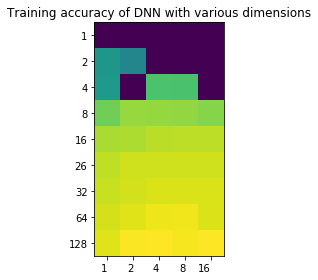

In [88]:
plot_heat_map(acc_in, "Training accuracy")

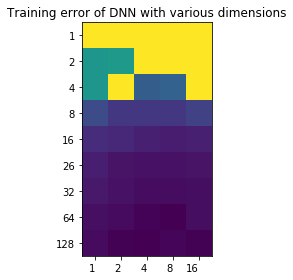

In [89]:
plot_heat_map(loss_in, "Training error")

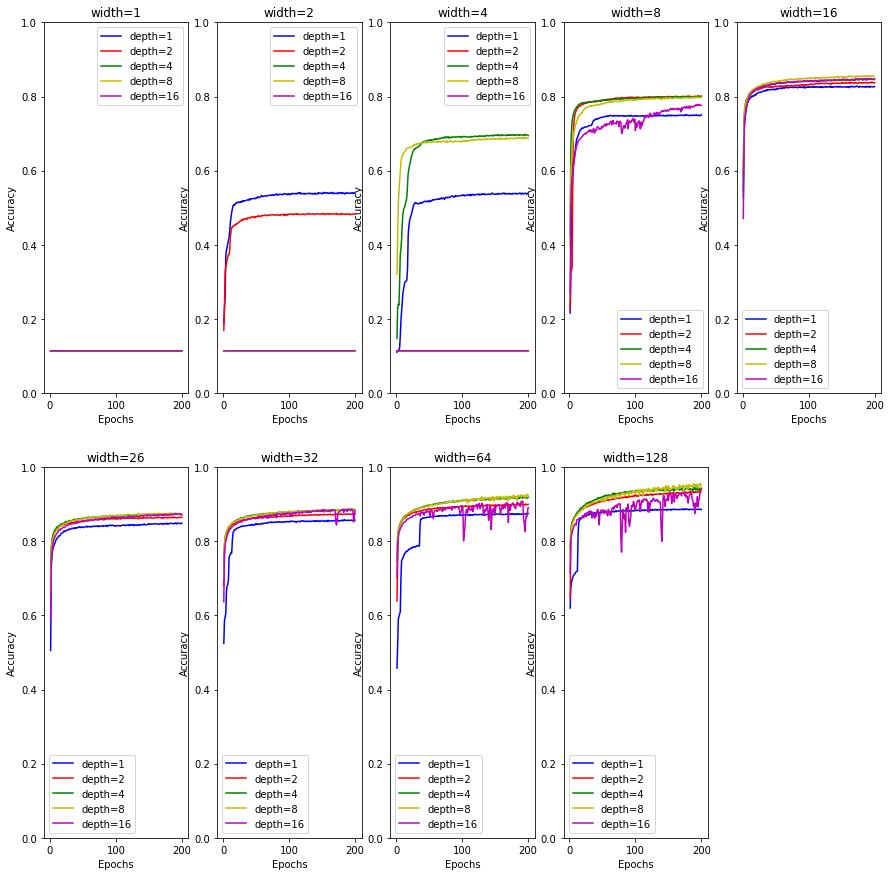

In [78]:
#plot training_accuracy against epoch of the same width but various depth in one subplot

colors = ['b','r','g','y','m','k']
epochs = range(1, 201)
plt.figure(figsize=(15,15))
for i in range(9):
    plt.subplot(2,5,i+1)
    plt.title("width="+str(width_list[i]))
    for j in range(5):
        history_index = i*5+j
        history = history_list[history_index]
        acc = history.history['acc']
        plt.plot(epochs, acc, colors[j]+'-', label= 'depth='+ str(depth_list[j]))
        plt.ylim(0,1)
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()
    

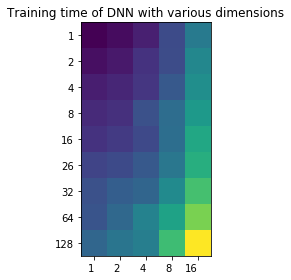

In [85]:
#plot training time for each DNN model
times = np.array(time_list)
times = times.reshape(9, 5)
plot_heat_map(times, "Training time")